<a href="https://colab.research.google.com/github/wilferalexander/Covid19/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**COVID-19 ANALISIS**

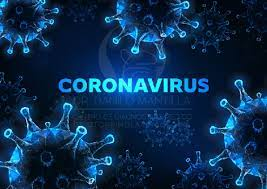


El COVID-19, también conocido como enfermedad por coronavirus 2019, es una enfermedad infecciosa causada por el virus SARS-CoV-2, un tipo de coronavirus que fue identificado por primera vez en diciembre de 2019 en la ciudad de Wuhan, en la provincia de Hubei, China. El término "COVID-19" se deriva de "COronaVIrus Disease 2019".

La enfermedad se propagó rápidamente a nivel mundial, llevando a la Organización Mundial de la Salud (OMS) a declararla como una pandemia el 11 de marzo de 2020. El COVID-19 se caracteriza por síntomas que pueden variar desde leves, como fiebre y tos, hasta síntomas más graves, como dificultades respiratorias, neumonía y, en casos extremos, puede llevar a la muerte.

El virus se propaga principalmente a través de las gotas respiratorias que se generan cuando una persona infectada tose, estornuda o habla. También puede transmitirse al tocar superficies contaminadas y luego tocarse la cara. La pandemia tuvo un impacto significativo en la salud pública, la economía global y la vida cotidiana de las personas en todo el mundo. Se implementaron medidas de distanciamiento social, cuarentenas y restricciones de viaje para frenar la propagación del virus.

La investigación científica y los esfuerzos globales llevaron al desarrollo y aprobación de vacunas contra el COVID-19 para prevenir la enfermedad y reducir su gravedad. La situación con respecto al COVID-19 sigue siendo dinámica, y las medidas para abordar la pandemia continúan evolucionando a medida que se obtiene más información y se implementan estrategias de salud pública.


#**PROBLEMA DE NEGOCIO**


---

Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Relación entre el aumento de los nuevos casos diarios y los nuevos decesos diarios para los países México-Perú-Colombia?

6. ¿Cuál ha sido la evolución de los nuevos decesos diarios reportados de Covid-19 en México-Perú-Colombia a lo largo del tiempo?

7. ¿Cómo evolucionan los casos acumulados en todos los países a nivel mundial - Gráfico Coroplético?

8. ¿Cómo ha evolucionado el número de muertes por COVID-19 a lo largo del tiempo?


para validar nuestros datos

https://data.who.int/dashboards/covid19/cases

https://population.un.org/wpp/Graphs/DemographicProfiles/Line/900

https://www.worldometers.info/coronavirus/worldwide-graphs/





#**1.  Configuración del ambiente**

In [ ]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


#**2. Obtención, Tratamiento y Análisis Exploratorio (EDA)**

En este paso vamos a realizar limpieza de datos, manejar valores faltantes, análisis exploratorio, etc.

In [ ]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
%matplotlib inline
from io import StringIO
import requests
import sklearn
import missingno as msno ## Importamos la Librería Missingno, para poder visualizar nuestros valores nulos presentes
import geopandas as gpd
#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

Cargando las bases de datos

In [ ]:
#Importamos los dataset
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]



1. **df_covid:** contiene información de la evolución de casos del covid19. Base de datos otorgada por W.H.O. (World Health Organization).
2. **df_population:** contiene información demográfica proporcionada por P.U.N. (Population United Nations)



##2.1. EDA Base Covid World Health Organization

In [ ]:
#Validamos con un sample el dataset de covid
df_covid.sample(8)

Date_reported Country_code     Country WHO_region  New_cases  \
24409    2020-07-26           KE       Kenya       AFRO     3893.0   
27342    2023-12-17           LU  Luxembourg       EURO      790.0   
7755     2022-05-15           CM    Cameroon       AFRO       23.0   
16884    2022-08-14           GA       Gabon       AFRO       43.0   
24363    2023-10-01           KZ  Kazakhstan       EURO        NaN   
12868    2022-11-06           DJ    Djibouti       EMRO        NaN   
31604    2020-04-26          NaN     Namibia       AFRO        NaN   
29671    2023-11-26           YT     Mayotte        NaN        NaN   

       Cumulative_cases  New_deaths  Cumulative_deaths  
24409             16643        53.0                278  
27342            389005         NaN               1000  
7755             119947         NaN               1930  
16884             48635         NaN                306  
24363           1502857         NaN              19072  
12868             15690         NaN                189  
31604                16         NaN                  0  
29671             42027         NaN                187

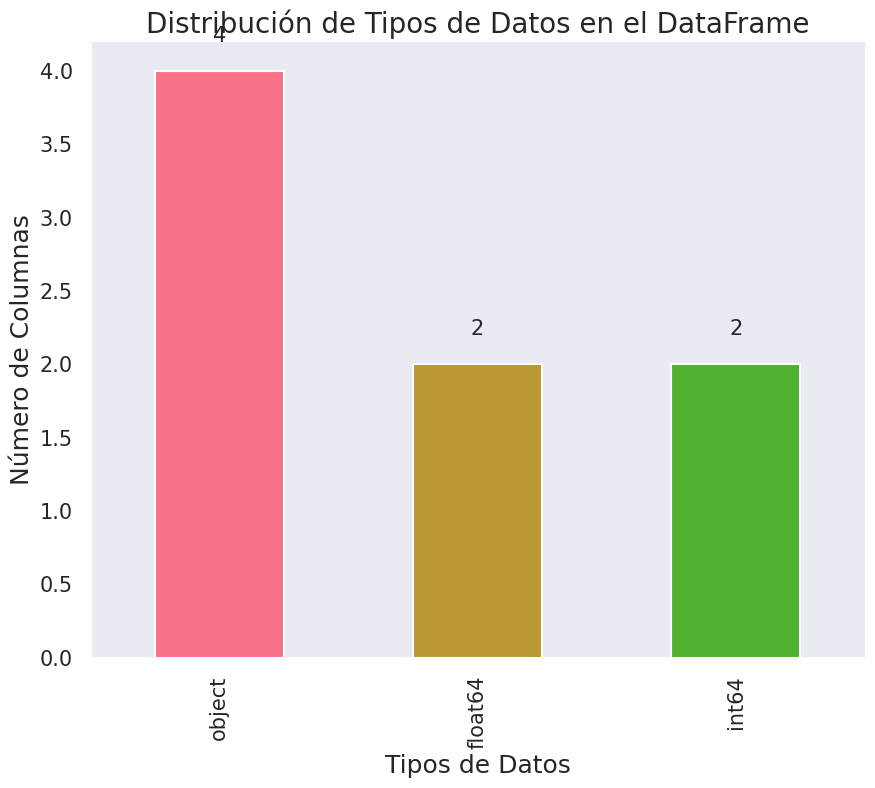

In [ ]:
# Establecemos el estilo de Seaborn
sns.set(style="dark", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_covid.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

graficamos los tipo de datos que tenemos en el dataset para visualizar de manera mas grafica
1. Categoricas tenemos 4
2. Float 2
3. enteras 2

In [ ]:
#Información de los datos
print("Número de filas: ",df_covid.shape[0])
print("Número de Columnas:",df_covid.shape[1])
print("Datos Duplicados",df_covid.duplicated().sum())
print("Variables Categóricas: ",df_covid.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_covid.select_dtypes(exclude='object').shape[1])

Número de filas:  50880
Número de Columnas: 8
Datos Duplicados 211
Variables Categóricas:  4
Variables Numéricas:  4


In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB



el set de datos contienen la siguiente información

1. Número de filas:  50880
2. Número de Columnas: 8
3. Datos Duplicados 211
4. Variables Categóricas:  4
5. Variables Numéricas:  4

Podemos observa que tenemos valores nulos


###2.2 Tratamiento de Valores nulos

In [ ]:
#datos nulos por columna
df_covid.isnull().sum().sort_values(ascending=False)

New_deaths           26664
New_cases            14258
WHO_region            5088
Country_code          1484
Country               1272
Date_reported            0
Cumulative_cases         0
Cumulative_deaths        0
dtype: int64

* Observamos que existe presencia de datos nulos.
* Tenemos que validar la relación que existen entre datos nulos.
* La presencia de datos nulos en variables como 'country_code' y 'country', nos generan alerta, ya que de no tener datos para estas columnas, esto no generaría valor para el dataset.
* Se evaluará la posibilidad de eliminar ciertas filas que tengan presencia de valores nulos.

Text(0, 0.5, 'Filas')

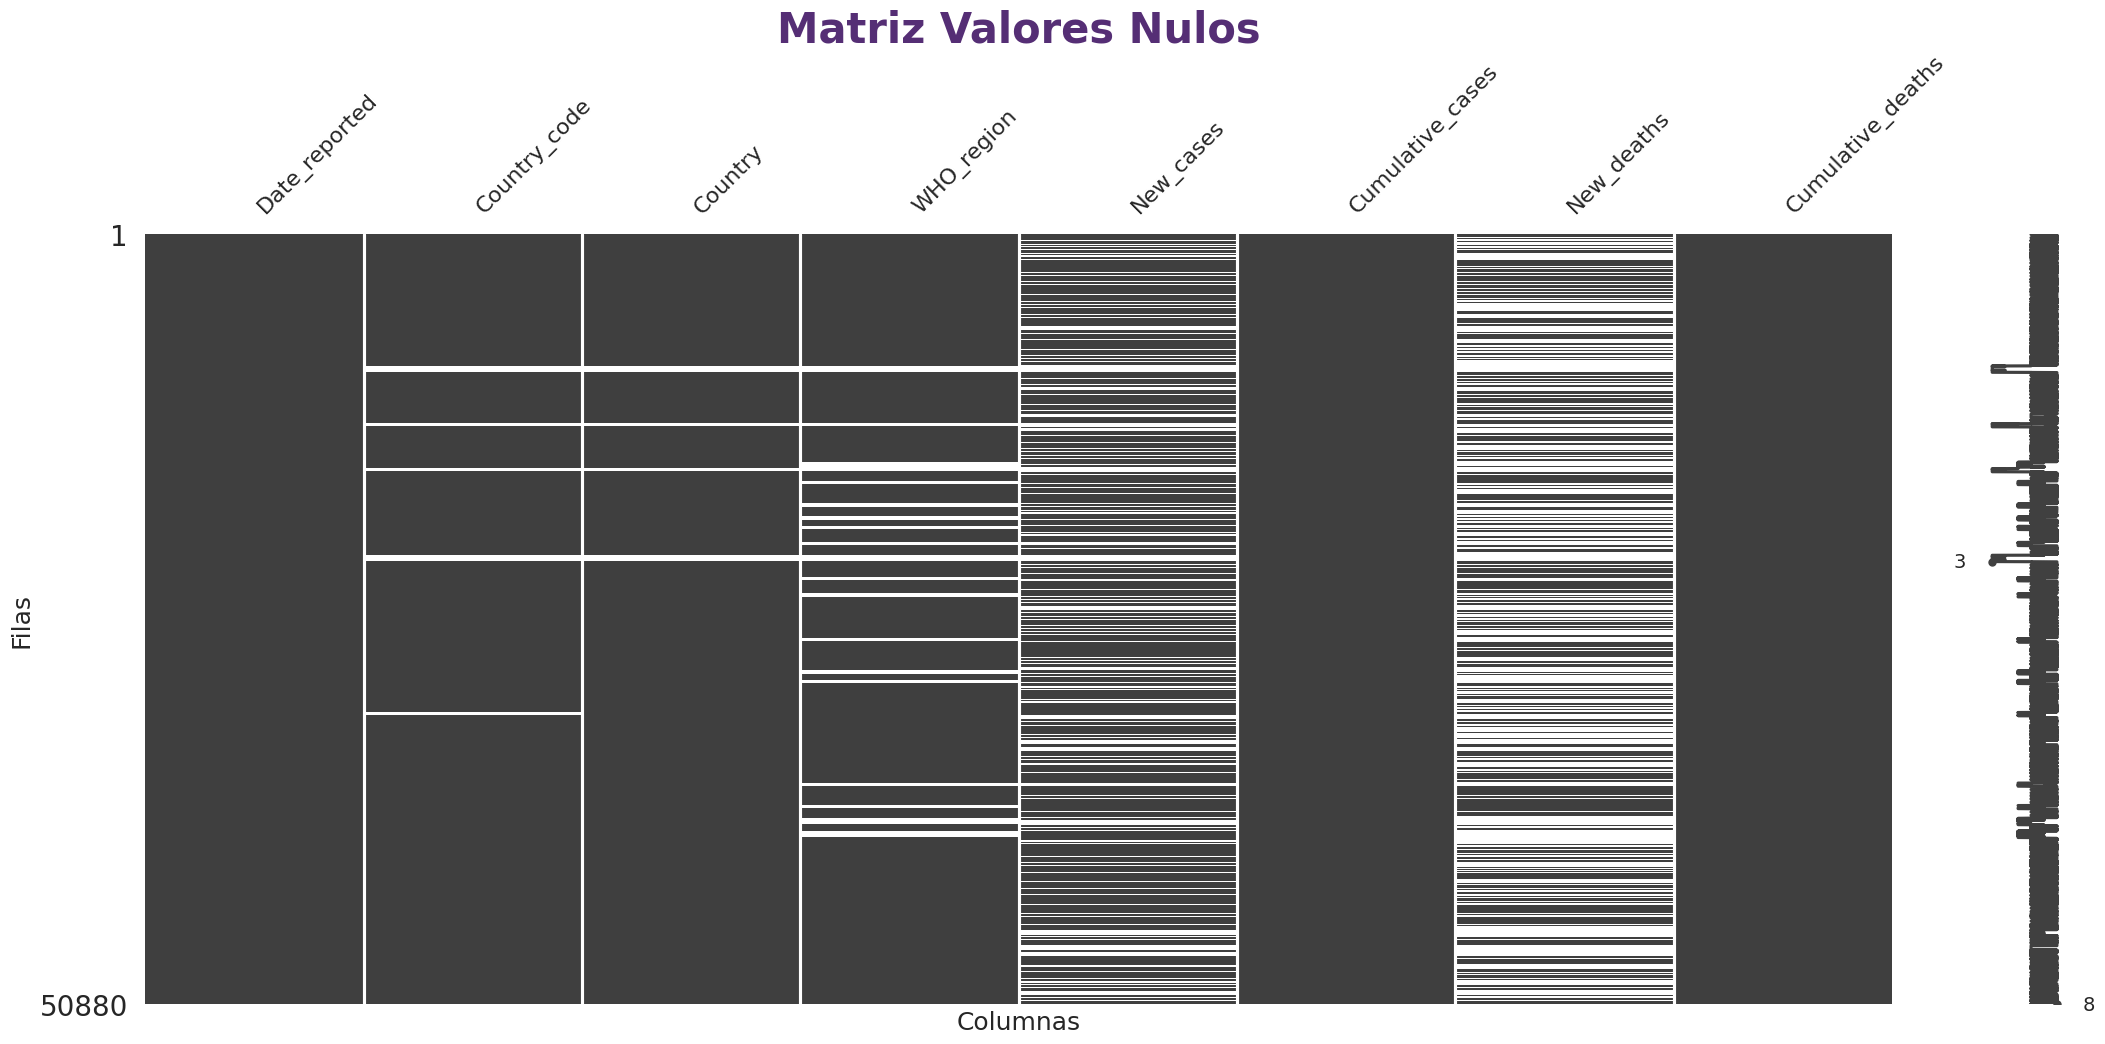

In [ ]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_covid)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

Logramos evidenciar que las siguientes variables como New_deaths,New_cases,WHO_region tienen varios valores nulos pero es logico poque son las muertes nuevas y casos nuevos y en que regio las cuales estan altamente correlacionadas

tambien podemos determinar que los nulos para country code y country es pequeña y no deberia afectar mucho nuestro analisis



<Figure size 1000x800 with 0 Axes>

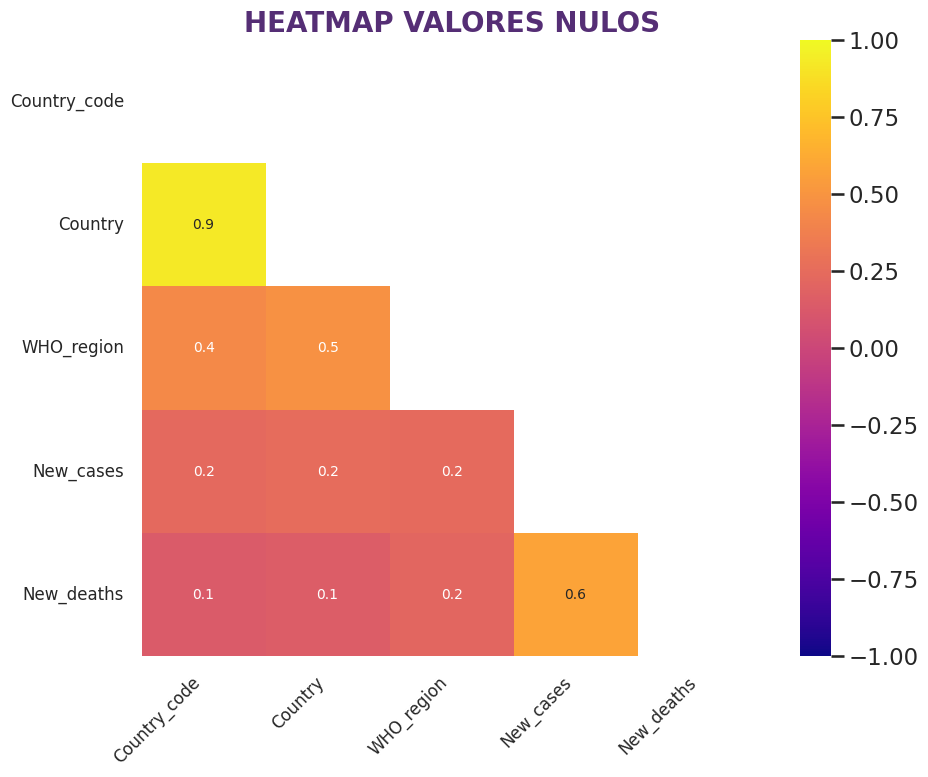

In [ ]:
# Establecemos el estilo de Seaborn con un fondo oscuro
sns.set(style="dark", context="talk", font_scale=1, palette="plasma")

# Creamos una figura de tamaño personalizado con fondo negro
plt.figure(figsize=(10, 8), facecolor='black')

# Utilizamos msno.heatmap para el mapa de calor
msno.heatmap(df_covid, cmap='plasma', vmin=-1, vmax=1, cbar=True, figsize=(10, 8), fontsize=12)

# Añadimos un título al gráfico
plt.title('HEATMAP VALORES NULOS', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#552E75'})

# Mostramos el gráfico
plt.show()


Este mapa de calor nos permite observar la relación clara entre country y country code

In [ ]:
#Identificar los valores unicos por columna
df_covid.nunique()

Date_reported          212
Country_code           233
Country                234
WHO_region               6
New_cases            11877
Cumulative_cases     31717
New_deaths            2126
Cumulative_deaths    13650
dtype: int64

In [ ]:
#filtramos la columna 'Country_code'
nombre_columna_deseada = 'Country_code'
# Filtrar solo la columna deseada
columna_filtrada = df_covid[nombre_columna_deseada]
# Mostrar los primeros 5 elementos aleatorios
columna_filtrada.sample(5)

14351     ER
47872     UG
17106     GM
23502     JM
8911     NaN
Name: Country_code, dtype: object

In [ ]:
#filtramos la columna 'Country_code'
nombre_columna_deseada = 'Country_code'
# Contar valores nulos en la columna deseada
cantidad_nulos = df_covid[nombre_columna_deseada].isnull().sum()
# Mostrar la cantidad de valores nulos
print(f"La columna '{nombre_columna_deseada}' tiene {cantidad_nulos} valores nulos.")

La columna 'Country_code' tiene 1484 valores nulos.


Mantener en el dataframe sólo las siguientes columnas:
1. 'Date_reported'
2. 'Country_code'
3. 'Country'
4. 'New_cases'
5. 'Cumulative_cases'
6. 'New_deaths'
7. 'Cumulative_deaths'

In [ ]:
# Listamos de columnas que deseas mantener
columnas_a_mantener = ['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
# Crear un nuevo DataFrame con solo las columnas deseadas
df_covid_limpio = df_covid[columnas_a_mantener]
# Mostramos las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

Date_reported Country_code                             Country  \
17384    2020-01-05           DE                             Germany   
29932    2020-10-11           FM    Micronesia (Federated States of)   
41147    2020-05-17           RS                              Serbia   
49779    2023-04-16           VE  Venezuela (Bolivarian Republic of)   
25467    2020-07-12           LA    Lao People's Democratic Republic   

       New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  
17384        1.0                 1         3.0                  3  
29932        NaN                 0         NaN                  0  
41147      464.0             10496        15.0                228  
49779       31.0            552429         2.0               5856  
25467        NaN                19         NaN                  0



1.   Eliminar todos los registros con nulos en la columna Country_code. y crearemos el dataset df_covid_limpio




In [ ]:
# Filtramos por Country_code
columna_a_filtrar = 'Country_code'
# Eliminamos registros con valores nulos en la columna 'Country_code' y creamos un dataset nuevo
df_covid_limpio = df_covid_limpio.dropna(subset=[columna_a_filtrar])
# mostraoms información del DataFrame resultante
print("Información de df_covid_limpio después de eliminar nulos en 'Country_code':")
print(df_covid_limpio.info())

Información de df_covid_limpio después de eliminar nulos en 'Country_code':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          36436 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         24088 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB
None


Text(0, 0.5, 'Filas')

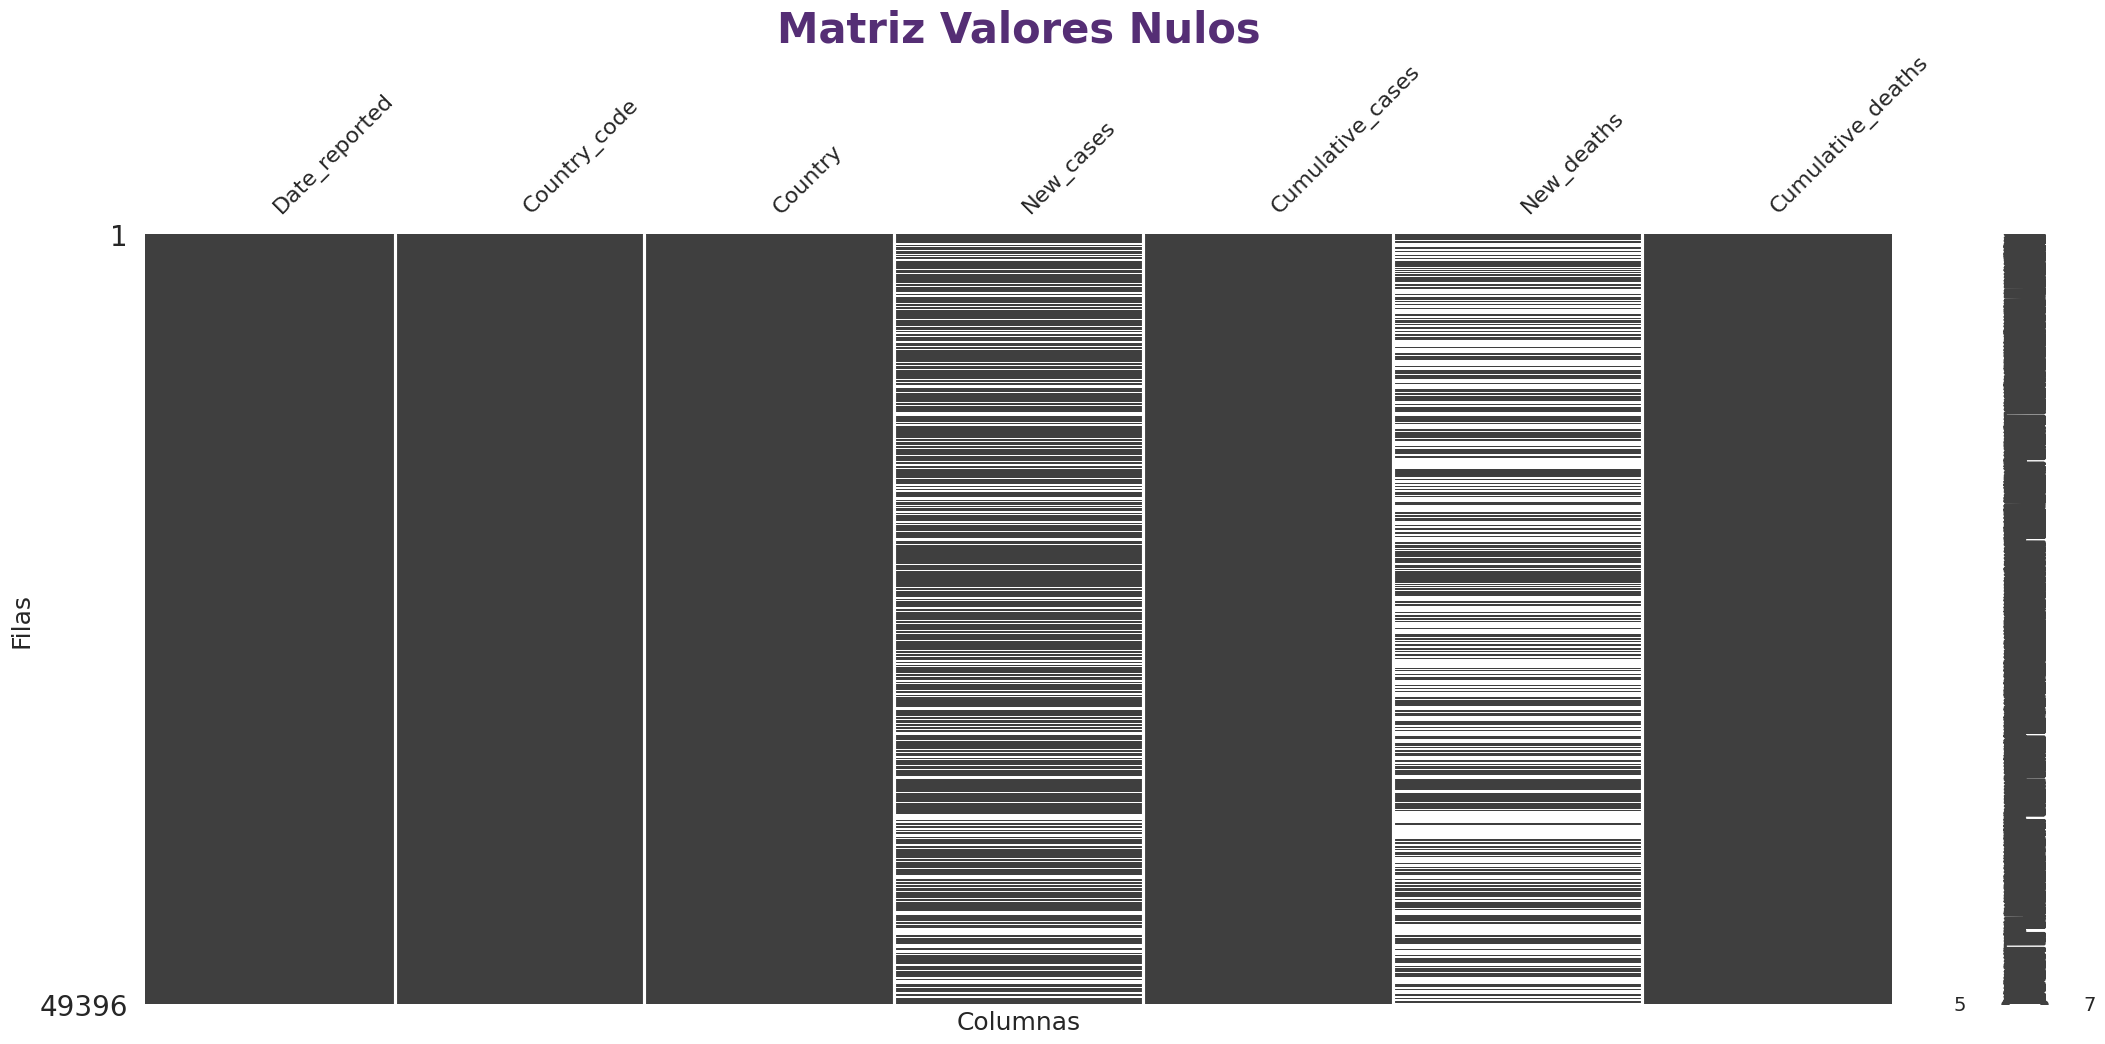

In [ ]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_covid_limpio)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

Substituir todos los valores nulos con cero.

In [ ]:
# Reemplazamos todos los valores nulos con cero en el DataFrame
df_covid_limpio = df_covid_limpio.fillna(0)
# Mostramos las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

Date_reported Country_code         Country  New_cases  Cumulative_cases  \
651      2020-04-19           AS  American Samoa        0.0                 0   
11154    2022-07-03           CU            Cuba      191.0           1106087   
971      2022-05-15           AD         Andorra      439.0             42156   
1777     2021-07-25           AR       Argentina    88348.0           4929412   
5039     2023-02-19           BT          Bhutan        4.0             62615   

       New_deaths  Cumulative_deaths  
651           0.0                  0  
11154         0.0               8529  
971           0.0                153  
1777       1367.0             110905  
5039          0.0                 21

In [ ]:
# Imprimir las diferencias
df_covid_limpio.shape, df_covid.shape

((49396, 7), (50880, 8))

Cambiar el formato actual de la columna Date_reported para un formato de tipo datetime64[ns]

In [ ]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          49396 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         49396 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [ ]:
# Verificamos el tipo de dato actual de la columna Date_reported
print("Tipo de dato actual de Date_reported:", df_covid_limpio['Date_reported'].dtype)
# Convertir la columna Date_reported a datetime64
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'], format='%Y-%m-%d')
# Verificamos el tipo de dato después de la conversión
print("Tipo de dato después de la conversión:", df_covid_limpio['Date_reported'].dtype)
df_covid_limpio.sample(5)

Tipo de dato actual de Date_reported: object
Tipo de dato después de la conversión: datetime64[ns]


Date_reported Country_code   Country  New_cases  Cumulative_cases  \
42421    2020-05-31           SI  Slovenia        4.0              1473   
37883    2022-10-30           RE   Réunion      356.0            477959   
15770    2021-08-01           FJ      Fiji     7274.0             30413   
12870    2022-11-20           DJ  Djibouti        0.0             15690   
19350    2021-02-14           GG  Guernsey       78.0               789   

       New_deaths  Cumulative_deaths  
42421         0.0                113  
37883         1.0                899  
15770        55.0                241  
12870         0.0                189  
19350         1.0                 17

Substituir el formato actual de las columnas **['New_cases', 'New_deaths']**para un formato de tipo int64.

In [ ]:
# convertimos las columnas 'New_cases' y 'New_deaths' a tipo int64
df_covid_limpio['New_cases'] = pd.to_numeric(df_covid_limpio['New_cases'], errors='coerce', downcast='integer')
df_covid_limpio['New_deaths'] = pd.to_numeric(df_covid_limpio['New_deaths'], errors='coerce', downcast='integer')
# Convertir explícitamente a int64
df_covid_limpio['New_cases']= df_covid_limpio['New_cases'].astype('Int64')
df_covid_limpio['New_deaths']= df_covid_limpio['New_deaths'].astype('Int64')
# Verificar el tipo de dato después de la conversión
print("Tipo de dato después de la conversión de New_cases:", df_covid_limpio['New_cases'].dtype)
print("Tipo de dato después de la conversión de New_deaths:", df_covid_limpio['New_deaths'].dtype)

Tipo de dato después de la conversión de New_cases: Int64
Tipo de dato después de la conversión de New_deaths: Int64


Crear una nueva columna **'lethality_rate'** con la siguiente fórmula: 'Cumulative_deaths'/'Cumulative_cases'*100

In [ ]:
# Asegúramos de que las columnas 'Cumulative_deaths' y 'Cumulative_cases' sean de tipo numérico
df_covid_limpio['Cumulative_deaths'] = pd.to_numeric(df_covid_limpio['Cumulative_deaths'], errors='coerce')
df_covid_limpio['Cumulative_cases'] = pd.to_numeric(df_covid_limpio['Cumulative_cases'], errors='coerce')
# Crear la nueva columna 'lethality_rate'
df_covid_limpio['lethality_rate'] =(df_covid_limpio['Cumulative_deaths']/df_covid_limpio['Cumulative_cases'])*100
df_covid_limpio.sample(5)

Date_reported Country_code         Country  New_cases  Cumulative_cases  \
662      2020-07-05           AS  American Samoa          0                 0   
7822     2023-08-27           CM        Cameroon          0            125090   
17688    2021-10-10           GH           Ghana        933            129092   
33079    2020-02-23           NE           Niger          0                 0   
44563    2020-11-01           CH     Switzerland      55405            176253   

       New_deaths  Cumulative_deaths  lethality_rate  
662             0                  0             NaN  
7822            0               1974        1.578064  
17688           7               1164        0.901683  
33079           0                  0             NaN  
44563         288               2319        1.315722

Vamos a convertir en 0 los valores nulos en la columna **lethality_rate**

In [ ]:
df_covid_limpio = df_covid_limpio.fillna(0)
df_covid_limpio.sample(5)

Date_reported Country_code               Country  New_cases  \
48242    2022-04-10           AE  United Arab Emirates       1666   
3029     2021-03-07           BS               Bahamas         74   
13767    2023-10-29           EG                 Egypt          0   
35213    2020-05-31           PA                Panama       2264   
10510    2022-05-08           CR            Costa Rica       5216   

       Cumulative_cases  New_deaths  Cumulative_deaths  lethality_rate  
48242            893538           0               2302        0.257628  
3029               8616           2                182        2.112349  
13767            516023           0              24830        4.811801  
35213             12531          31                326        2.601548  
10510            857290          16               8421        0.982281

Con el fin de eliminar outliers, nos quedaremos con los registros cuyo valor en la columna lethality_rate se encuentre entre los cuantiles 0 a 0.99

In [ ]:
# Calcular los cuantiles
quantile_0 = df_covid_limpio['lethality_rate'].quantile(0)
quantile_99 = df_covid_limpio['lethality_rate'].quantile(0.99)

In [ ]:
# Filtramos el DataFrame para incluir solo los registros dentro del rango de cuantiles
df_covid_limpio = df_covid_limpio[(df_covid_limpio['lethality_rate'] >= quantile_0) & (df_covid_limpio['lethality_rate'] <= quantile_99)]

# Mostrar las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

Date_reported Country_code         Country  New_cases  Cumulative_cases  \
5027     2022-11-27           BT          Bhutan         15             62503   
737      2021-12-12           AS  American Samoa          1                11   
32521    2021-08-22           NC   New Caledonia          1               135   
23429    2022-02-06           JM         Jamaica       2139            125781   
28968    2022-08-14           MQ      Martinique        987            213889   

       New_deaths  Cumulative_deaths  lethality_rate  
5027            0                 21        0.033598  
737             0                  0        0.000000  
32521           0                  0        0.000000  
23429          52               2691        2.139433  
28968           4               1009        0.471740

In [ ]:
# Reiniciar el índice del DataFrame
df_covid_limpio = df_covid_limpio.reset_index(drop=True)
# Mostramos 5 filas del DataFrame resultante
df_covid_limpio.sample(5)

Date_reported Country_code     Country  New_cases  Cumulative_cases  \
35588    2023-11-26           QA       Qatar          0            514524   
36365    2022-07-17           RO     Romania      34582           2961769   
36678    2020-05-31           RW      Rwanda         34               359   
24487    2020-09-27           LB     Lebanon       6931             35228   
38663    2021-11-21           SM  San Marino        142              5834   

       New_deaths  Cumulative_deaths  lethality_rate  
35588           0                690        0.134105  
36365          57              65812        2.222050  
36678           1                  1        0.278552  
24487          54                340        0.965141  
38663           1                 93        1.594104

#### 2.3 EDA VARIABLES NUMÉRICAS

In [ ]:
def estadisticos_cont(num):
  #calcular describe
  estadisticos = num.describe().T
  #Añadimos la mediana
  estadisticos['median']= num.median()
  #recordamos para la mediana este al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
  #devolvemos
  return(estadisticos)

In [ ]:
estadisticos_cont(df_covid_limpio.select_dtypes('number'))

count            mean        median             std  \
New_cases          48902.0    15789.610302    103.000000   242037.803742   
Cumulative_cases   48902.0  1659526.873707  43793.000000  7309165.651071   
New_deaths         48902.0      138.018609      0.000000      867.312807   
Cumulative_deaths  48902.0      19387.2969    471.000000    79473.229915   
lethality_rate     48902.0        1.452976      1.029184        1.625929   

                       min       25%       50%       75%          max  
New_cases         -65079.0       0.0     103.0   2005.75   40475477.0  
Cumulative_cases       0.0    3904.0   43793.0  507011.5  103436829.0  
New_deaths         -3432.0       0.0       0.0      20.0      47687.0  
Cumulative_deaths      0.0      29.0     471.0   6637.75    1165780.0  
lethality_rate         0.0  0.326607  1.029184  2.004507    12.260536

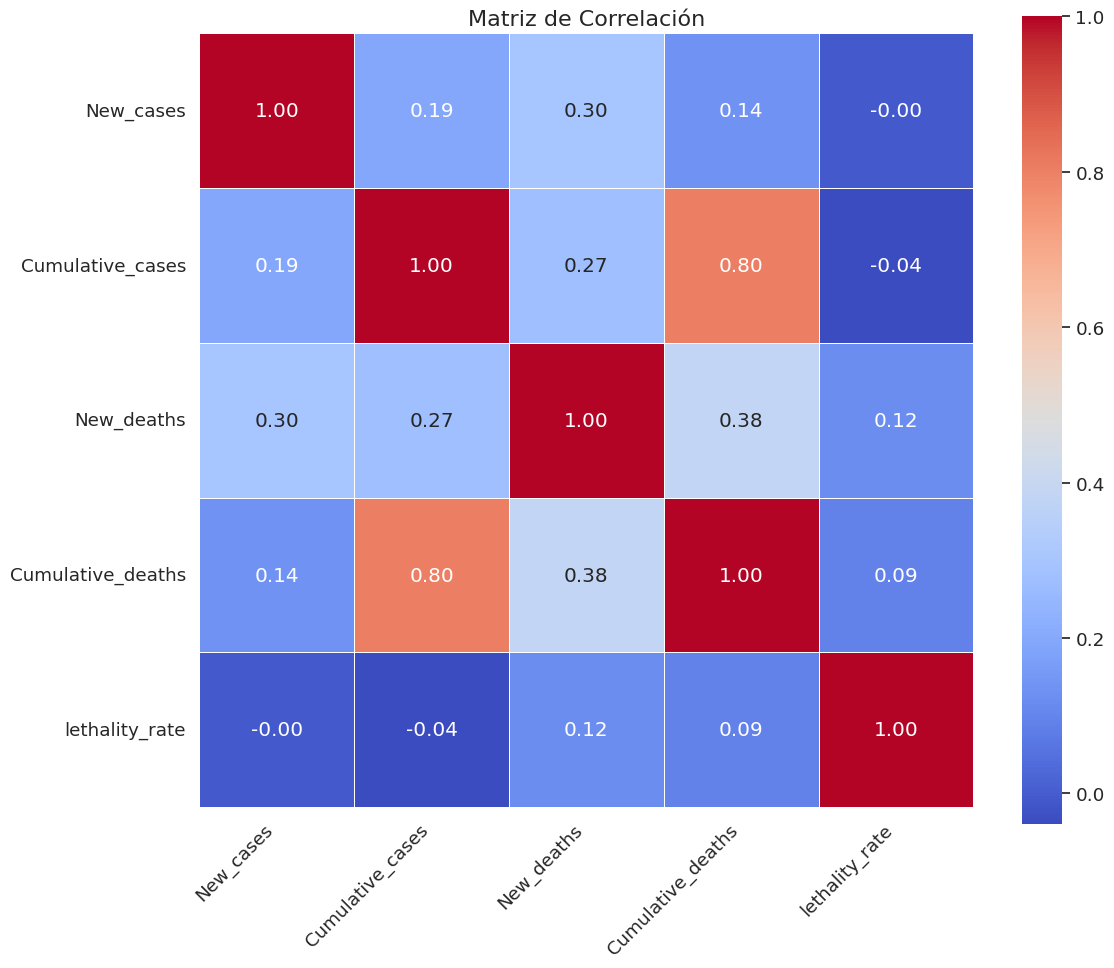

In [ ]:
# Filtrar las columnas numéricas
df_numeric = df_covid_limpio.select_dtypes('number')

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

In [ ]:
import plotly.express as px

# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['Cumulative_cases'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['Cumulative_cases']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['Cumulative_cases'] / datos_agrupados['Cumulative_cases'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='Cumulative_cases', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='Casos Acumulados por país (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='#552E75'),  # Cambiar la fuente y el color
                  xaxis_title='Casos Acumulados',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas casos acumalados y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Estados Unidos india y china son los paises con porcentajes mas altos acumulados de casos por pais
2. los paises obejtivos que estamos evaluando Mexico es el que tiene el porcentaje mas alto de los 3 seguido de colombia

In [ ]:
import plotly.express as px
# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['New_cases'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['New_cases']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['New_cases'] / datos_agrupados['New_cases'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='New_cases', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='Nuevos Casos (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='#552E75'),  # Cambiar la fuente y el color
                  xaxis_title='Cantidad Nuevos Casos',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas casos mas casos nuevos  y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Estados Unidos india y china son los paises con porcentajes mas altos de nuevos casos por pais
2. los paises obejtivos que estamos evaluando Mexico es el que tiene el porcentaje mas alto de los 3 seguido de colombia

In [ ]:
import plotly.express as px
# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['Cumulative_deaths'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['Cumulative_deaths']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['Cumulative_deaths'] / datos_agrupados['Cumulative_deaths'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='Cumulative_deaths', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='Cumulative_deaths (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='#552E75'),  # Cambiar la fuente y el color
                  xaxis_title='Cumulative_deaths',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas casos mas muertes acumuladas  y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Estados Unidos brazil e india son los paises con porcentajes mas altos de muertes acumuladas por pais
2. los paises obejtivos que estamos evaluando Mexico es el que tiene el porcentaje mas alto de los 3 seguido de peru y en este caso colombia es el que menos muertes acumuladas tiene

In [ ]:
import plotly.express as px
# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['lethality_rate'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['lethality_rate']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['lethality_rate'] / datos_agrupados['lethality_rate'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='lethality_rate', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='lethality_rate (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='#552E75'),  # Cambiar la fuente y el color
                  xaxis_title='lethality_rate',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas casos mas indice de letalidad  y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Sudan peru y  y china son los paises con porcentajes mas altos de letalidad
2. los paises obejtivos que estamos evaluando Peru es el que tiene el porcentaje mas alto de los 3 seguido de mexico y de ultimo colombia, aunque esto se debe presentar por un rango de acuerdo a su poblacion

In [ ]:
import plotly.express as px

# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['New_deaths'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['New_deaths']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['New_deaths'] / datos_agrupados['New_deaths'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='New_deaths', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='New_deaths (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='#552E75'),  # Cambiar la fuente y el color
                  xaxis_title='New_deaths',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas nuevas muertes  y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Estados Unidos brazil e india  son los paises con porcentajes mas altos de nuevas muertes por pais
2. los paises obejtivos que estamos evaluando Mexico es el que tiene el porcentaje mas alto de los 3 seguido de peru y de ultimo caso colombia

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Agrupar por fecha y sumar las métricas
date_c = df_covid_limpio.groupby('Date_reported')['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths', 'lethality_rate'].sum().reset_index()

# Crear subgráficos
fig = make_subplots(rows=1, cols=5, subplot_titles=('New Cases', 'Cumulative Cases', 'New Deaths', 'Cumulative Deaths', 'Lethality Rate'))

# Crear trazas
trace1 = go.Scatter(x=date_c['Date_reported'], y=date_c['New_cases'], name="New Cases", line_color='orange', mode='lines+markers', opacity=0.8)
trace2 = go.Scatter(x=date_c['Date_reported'], y=date_c['Cumulative_cases'], name="Cumulative Cases", line_color='red', mode='lines+markers', opacity=0.8)
trace3 = go.Scatter(x=date_c['Date_reported'], y=date_c['New_deaths'], name="New Deaths", mode='lines+markers', line_color='green', opacity=0.8)
trace4 = go.Scatter(x=date_c['Date_reported'], y=date_c['Cumulative_deaths'], name="Cumulative Deaths", line_color='blue', mode='lines+markers', opacity=0.8)
trace5 = go.Scatter(x=date_c['Date_reported'], y=date_c['lethality_rate'], name="Lethality Rate", line_color='purple', mode='lines+markers', opacity=0.8)

# Añadir trazas a los subgráficos
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=1, col=3)
fig.add_trace(trace4, row=1, col=4)
fig.add_trace(trace5, row=1, col=5)

# Configuración del diseño
fig.update_layout(template="plotly_dark", title_text='<b>Propagación mundial del coronavirus a lo largo del tiempo</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans", color='white'))

# Mostrar el gráfico
fig.show();


<ipython-input-37-4637aaf15fed>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Con este grafico podemos analizar todo nuestro data set de una manera mas grafica evaluando atravez del tiempo    y donde podemos generar los siguientes analisis

1. **New Cases:** Se observa una tendencia ascendente entre los años 2021 y 2022, seguida de un descenso en los índices. Sin embargo, a partir del año 2023, se evidencia un crecimiento nuevamente, seguido de una disminución significativa para el año 2024, alcanzando índices muy bajos.

2. **Cumulative_cases** para el 2024 el total de casos acumulados llega a  mas 774 millones de personas que sufrieron covid

3. **New_deaths** en este caso observamos que el pico fuerte de muertes fue durante el periodo del 2020 al 2023 ya para el 2024 la cantidad de muertes es muy baja

4. **Cumulative_deaths** Para la muertes acumuladas se esta por encima de los 7 millones de personas fallecidas desde que empezo el covid

5. **lethality_rate** el indice de letalidad para esta fechas es muy bajo

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filtrar DataFrame para los países específicos
paises_seleccionados = ['Mexico', 'Colombia', 'Peru']
df_seleccionados = df_covid_limpio[df_covid_limpio['Country'].isin(paises_seleccionados)]

# Crear subgráfico
fig = make_subplots(rows=1, cols=4, subplot_titles=("Cumulative_cases", "Cumulative_deaths", "lethality_rate", 'New_cases'))

# Crear trazas para cada país
for pais in paises_seleccionados:
    df_pais = df_seleccionados[df_seleccionados['Country'] == pais]
    trace1 = go.Scatter(x=df_pais['Date_reported'], y=df_pais['Cumulative_cases'], name=f"{pais} - Cumulative_cases", mode='lines+markers', opacity=0.8)
    trace2 = go.Scatter(x=df_pais['Date_reported'], y=df_pais['Cumulative_deaths'], name=f"{pais} - Cumulative_deaths", mode='lines+markers', opacity=0.8)
    trace3 = go.Scatter(x=df_pais['Date_reported'], y=df_pais['lethality_rate'], name=f"{pais} - lethality_rate", mode='lines+markers', opacity=0.8)
    trace4 = go.Scatter(x=df_pais['Date_reported'], y=df_pais['New_cases'], name=f"{pais} - New_cases", mode='lines+markers', opacity=0.8)

    # Añadir trazas al gráfico
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 1, 3)
    fig.append_trace(trace4, 1, 4)

# Configuración adicional del diseño
fig.update_layout(template="plotly_dark", title_text='<b>COVID-19 en México, Colombia y Perú</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans", color='white'))

# Mostrar el gráfico
fig.show()


En este grafico comparamos los 3 paises que estamos evaluando para poder comparalos entre ellos y ver el comportamiento con nuestras variables

In [ ]:
temp = df_covid_limpio.groupby('Date_reported')['Cumulative_cases', 'Cumulative_deaths', 'lethality_rate'].sum().reset_index()
temp = temp.melt(id_vars="Date_reported", value_vars=['Cumulative_cases', 'Cumulative_deaths', 'lethality_rate'],
                 var_name='case', value_name='count')


fig = px.area(temp, x="Date_reported", y="count", color='case',
             title='Casos x Tiempo: Area Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
fig.show()

<ipython-input-39-d71843e62862>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



En este grafico de casos x tiempo podemos observar las 3 variables:

1.  Cumulative_cases
2.  Cumulative_deaths
3.   lethality_rate

Como fue su comportamiento en el tiempo

In [147]:
import plotly.express as px

formated_gdf = df_covid_limpio.groupby(['Date_reported', 'Country'])['Cumulative_cases', 'Cumulative_deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date_reported'] = pd.to_datetime(formated_gdf['Date_reported'])
formated_gdf['Date_reported'] = formated_gdf['Date_reported'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Cumulative_cases'].pow(0.3)

fig = px.scatter_geo(formated_gdf,
                     locations="Country",
                     locationmode='country names',
                     color="Cumulative_cases",
                     size='size',
                     hover_name="Country",
                     range_color=[0, 1500],
                     projection="natural earth",
                     animation_frame="Date_reported",
                     title='COVID-19: Spread Over Time',
                     color_continuous_scale="Viridis",  # Cambié la paleta de colores
                     labels={'Cumulative_cases': 'Casos Acumulados'},
                     template="plotly_dark"  # Utilicé un fondo oscuro
                     )

# Añadir una barra de color y etiquetas informativas
fig.update_layout(coloraxis_colorbar=dict(title='Casos Acumulados', tickvals=[0, 500, 1000, 1500]))

# Ajustar tamaño y visualización
fig.update_traces(marker=dict(line=dict(width=0.5, color='white')))

# Añadir información al título
fig.update_layout(title_text='<b>COVID-19: Distribución temporal en el mundo</b>',
                  title_font=dict(size=20, family='Arial', color='blue'))

fig.show()

# Guardar el gráfico en un archivo HTML
fig.write_html('covid_geo_chart.html')



<ipython-input-147-14ce2294e206>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# EDA Base Population United Nations

In [ ]:
df_population.sample(5)

Index    Variant Region, subregion, country or area * Notes  \
13393  13394  Estimates                               Serbia    24   
11377  11378  Estimates                              Estonia   NaN   
16417  16418  Estimates         United States Virgin Islands    29   
6481    6482  Estimates                           Kyrgyzstan   NaN   
13825  13826  Estimates                               France    26   

       Location code ISO3 Alpha-code ISO2 Alpha-code  SDMX code**  \
13393            688             SRB              RS        688.0   
11377            233             EST              EE        233.0   
16417            850             VIR              VI        850.0   
6481             417             KGZ              KG        417.0   
13825            250             FRA              FR        250.0   

               Type  Parent code  ...  \
13393  Country/Area          925  ...   
11377  Country/Area          924  ...   
16417  Country/Area          915  ...   
6481   Country/Area         5500  ...   
13825  Country/Area          926  ...   

       Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)  \
13393                                             129.91                               
11377                                            152.195                               
16417                                             202.77                               
6481                                                 263                               
13825                                             98.254                               

      Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)  \
13393                                             64.952                                  
11377                                             56.482                                  
16417                                              61.26                                  
6481                                             115.102                                  
13825                                              52.02                                  

      Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)  \
13393                                             30.019                                            
11377                                             42.809                                            
16417                                             55.183                                            
6481                                              81.356                                            
13825                                             29.046                                            

      Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)  \
13393                                             38.886                                           
11377                                             62.959                                           
16417                                             89.142                                           
6481                                             119.007                                           
13825                                             39.193                                           

      Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)  \
13393                                             20.953                                               
11377                                             21.164                                               
16417                                             23.704                                               
6481                                               44.77                                               
13825                                             18.988                                               

      Mortality

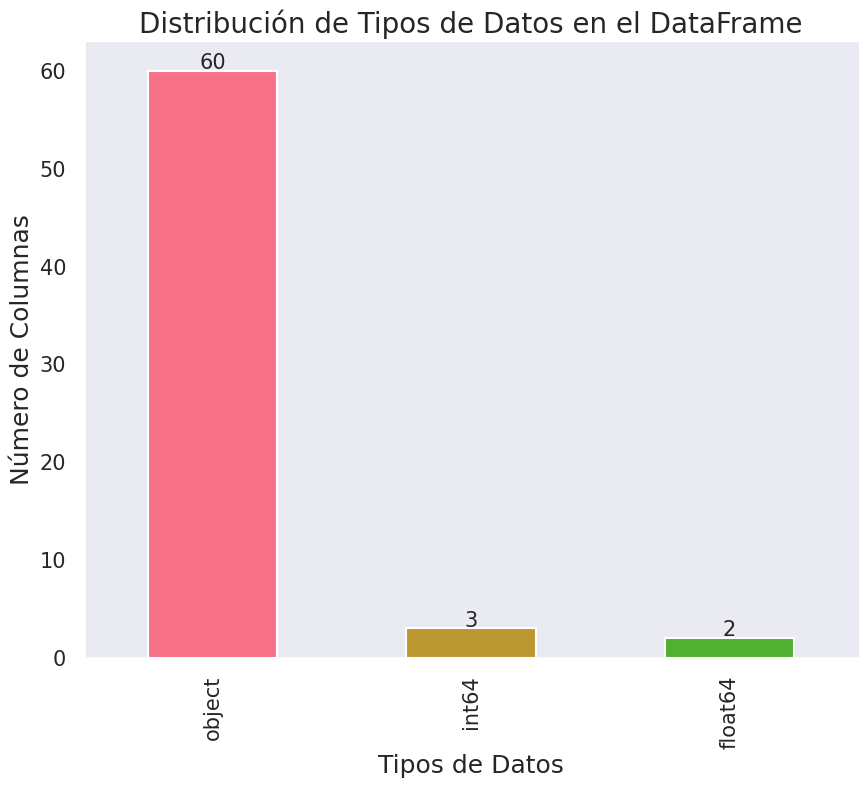

In [ ]:
# Establecemos el estilo de Seaborn
sns.set(style="dark", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_population.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [ ]:
#Información de los datos
print("Número de filas: ",df_population.shape[0])
print("Número de Columnas:",df_population.shape[1])
print("Datos Duplicados",df_population.duplicated().sum())
print("Variables Categóricas: ",df_population.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_population.select_dtypes(exclude='object').shape[1])

Número de filas:  286
Número de Columnas: 65
Datos Duplicados 0
Variables Categóricas:  60
Variables Numéricas:  5


* Validamos que tenemos 65 columnas y 286 filas
* Evaluaremos que columnas serán más importantes para nuestros análisis

In [ ]:
#alizamos una visión general de nuestros tipos de datos
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           286 non-null    int64  
 1   Variant                                                                                         286 non-null    object 
 2   Region, subregion, country or area *                                                            286 non-null    object 
 3   Notes                                                                                           76 non-null     object 
 4   Location code                                                                                   286 non-null    int64  
 5   ISO3 Alpha-c

Mantener en el dataframe sólo las siguientes columnas: ['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']

In [ ]:
#Listamos de columnas que deseas mantener
columnas_a_mantener = ['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']
# Crear un nuevo DataFrame con solo las columnas deseadas
df_population_limpio = df_population[columnas_a_mantener]
# Mostramos las primeras filas del DataFrame resultante
df_population_limpio.sample(5)

ISO2 Alpha-code Total Population, as of 1 July (thousands)  \
18361              CA                                  37522.584   
6553               TJ                                   9337.003   
4249               MA                                  36304.408   
11809              IM                                     83.933   
18937             NaN                                  11725.721   

      Male Population, as of 1 July (thousands)  \
18361                                 18641.142   
6553                                   4696.898   
4249                                  18281.786   
11809                                    41.583   
18937                                  6038.745   

      Female Population, as of 1 July (thousands)  \
18361                                   18881.443   
6553                                     4640.105   
4249                                    18022.621   
11809                                       42.35   
18937                                    5686.976   

      Population Density, as of 1 July (persons per square km)  \
18361                                              4.126         
6553                                              65.248         
4249                                              81.345         
11809                                            146.736         
18937                                             22.107         

      Life Expectancy at Birth, both sexes (years)  
18361                                       82.363  
6553                                        70.867  
4249                                         74.27  
11809                                       80.737  
18937                                       66.458

Renombrar las columnas para nombre más sencillos:

In [ ]:
# Utilizando el método .rename() para cambiar el nombre de las columnas en un DataFrame
# Cambiar el nombre de las columnas especificadas
df_population_limpio = df_population_limpio.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
})
df_population_limpio.sample(5)

Country_code Total_Population Male_Population Female_Population  \
10657           CZ        10536.871        5189.271            5347.6   
17929           PE        32824.861       16268.182         16556.679   
3385            CM        25782.341       12855.489         12926.852   
8785            TH        71307.763       34723.388         36584.375   
10297           YE        31546.691       15953.578         15593.113   

      Population_Density Life_Expectancy  
10657            136.483          79.243  
17929             25.643          76.156  
3385              55.321          61.584  
8785             139.576          78.975  
10297             59.751          65.092

In [ ]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    286 non-null    object
 2   Male_Population     286 non-null    object
 3   Female_Population   286 non-null    object
 4   Population_Density  286 non-null    object
 5   Life_Expectancy     286 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


Eliminar todos los registros nulos.

In [ ]:
#datos nulos por columna
df_population_limpio.isnull().sum().sort_values(ascending=False)

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

Text(0, 0.5, 'Filas')

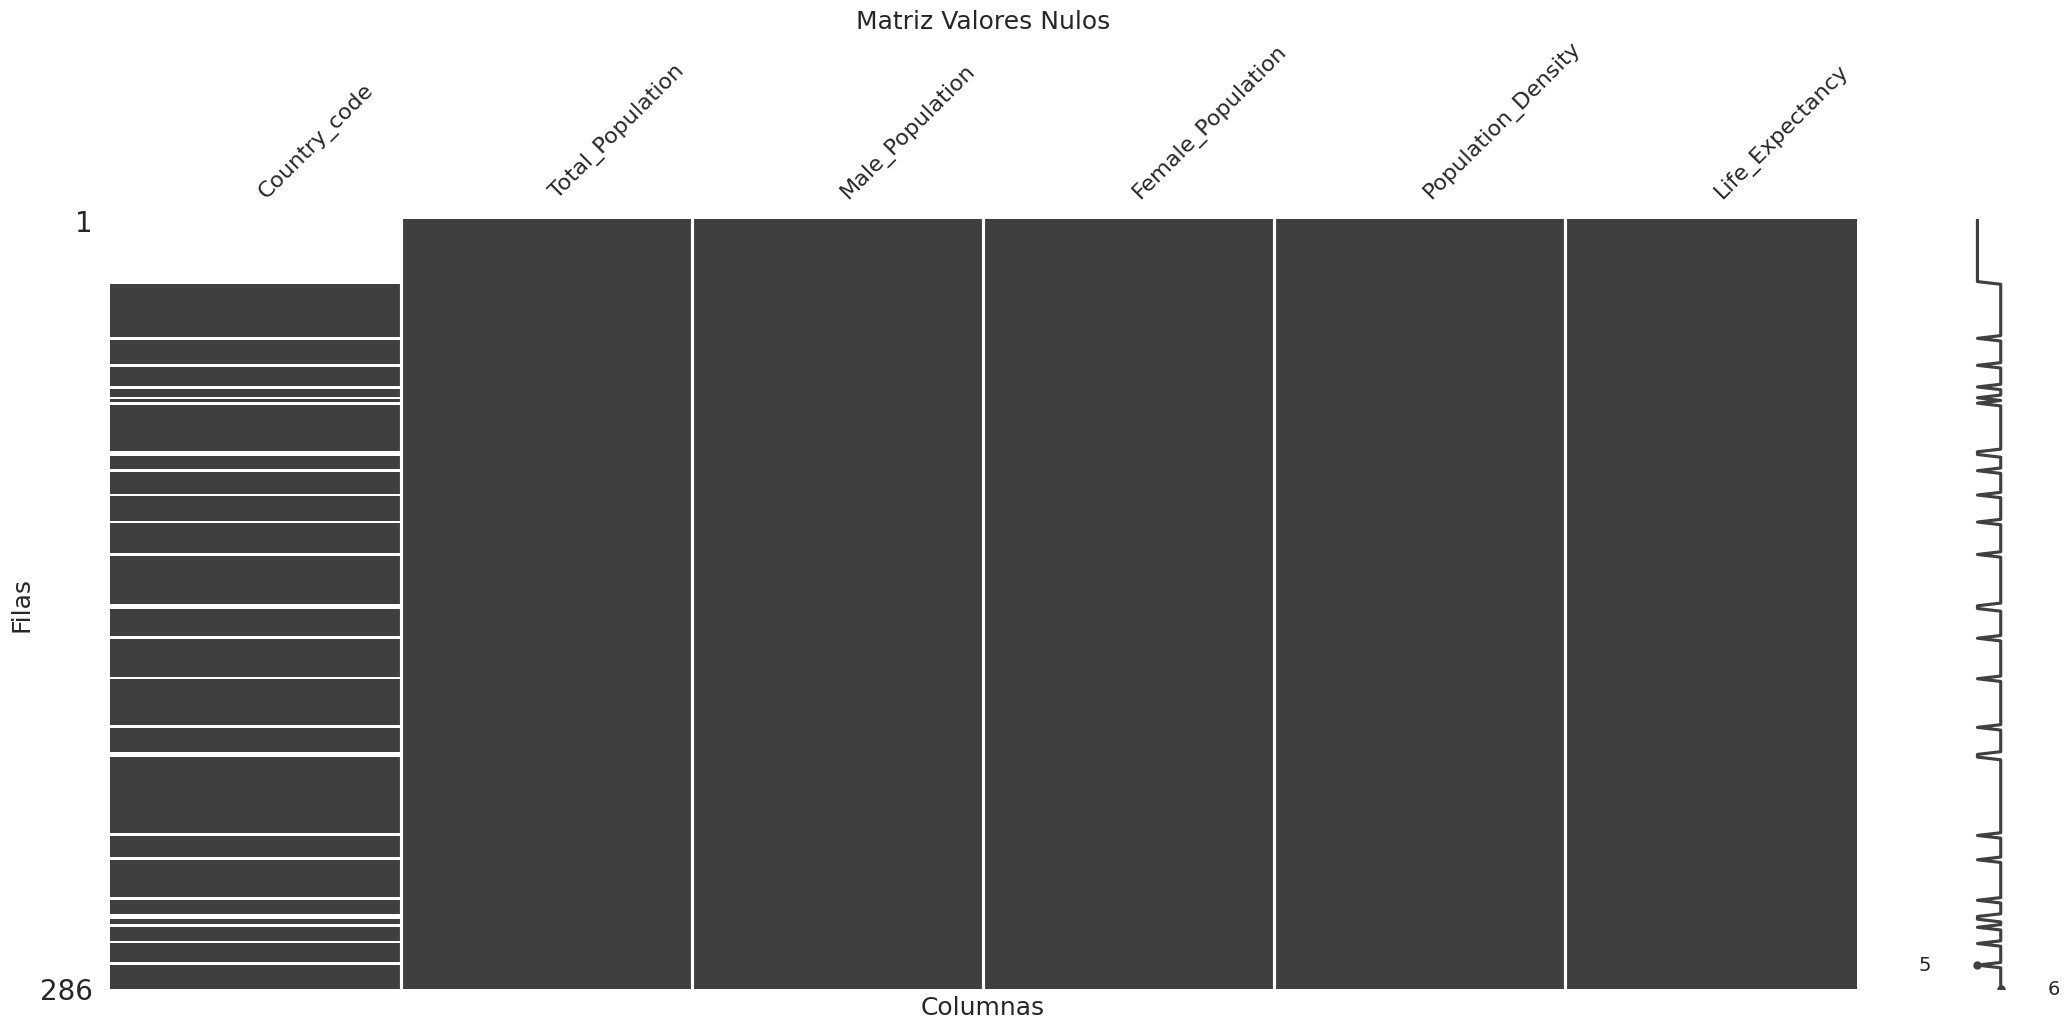

In [ ]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_population_limpio)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

In [ ]:
# Eliminar todas las filas que contienen al menos un valor nulo
df_population_limpio = df_population_limpio.dropna()

Text(0, 0.5, 'Filas')

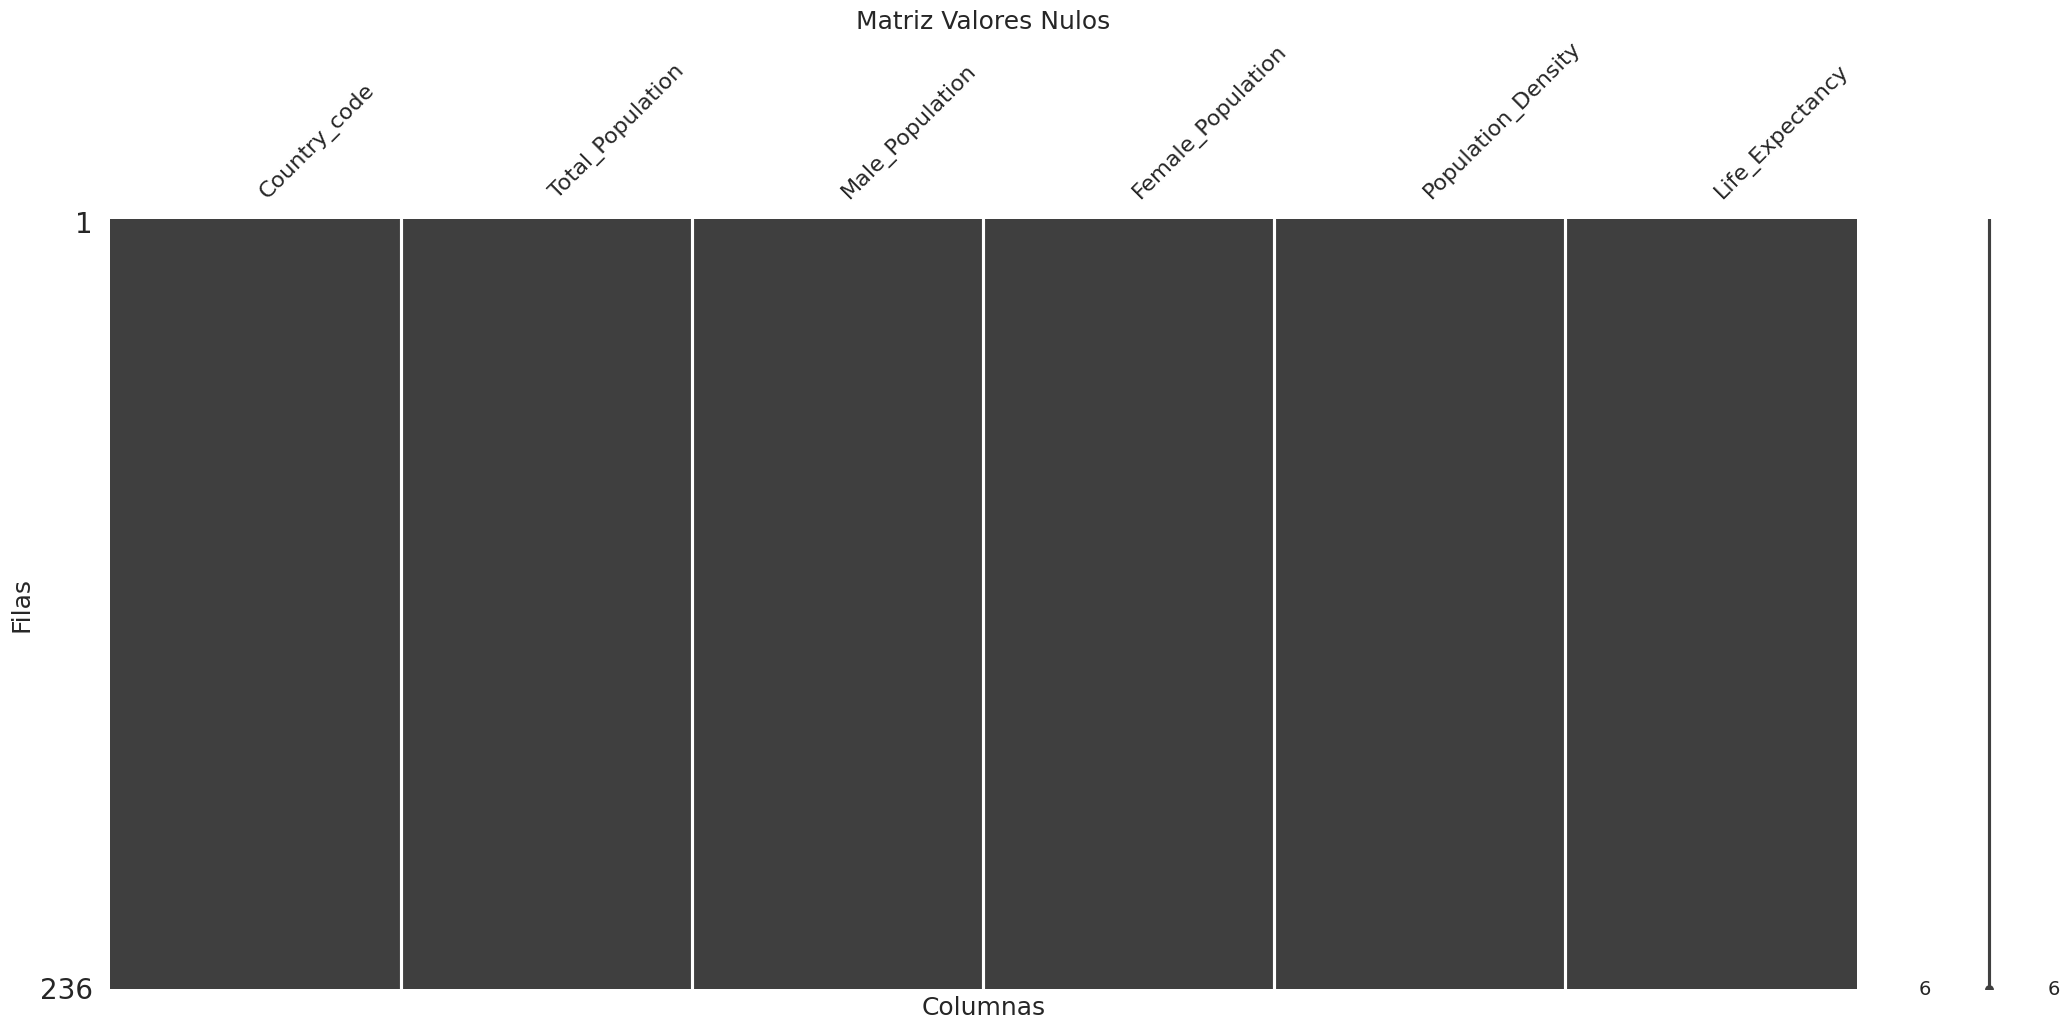

In [ ]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_population_limpio)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

Substituir el formato actual de las columnas
['Total_Population','Male_Population','Female_Population','Population_Density','Life_Expectancy']para un formato de tipo int64.

los campos que necesitamos convertir tienen valores pero hay valores no enteros en la columna que estamos tratando de convertir.

In [ ]:
# Columnas que deseas convertir
columns_to_convert = ['Total_Population', 'Male_Population', 'Population_Density', 'Life_Expectancy']

# Manejar los NaN y valores no numéricos
for column in columns_to_convert:
    df_population_limpio[column] = pd.to_numeric(df_population_limpio[column], errors='coerce')

# Lidiar con NaN asignando un valor predeterminado
fill_value = 0  # Puedes cambiar esto al valor que desees
df_population_limpio[columns_to_convert] = df_population_limpio[columns_to_convert].fillna(fill_value)

In [ ]:
# Verificar el tipo de dato después de la conversión
print("Tipo de dato después de la conversión de Total_Population:", df_population_limpio['Total_Population'].dtype)
print("Tipo de dato después de la conversión de Male_Population:", df_population_limpio['Male_Population'].dtype)
print("Tipo de dato después de la conversión de Population_Density:", df_population_limpio['Population_Density'].dtype)
print("Tipo de dato después de la conversión de Life_Expectancy:", df_population_limpio['Life_Expectancy'].dtype)


Tipo de dato después de la conversión de Total_Population: float64
Tipo de dato después de la conversión de Male_Population: float64
Tipo de dato después de la conversión de Population_Density: float64
Tipo de dato después de la conversión de Life_Expectancy: float64


Multiplicar por 1000 el valor actual de las siguientes columnas 'Total_Population','Male_Population','Female_Population' y sobreescribirlas.

Substituir todos los valores nulos con cero.

In [ ]:
# Multiplicar por 1000 y sobreescribir las columnas
columns_to_multiply = ['Total_Population', 'Male_Population', 'Female_Population']

df_population_limpio[columns_to_multiply] = df_population_limpio[columns_to_multiply] * 1000

# Substituir los valores nulos con cero
df_population_limpio = df_population_limpio.fillna(0)


Substituir todos los valores nulos con cero.

Finalmente reiniciaremos el índice del dataframe final df_population_limpio

In [ ]:
#Reiniciar el índice del DataFrame
df_population_limpio = df_population_limpio.reset_index(drop=True)
# Mostramos 5 filas del DataFrame resultante
df_population_limpio.head(5)

Country_code  Total_Population  Male_Population Female_Population  \
0           BI        11874838.0        5894278.0         5980560.0   
1           KM          790986.0         397126.0          393860.0   
2           DJ         1073994.0         533626.0          540367.0   
3           ER         3498818.0        1724860.0         1773958.0   
4           ET       114120594.0       57375433.0        56745161.0   

   Population_Density  Life_Expectancy  
0             457.605           62.351  
1             425.033           64.068  
2              46.333           63.085  
3              28.881           67.300  
4             114.121           65.838

In [ ]:
df_population_limpio.sample(5)

Country_code  Total_Population  Male_Population Female_Population  \
202           GY          798753.0         392821.0          405932.0   
28            ST          214599.0         107123.0          107476.0   
26            GQ         1553031.0         821881.0          731149.0   
209           CA        37522584.0       18641142.0        18881443.0   
92            BH         1494188.0         933409.0          560779.0   

     Population_Density  Life_Expectancy  
202               4.058           69.124  
28              223.541           68.523  
26               55.367           61.644  
209               4.126           82.363  
92             1908.287           80.019

# 3. Planteamiento de Preguntas

#Pregunta 1



**> ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?**






Para realizar este análisis necesitamos construir 2 bases de datos diferentes para los 2 gráficos mostrados:

**Worldwide Cases Distribution**

Usando el dataframe df_covid_limpio, vamos a agrupar por país y obtener el máximo valor de la columna Cumulative_cases, luego lo ordenamos descendentemente y guardamos el resultado en total_por_pais.

Luego, seleccionamos los 10 primeros países y guardamos el resultado en top_10_paises.

In [ ]:
df_covid_limpio.head()

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0    2020-01-05           AF  Afghanistan          0                 0   
1    2020-01-12           AF  Afghanistan          0                 0   
2    2020-01-19           AF  Afghanistan          0                 0   
3    2020-01-26           AF  Afghanistan          0                 0   
4    2020-02-02           AF  Afghanistan          0                 0   

   New_deaths  Cumulative_deaths  lethality_rate  
0           0                  0             0.0  
1           0                  0             0.0  
2           0                  0             0.0  
3           0                  0             0.0  
4           0                  0             0.0

In [ ]:
# Agrupar por país y obtener el máximo valor de Cumulative_cases
top_10_paises = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().reset_index()[['Country', 'Cumulative_cases']]

# Ordenar descendentemente
top_10_paises = top_10_paises.sort_values(by='Cumulative_cases', ascending=False)

# Mostrar el resultado final
top_10_paises.head(10)


Country  Cumulative_cases
222                           United States of America         103436829
42                                               China          99326423
96                                               India          45023751
72                                              France          38997490
78                                             Germany          38437756
28                                              Brazil          37519960
168                                  Republic of Korea          34571873
105                                              Japan          33803572
103                                              Italy          26693706
219  United Kingdom of Great Britain and Northern I...          24885790

In [ ]:
# ## Agrupando los países que no están en el top 10
otros_paises = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().reset_index()[['Country', 'Cumulative_cases']].sort_values(by='Cumulative_cases', ascending=False).iloc[10:]
otros_paises.head()


Country  Cumulative_cases
171  Russian Federation          23773710
215             Türkiye          17004677
197               Spain          13980340
11            Australia          11752647
227            Viet Nam          11624000

In [ ]:
## Conseguimos los 3 países que analizaremos el COVID 19: México - Perú - Colombia
paises_evaluar = otros_paises[(otros_paises['Country']== 'Mexico') | (otros_paises['Country']=='Peru')
                                       | (otros_paises['Country']=='Colombia')]
paises_evaluar

Country  Cumulative_cases
134    Mexico           7702809
43   Colombia           6391672
161      Peru           4536733

In [ ]:
## Casos acumulados por los países que no están en el Top 10 menos los 3 países que estamos analizando
otros_paises_sin_analisis = otros_paises['Cumulative_cases'].sum() - paises_evaluar['Cumulative_cases'].sum()
otros_paises_sin_analisis

272888641

In [ ]:
# Agrupar por país y obtener el máximo valor de Cumulative_cases
total_por_pais = (
    df_covid_limpio.groupby('Country')['Cumulative_cases']
    .max()
    .reset_index()
    .sort_values(by='Cumulative_cases', ascending=False)
)

# Incluir los 10 primeros países y los 3 países adicionales en una sola variable
top_10_paises = total_por_pais.head(10)
paises_adicionales = total_por_pais[total_por_pais['Country'].isin(['Mexico', 'Peru', 'Colombia'])]

# Concatenar los DataFrames
top_10_paises = pd.concat([top_10_paises, paises_adicionales], ignore_index=True)

## Adicionando nueva fila al dataframe top_10_countries
nueva_fila = {'Country': 'otros_paises', 'Cumulative_cases': otros_paises_sin_analisis}
top_10_paises = top_10_paises.append(nueva_fila,ignore_index=True)

# Mostrar el resultado final
top_10_paises

<ipython-input-62-8de2ebaec4a8>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Country  Cumulative_cases
0                            United States of America         103436829
1                                               China          99326423
2                                               India          45023751
3                                              France          38997490
4                                             Germany          38437756
5                                              Brazil          37519960
6                                   Republic of Korea          34571873
7                                               Japan          33803572
8                                               Italy          26693706
9   United Kingdom of Great Britain and Northern I...          24885790
10                                             Mexico           7702809
11                                           Colombia           6391672
12                                               Peru           4536733
13                                       otros_paises         272888641

In [ ]:
# Modificando los nombres de algunos países por su longitud
top_10_paises['Country'] = top_10_paises['Country'].replace({
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'
})

# Mostrar el DataFrame resultante
top_10_paises


Country  Cumulative_cases
0                 USA         103436829
1               China          99326423
2               India          45023751
3              France          38997490
4             Germany          38437756
5              Brazil          37519960
6   Republic of Korea          34571873
7               Japan          33803572
8               Italy          26693706
9      United Kingdom          24885790
10             Mexico           7702809
11           Colombia           6391672
12               Peru           4536733
13       otros_paises         272888641

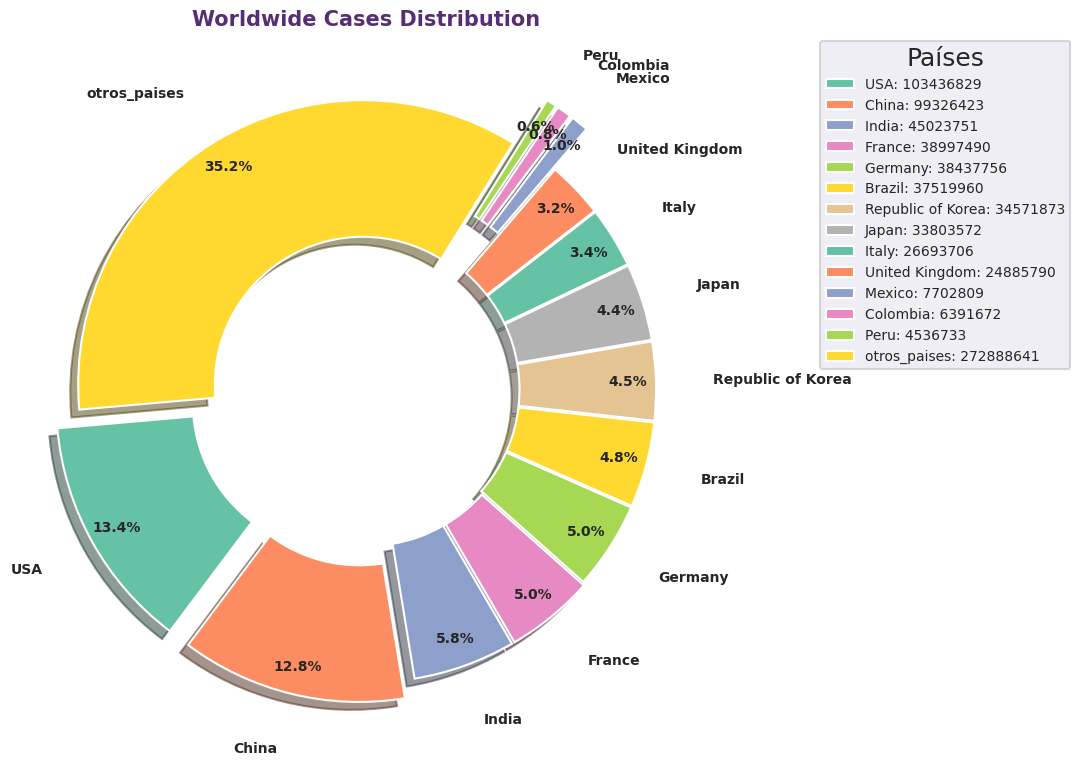

In [ ]:
# Datos
valores = top_10_paises['Cumulative_cases']
etiqueta = top_10_paises['Country']
explode = (0.1, 0.1, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.2, 0.2, 0.2, 0.02)

# Colores personalizados usando la paleta 'Set3' de seaborn
colors = sns.color_palette('Set2', len(valores))

plt.figure(figsize=(12, 8))
patches, texts, autotexts = plt.pie(valores, labels=etiqueta, explode=explode, autopct='%1.1f%%',
                                    textprops={'fontsize': 10, 'weight': 'bold'}, pctdistance=0.9,
                                    startangle=185, wedgeprops=dict(width=0.48, edgecolor='w'), labeldistance=1.2, colors=colors, shadow=True)

# Agregar leyenda en la parte superior izquierda fuera de la dona
legend_labels = [f'{etiqueta[i]}: {valores[i]}' for i in range(len(valores))]
plt.legend(patches, legend_labels, title='Países', loc='upper right', bbox_to_anchor=(1.5, 1.0), fontsize=10)

plt.title('Worldwide Cases Distribution', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '#552E75'})
plt.tight_layout()
plt.show()

**Conclusión 1**
Observamos que la evolución del COVID-19 en Colombia ha sido gestionada de manera efectiva, y tanto Perú como México también han logrado un control en comparación con otros países en general. Sin embargo, es importante señalar que la tasa de evolución en estos países es más alta en comparación con los 10 países que estamos analizando, lo que destaca la necesidad continua de vigilancia y medidas preventivas para mantener la situación bajo control. La comparación con los países de mayor índice de evolución resalta la importancia de continuar con estrategias efectivas de mitigación y respuesta para proteger la salud pública.

## **Case Progression by Country**

Luego, seleccionamos los 5 primeros países y guardamos el resultado en top_5_paises.

In [ ]:
## Escogemos los 5 países con más casos acumulados
total_5_paises = df_covid_limpio.groupby('Country').max().reset_index()[['Country','Cumulative_cases']].sort_values(by='Cumulative_cases',ascending=False).head(5)
total_5_paises

Country  Cumulative_cases
222  United States of America         103436829
42                      China          99326423
96                      India          45023751
72                     France          38997490
78                    Germany          38437756

In [ ]:
# Usando concat para agregar los 3 paises a analizar
total_5_paises = pd.concat([total_5_paises, paises_evaluar], ignore_index= True)
total_5_paises

Country  Cumulative_cases
0  United States of America         103436829
1                     China          99326423
2                     India          45023751
3                    France          38997490
4                   Germany          38437756
5                    Mexico           7702809
6                  Colombia           6391672
7                      Peru           4536733

In [ ]:
## Creamos un dataframe que contenga solo 3 columnas elegidas
df_casos_acumulados = df_covid_limpio[['Country','Date_reported','Cumulative_cases']]
df_casos_acumulados

Country Date_reported  Cumulative_cases
0      Afghanistan    2020-01-05                 0
1      Afghanistan    2020-01-12                 0
2      Afghanistan    2020-01-19                 0
3      Afghanistan    2020-01-26                 0
4      Afghanistan    2020-02-02                 0
...            ...           ...               ...
48897     Zimbabwe    2023-12-24            266048
48898     Zimbabwe    2023-12-31            266071
48899     Zimbabwe    2024-01-07            266117
48900     Zimbabwe    2024-01-14            266202
48901     Zimbabwe    2024-01-21            266257

[48902 rows x 3 columns]

In [ ]:
## Agrupamos el dataframe creado solo por nuestro top 5 de países con más casos acumulados
df_top5_acumulados = df_casos_acumulados[df_casos_acumulados['Country'].isin(total_5_paises['Country'])]
df_top5_acumulados

Country Date_reported  Cumulative_cases
8851                      China    2020-01-05                 1
8852                      China    2020-01-12                45
8853                      China    2020-01-19               125
8854                      China    2020-01-26              1985
8855                      China    2020-02-02             14411
...                         ...           ...               ...
46983  United States of America    2023-12-24         103436829
46984  United States of America    2023-12-31         103436829
46985  United States of America    2024-01-07         103436829
46986  United States of America    2024-01-14         103436829
46987  United States of America    2024-01-21         103436829

[1626 rows x 3 columns]

In [ ]:
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como se iba acumulando los casos para nuestro top5
total_top5_acumulados = df_top5_acumulados.pivot(index='Country', columns='Date_reported', values='Cumulative_cases')
total_top5_acumulados

Date_reported             2020-01-05  2020-01-12  2020-01-19  2020-01-26  \
Country                                                                    
China                            1.0        45.0       125.0      1985.0   
Colombia                         0.0         0.0         0.0         0.0   
France                           0.0         0.0         0.0         3.0   
Germany                          NaN         NaN         NaN         NaN   
India                            0.0         0.0         0.0         0.0   
Mexico                           0.0         0.0         0.0         0.0   
Peru                             0.0         0.0         0.0         0.0   
United States of America         0.0         0.0         0.0         7.0   

Date_reported             2020-02-02  2020-02-09  2020-02-16  2020-02-23  \
Country                                                                    
China                        14411.0     37251.0     68584.0     77042.0   
Colombia                         0.0         0.0         0.0         0.0   
France                           6.0        12.0        12.0        16.0   
Germany                          NaN         NaN         NaN         NaN   
India                            2.0         7.0         7.0         7.0   
Mexico                           0.0         0.0         0.0         1.0   
Peru                             0.0         0.0         0.0         0.0   
United States of America         9.0        20.0        24.0        40.0   

Date_reported             2020-03-01  2020-03-08  ...   2023-11-19  \
Country                                           ...                
China                        79968.0     80859.0  ...   99320035.0   
Colombia                         0.0         1.0  ...    6383595.0   
France                          16.0        16.0  ...   38997490.0   
Germany                        170.0      1075.0  ...   38437756.0   
India                            7.0        39.0  ...   45001575.0   
Mexico                           6.0        51.0  ...    7702324.0   
Peru                             0.0         9.0  ...    4525960.0   
United States of America        73.0       464.0  ...  103436829.0   

Date_reported              2023-11-26   2023-12-03   2023-12-10   2023-12-17  \
Country                                                                        
China                      99320425.0   99320845.0   99321242.0   99321637.0   
Colombia                    6383948.0    6384224.0    6384551.0    6384979.0   
France                     38997490.0   38997490.0   38997490.0   38997490.0   
Germany                    38437756.0   38437756.0   38437756.0   38437756.0   
India                      45001764.0   45002179.0   45003055.0   45004816.0   
Mexico                      7702412.0    7702517.0    7702619.0    7702738.0   
Peru                        4527448.0    4529542.0    4532076.0    4535365.0   
United States of America  103436829.0  103436829.0  103436829.0  103436829.0   

Date_reported              2023-12-24   2023-12-31   2024-01-07   2024-01-14  \
Country                                                                        
China                      99322142.0   99322727.0   99323756.0   99325108.0   
Colombia                    6385539.0    6386231.0    6387209.0    6389365.0   
France                     38997490.0   38997490.0   38997490.0   38997490.0   
Germany                    38437756.0   38437756.0   38437756.0   38437756.0   
India                      45008620.0   45013172.0   45018134.0   45021758.0   
Mexico                      7702802.0    7702809.0    7702809.0    7702809.0   
Peru                        4536698.0    4536733.0    4536733.0    4536733.0   
United States of America  103436829.0  103436829.0  103436829.0  103436829.0   

Date_reported              2024-01-21  
Country                                
China                      99326423.0  
Colombia                    6391672.0  
France         

In [ ]:
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como se iba acumulando los casos para nuestro top5
total_top5_acumulados = df_top5_acumulados.pivot(index='Date_reported', columns='Country', values='Cumulative_cases').reset_index()
total_top5_acumulados

Country Date_reported       China   Colombia      France     Germany  \
0          2020-01-05         1.0        0.0         0.0         NaN   
1          2020-01-12        45.0        0.0         0.0         NaN   
2          2020-01-19       125.0        0.0         0.0         NaN   
3          2020-01-26      1985.0        0.0         3.0         NaN   
4          2020-02-02     14411.0        0.0         6.0         NaN   
..                ...         ...        ...         ...         ...   
207        2023-12-24  99322142.0  6385539.0  38997490.0  38437756.0   
208        2023-12-31  99322727.0  6386231.0  38997490.0  38437756.0   
209        2024-01-07  99323756.0  6387209.0  38997490.0  38437756.0   
210        2024-01-14  99325108.0  6389365.0  38997490.0  38437756.0   
211        2024-01-21  99326423.0  6391672.0  38997490.0  38437756.0   

Country       India     Mexico       Peru  United States of America  
0               0.0        0.0        0.0                       0.0  
1               0.0        0.0        0.0                       0.0  
2               0.0        0.0        0.0                       0.0  
3               0.0        0.0        0.0                       7.0  
4               2.0        0.0        0.0                       9.0  
..              ...        ...        ...                       ...  
207      45008620.0  7702802.0  4536698.0               103436829.0  
208      45013172.0  7702809.0  4536733.0               103436829.0  
209      45018134.0  7702809.0  4536733.0               103436829.0  
210      45021758.0  7702809.0  4536733.0               103436829.0  
211      45023751.0  7702809.0  4536733.0               103436829.0  

[212 rows x 9 columns]

In [ ]:
total_top5_acumulados['Cumulative_days'] = total_top5_acumulados['Date_reported'].diff().dt.days.fillna(0).cumsum()
total_top5_acumulados

Country Date_reported       China   Colombia      France     Germany  \
0          2020-01-05         1.0        0.0         0.0         NaN   
1          2020-01-12        45.0        0.0         0.0         NaN   
2          2020-01-19       125.0        0.0         0.0         NaN   
3          2020-01-26      1985.0        0.0         3.0         NaN   
4          2020-02-02     14411.0        0.0         6.0         NaN   
..                ...         ...        ...         ...         ...   
207        2023-12-24  99322142.0  6385539.0  38997490.0  38437756.0   
208        2023-12-31  99322727.0  6386231.0  38997490.0  38437756.0   
209        2024-01-07  99323756.0  6387209.0  38997490.0  38437756.0   
210        2024-01-14  99325108.0  6389365.0  38997490.0  38437756.0   
211        2024-01-21  99326423.0  6391672.0  38997490.0  38437756.0   

Country       India     Mexico       Peru  United States of America  \
0               0.0        0.0        0.0                       0.0   
1               0.0        0.0        0.0                       0.0   
2               0.0        0.0        0.0                       0.0   
3               0.0        0.0        0.0                       7.0   
4               2.0        0.0        0.0                       9.0   
..              ...        ...        ...                       ...   
207      45008620.0  7702802.0  4536698.0               103436829.0   
208      45013172.0  7702809.0  4536733.0               103436829.0   
209      45018134.0  7702809.0  4536733.0               103436829.0   
210      45021758.0  7702809.0  4536733.0               103436829.0   
211      45023751.0  7702809.0  4536733.0               103436829.0   

Country  Cumulative_days  
0                    0.0  
1                    7.0  
2                   14.0  
3                   21.0  
4                   28.0  
..                   ...  
207               1449.0  
208               1456.0  
209               1463.0  
210               1470.0  
211               1477.0  

[212 rows x 10 columns]

<ipython-input-72-60f88a620505>:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



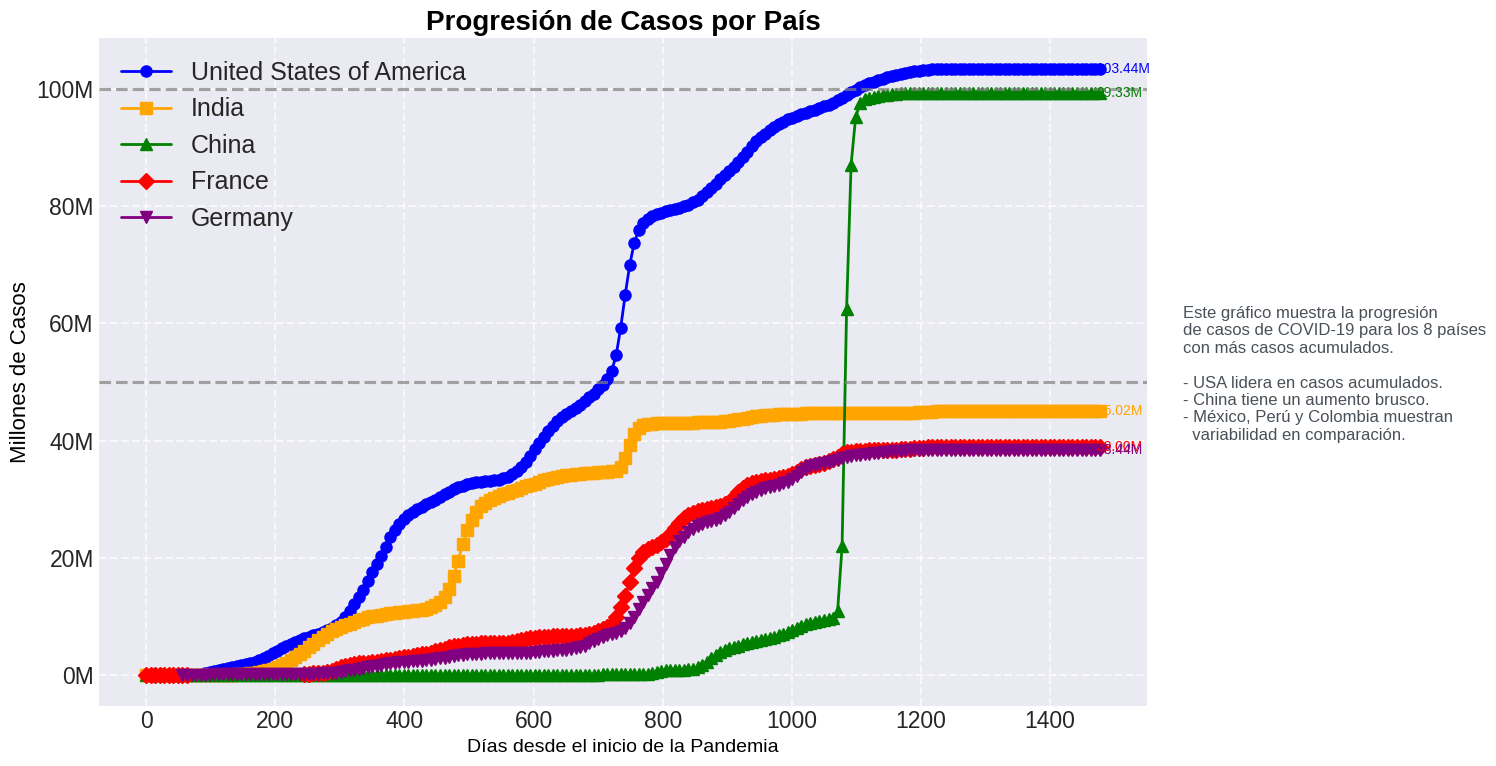

In [ ]:
from matplotlib.ticker import FuncFormatter

# Configurar el tamaño del gráfico y el estilo de Seaborn
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-dark')

# Datos de x y y
x = total_top5_acumulados['Cumulative_days']
y = total_top5_acumulados[['United States of America', 'India', 'China', 'France', 'Germany']]

# Colores más distintivos
colores = ['blue', 'orange', 'green', 'red', 'purple', 'chartreuse', 'gold', 'darkred']

# Marcadores más pequeños
marcadores = ['o', 's', '^', 'D', 'v', 'o', 's', '^']

# Crear líneas para cada país con etiquetas, colores y marcadores
for i, (country, color, marcador) in enumerate(zip(y.columns, colores, marcadores)):
    plt.plot(x, y[country], label=country, color=color, linewidth=2, marker=marcador, markersize=8)

    # Agregar etiquetas de datos al final de cada línea
    plt.text(x.iloc[-2] + 2, y[country].iloc[-2], f'{y[country].iloc[-2] / 1e6:.2f}M', color=color, fontsize=10, va='center')

# Añadir título y etiquetas
plt.title('Progresión de Casos por País', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black'})
plt.xlabel('Días desde el inicio de la Pandemia', fontdict={'fontsize': 14, 'color': 'black'})
plt.ylabel('Millones de Casos', fontdict={'fontsize': 16, 'color': 'black'})

# Añadir formateo al eje Y con números enteros y "M" para millones
def millions_formatter(x, _):
    return f'{int(x/1e6)}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Añadir texto de conclusión
conclusion_text = '''
Este gráfico muestra la progresión
de casos de COVID-19 para los 8 países
con más casos acumulados.

- USA lidera en casos acumulados.
- China tiene un aumento brusco.
- México, Perú y Colombia muestran
  variabilidad en comparación.

'''

plt.figtext(1, 0.5, conclusion_text, fontsize=12, color='#495057', va='center', ha='left')

# Añadir leyenda, líneas de referencia y ajustar diseño
plt.legend(fontsize='medium')
plt.axhline(y=50e6, color='gray', linestyle='--', alpha=0.7, label='50M casos (referencia)')
plt.axhline(y=100e6, color='gray', linestyle='--', alpha=0.7, label='100M casos (referencia)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
# Mostrar el gráfico
plt.show()


<ipython-input-73-636fc0a07082>:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



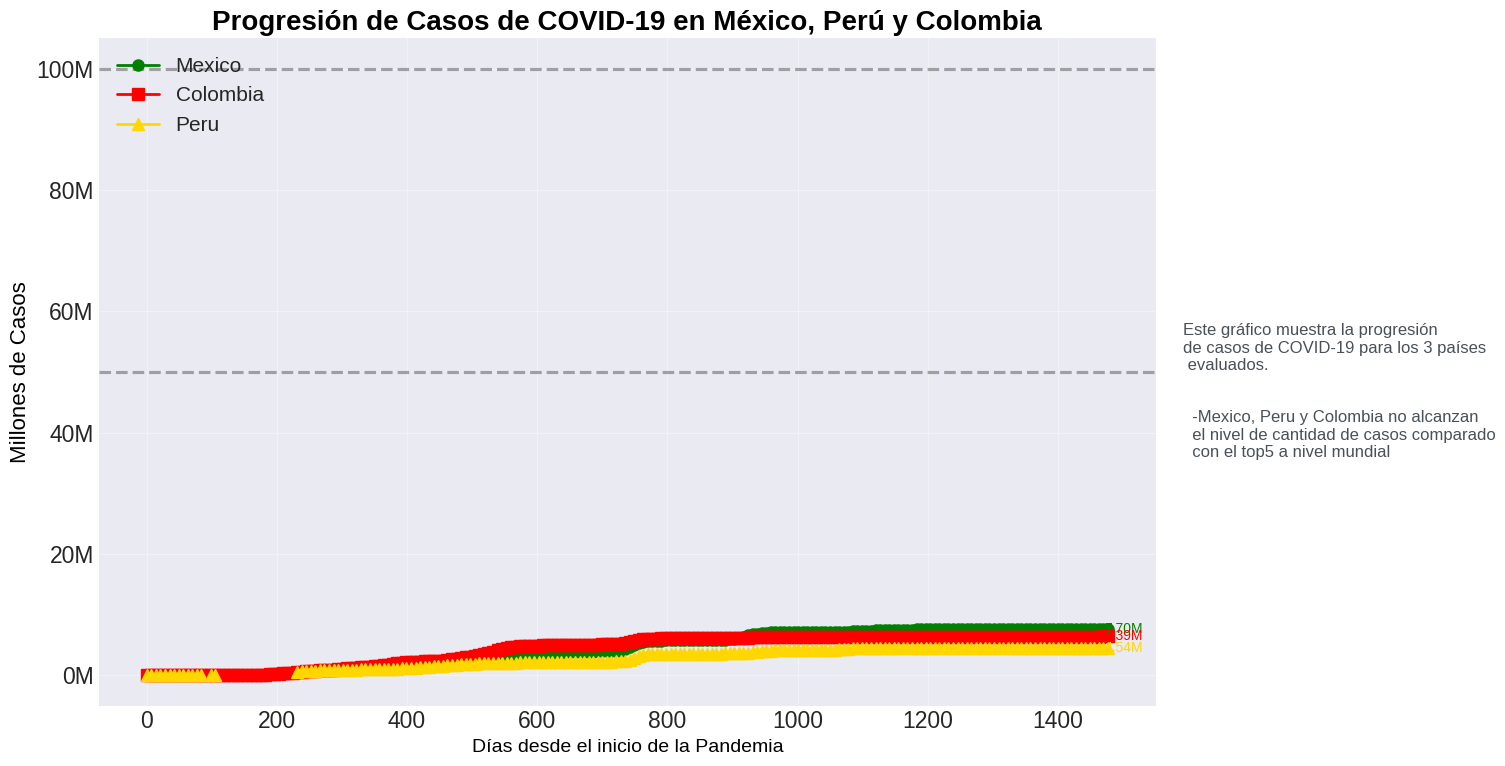

In [ ]:
from matplotlib.ticker import FuncFormatter

# Configurar el tamaño del gráfico y el estilo de Seaborn
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-dark')

# Datos de x y y
x = total_top5_acumulados['Cumulative_days']
y = total_top5_acumulados[[ 'Mexico', 'Colombia', 'Peru']]

# Colores más distintivos
colores = [ 'green', 'red',  'gold']

# Marcadores más pequeños
marcadores = ['o', 's', '^']

# Crear líneas para cada país con etiquetas, colores y marcadores
for i, (country, color, marcador) in enumerate(zip(y.columns, colores, marcadores)):
    plt.plot(x, y[country], label=country, color=color, linewidth=2, marker=marcador, markersize=8)

    # Agregar etiquetas de datos al final de cada línea
    plt.text(x.iloc[-2] + 2, y[country].iloc[-2], f'{y[country].iloc[-2] / 1e6:.2f}M', color=color, fontsize=10, va='center')

# Añadir título y etiquetas
plt.title('Progresión de Casos de COVID-19 en México, Perú y Colombia', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black'})
plt.xlabel('Días desde el inicio de la Pandemia', fontdict={'fontsize': 14, 'color': 'black'})
plt.ylabel('Millones de Casos', fontdict={'fontsize': 16, 'color': 'black'})

# Añadir formateo al eje Y con números enteros y "M" para millones
def millions_formatter(x, _):
    return f'{int(x/1e6)}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Añadir texto de conclusión
conclusion_text = '''
Este gráfico muestra la progresión
de casos de COVID-19 para los 3 países
 evaluados.


  -Mexico, Peru y Colombia no alcanzan
  el nivel de cantidad de casos comparado
  con el top5 a nivel mundial'''

plt.figtext(1, 0.5, conclusion_text, fontsize=12, color='#495057', va='center', ha='left')

# Añadir leyenda, líneas de referencia y ajustar diseño
plt.legend(fontsize='small', loc='upper left')
plt.axhline(y=50e6, color='gray', linestyle='--', alpha=0.7, label='50M casos (referencia)')
plt.axhline(y=100e6, color='gray', linestyle='--', alpha=0.7, label='100M casos (referencia)')
plt.grid(axis='both', linestyle='-', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# **Pregunta 2**

# **¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?**


Para realizar este análisis necesitamos construir primero la base de datos para usarla en el gráfico mostrado

Usando el dataframe df_covid_limpio, vamos a agrupar por país y fecha para obtener el valor de la columna Cumulative_cases, luego guardamos el resultado en grouped_df.

In [ ]:
## Validamos nuestro dataframe donde responderemos la pregunta
df_covid_limpio.head(10)

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0    2020-01-05           AF  Afghanistan          0                 0   
1    2020-01-12           AF  Afghanistan          0                 0   
2    2020-01-19           AF  Afghanistan          0                 0   
3    2020-01-26           AF  Afghanistan          0                 0   
4    2020-02-02           AF  Afghanistan          0                 0   
5    2020-02-09           AF  Afghanistan          0                 0   
6    2020-02-16           AF  Afghanistan          0                 0   
7    2020-02-23           AF  Afghanistan          0                 0   
8    2020-03-01           AF  Afghanistan          1                 1   
9    2020-03-08           AF  Afghanistan          0                 1   

   New_deaths  Cumulative_deaths  lethality_rate  
0           0                  0             0.0  
1           0                  0             0.0  
2           0                  0             0.0  
3           0                  0             0.0  
4           0                  0             0.0  
5           0                  0             0.0  
6           0                  0             0.0  
7           0                  0             0.0  
8           0                  0             0.0  
9           0                  0             0.0

In [ ]:
## Realizamos una agrupación del dataframe por País y día reportado, seguido de la suma de los casos acumulados.
df_covid_limpio.groupby(['Country','Date_reported']).sum()['Cumulative_cases'].unstack()

<ipython-input-75-da1b4c5ebe96>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Date_reported                                       2020-01-05  2020-01-12  \
Country                                                                      
Afghanistan                                                0.0         0.0   
Albania                                                    0.0         0.0   
Algeria                                                    0.0         0.0   
American Samoa                                             0.0         0.0   
Andorra                                                    0.0         0.0   
...                                                        ...         ...   
Wallis and Futuna                                          0.0         0.0   
Yemen                                                      0.0         0.0   
Zambia                                                     0.0         0.0   
Zimbabwe                                                   0.0         0.0   
occupied Palestinian territory, including east ...         0.0         0.0   

Date_reported                                       2020-01-19  2020-01-26  \
Country                                                                      
Afghanistan                                                0.0         0.0   
Albania                                                    0.0         0.0   
Algeria                                                    0.0         0.0   
American Samoa                                             0.0         0.0   
Andorra                                                    0.0         0.0   
...                                                        ...         ...   
Wallis and Futuna                                          0.0         0.0   
Yemen                                                      0.0         0.0   
Zambia                                                     0.0         0.0   
Zimbabwe                                                   0.0         0.0   
occupied Palestinian territory, including east ...         0.0         0.0   

Date_reported                                       2020-02-02  2020-02-09  \
Country                                                                      
Afghanistan                                                0.0         0.0   
Albania                                                    0.0         0.0   
Algeria                                                    0.0         0.0   
American Samoa                                             0.0         0.0   
Andorra                                                    0.0         0.0   
...                                                        ...         ...   
Wallis and Futuna                                          0.0         0.0   
Yemen                                                      0.0         0.0   
Zambia                                                     0.0         0.0   
Zimbabwe                                                   0.0         0.0   
occupied Palestinian territory, including east ...         0.0         0.0   

Date_reported                                       2020-02-16  2020-02-23  \
Country                                                                      
Afghanistan                                                0.0         0.0   
Albania                                                    0.0         0.0   
Algeria                                                    0.0         0.0   
American Samoa                                             0.0         0.0   
Andorra                                                    0.0         0.0   
...                                                        ...         ...   
Wallis and Futuna                                          0.0         0.0   
Yemen                                                      0.0         0.0   
Zambia                                                     0.0         0.0   
Zimbabwe                                                   0.0         0.0   
occupied Palestinia

In [ ]:
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como se iba acumulando los casos para todos los paises
df_grouped = df_covid_limpio.pivot(index='Date_reported', columns='Country', values='Cumulative_cases').reset_index()
df_grouped

Country Date_reported  Afghanistan   Albania   Algeria  American Samoa  \
0          2020-01-05          0.0       0.0       0.0             0.0   
1          2020-01-12          0.0       0.0       0.0             0.0   
2          2020-01-19          0.0       0.0       0.0             0.0   
3          2020-01-26          0.0       0.0       0.0             0.0   
4          2020-02-02          0.0       0.0       0.0             0.0   
..                ...          ...       ...       ...             ...   
207        2023-12-24     230075.0  334596.0  272010.0          8359.0   
208        2023-12-31     230375.0  334596.0  272010.0          8359.0   
209        2024-01-07     230642.0  334653.0  272010.0          8359.0   
210        2024-01-14     230872.0  334752.0  272010.0          8359.0   
211        2024-01-21     231063.0  334818.0  272010.0          8359.0   

Country  Andorra    Angola  Anguilla  Antigua and Barbuda   Argentina  ...  \
0            0.0       0.0       0.0                  0.0         0.0  ...   
1            0.0       0.0       0.0                  0.0         0.0  ...   
2            0.0       0.0       0.0                  0.0         0.0  ...   
3            0.0       0.0       0.0                  0.0         0.0  ...   
4            0.0       0.0       0.0                  0.0         0.0  ...   
..           ...       ...       ...                  ...         ...  ...   
207      48015.0  106720.0    3904.0               9106.0  10076004.0  ...   
208      48015.0  106928.0    3904.0               9106.0  10076858.0  ...   
209      48015.0  107133.0    3904.0               9106.0  10078493.0  ...   
210      48015.0  107233.0    3904.0               9106.0  10081076.0  ...   
211      48015.0  107271.0    3904.0               9106.0  10081076.0  ...   

Country    Uruguay  Uzbekistan  Vanuatu  Venezuela (Bolivarian Republic of)  \
0              0.0         0.0      0.0                                 0.0   
1              0.0         0.0      0.0                                 0.0   
2              0.0         0.0      0.0                                 0.0   
3              0.0         0.0      0.0                                 0.0   
4              0.0         0.0      0.0                                 0.0   
..             ...         ...      ...                                 ...   
207      1041111.0    175081.0  12019.0                            552695.0   
208      1041111.0    175081.0  12019.0                            552695.0   
209      1041111.0    175081.0  12019.0                            552695.0   
210      1041111.0    175081.0  12019.0                            552695.0   
211      1041111.0    175081.0  12019.0                            552695.0   

Country    Viet Nam  Wallis and Futuna  Yemen    Zambia  Zimbabwe  \
0               0.0                0.0    0.0       0.0       0.0   
1               0.0                0.0    0.0       0.0       0.0   
2               0.0                0.0    0.0       0.0       0.0   
3               2.0                0.0    0.0       0.0       0.0   
4               6.0                0.0    0.0       0.0       0.0   
..              ...                ...    ...       ...       ...   
207      11624000.0             3550.0    NaN  349304.0  266048.0   
208      11624000.0             3550.0    NaN  349304.0  266071.0   
209      11624000.0             3550.0    NaN  349304.0  266117.0   
210      11624000.0             3550.0    NaN  349304.0  266202.0   
211      11624000.0             3550.0    NaN  349304.0  266257.0   

Country  occupied Palestinian territory, including east Jerusalem  
0                                                      0.0         
1                                                      0.0         
2                                                      0.0         
3                                                      0.0         
4                                                      0

In [ ]:
## Separamos solo los paises a evaluar: México-Perú-Colombia
df_grouped_evaluate = df_grouped[['Date_reported','Mexico','Peru','Colombia']]
df_grouped_evaluate

Country Date_reported     Mexico       Peru   Colombia
0          2020-01-05        0.0        0.0        0.0
1          2020-01-12        0.0        0.0        0.0
2          2020-01-19        0.0        0.0        0.0
3          2020-01-26        0.0        0.0        0.0
4          2020-02-02        0.0        0.0        0.0
..                ...        ...        ...        ...
207        2023-12-24  7702802.0  4536698.0  6385539.0
208        2023-12-31  7702809.0  4536733.0  6386231.0
209        2024-01-07  7702809.0  4536733.0  6387209.0
210        2024-01-14  7702809.0  4536733.0  6389365.0
211        2024-01-21  7702809.0  4536733.0  6391672.0

[212 rows x 4 columns]

**OBS:** Debido a la presencia de datos negativos en la columna New_cases, se evaluará los nuevos casos de los países con la resta de los acumulados, de esta manera evitamos cualquier contratiempo para datos futuros.

In [ ]:
## Creamos nuevas columnas, son la diferencia de filas consecutivas de 'Cumulative_cases' a fin de conseguir los casos diarios
df_grouped_evaluate = df_grouped_evaluate.copy()
df_grouped_evaluate['Mexico_daily_cases'] = df_grouped_evaluate['Mexico'].diff().fillna(0)
df_grouped_evaluate['Peru_daily_cases'] = df_grouped_evaluate['Peru'].diff().fillna(0)
df_grouped_evaluate['Colombia_daily_cases'] = df_grouped_evaluate['Colombia'].diff().fillna(0)
df_grouped_evaluate

Country Date_reported     Mexico       Peru   Colombia  Mexico_daily_cases  \
0          2020-01-05        0.0        0.0        0.0                 0.0   
1          2020-01-12        0.0        0.0        0.0                 0.0   
2          2020-01-19        0.0        0.0        0.0                 0.0   
3          2020-01-26        0.0        0.0        0.0                 0.0   
4          2020-02-02        0.0        0.0        0.0                 0.0   
..                ...        ...        ...        ...                 ...   
207        2023-12-24  7702802.0  4536698.0  6385539.0                64.0   
208        2023-12-31  7702809.0  4536733.0  6386231.0                 7.0   
209        2024-01-07  7702809.0  4536733.0  6387209.0                 0.0   
210        2024-01-14  7702809.0  4536733.0  6389365.0                 0.0   
211        2024-01-21  7702809.0  4536733.0  6391672.0                 0.0   

Country  Peru_daily_cases  Colombia_daily_cases  
0                     0.0                   0.0  
1                     0.0                   0.0  
2                     0.0                   0.0  
3                     0.0                   0.0  
4                     0.0                   0.0  
..                    ...                   ...  
207                1333.0                 560.0  
208                  35.0                 692.0  
209                   0.0                 978.0  
210                   0.0                2156.0  
211                   0.0                2307.0  

[212 rows x 7 columns]

Perú - Análisis Nuevos casos

In [ ]:
## Discriminamos el dataframe solo para analizar Perú, consideramos solo casos diarios con valores mayores a cero
daily_cases_peru = df_grouped_evaluate[['Date_reported','Peru_daily_cases']]
daily_cases_peru = daily_cases_peru[daily_cases_peru['Peru_daily_cases']>0]
daily_cases_peru

Country Date_reported  Peru_daily_cases
9          2020-03-08               9.0
10         2020-03-15              38.0
11         2020-03-22             271.0
12         2020-03-29             317.0
15         2020-04-19            7592.0
..                ...               ...
204        2023-12-03            2094.0
205        2023-12-10            2534.0
206        2023-12-17            3289.0
207        2023-12-24            1333.0
208        2023-12-31              35.0

[178 rows x 2 columns]

In [ ]:
## Discriminamos el dataframe solo para analizar México, consideramos solo casos diarios con valores mayores a cero
daily_cases_mexico = df_grouped_evaluate[['Date_reported','Mexico_daily_cases']]
daily_cases_mexico = daily_cases_mexico[daily_cases_mexico['Mexico_daily_cases']>0]
daily_cases_mexico

Country Date_reported  Mexico_daily_cases
7          2020-02-23                 1.0
8          2020-03-01                 5.0
9          2020-03-08                45.0
10         2020-03-15               183.0
11         2020-03-22               669.0
..                ...                 ...
204        2023-12-03               105.0
205        2023-12-10               102.0
206        2023-12-17               119.0
207        2023-12-24                64.0
208        2023-12-31                 7.0

[181 rows x 2 columns]

In [ ]:
## Discriminamos el dataframe solo para analizar Colombia, consideramos solo casos diarios con valores mayores a cero
daily_cases_colombia = df_grouped_evaluate[['Date_reported','Colombia_daily_cases']]
daily_cases_colombia = daily_cases_colombia[daily_cases_colombia['Colombia_daily_cases']>0]
daily_cases_colombia

Country Date_reported  Colombia_daily_cases
9          2020-03-08                   1.0
10         2020-03-15                  15.0
11         2020-03-22                 180.0
12         2020-03-29                 527.0
13         2020-04-05                 544.0
..                ...                   ...
207        2023-12-24                 560.0
208        2023-12-31                 692.0
209        2024-01-07                 978.0
210        2024-01-14                2156.0
211        2024-01-21                2307.0

[201 rows x 2 columns]

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Agrupar por fecha y sumar las métricas
date_c = daily_cases_peru.groupby('Date_reported')['Peru_daily_cases'].sum().reset_index()

# Crear subgráficos
fig = make_subplots(rows=1, cols=1, subplot_titles=('Nuevos Casos Diarios - Peru'))

# Crear trazas
trace1 = go.Scatter(x=date_c['Date_reported'], y=date_c['Peru_daily_cases'],
                    name="Nuevos Casos Diarios Peru", line=dict(color='orange'),
                    mode='lines+markers', opacity=0.8)


# Añadir trazas a los subgráficos
fig.add_trace(trace1, row=1, col=1)

# Configuración del diseño
fig.update_layout(title_text='<b>Propagación de Nuevos Casos Diarios de COVID-19 en Perú</b>',
                  xaxis_title='Fecha', yaxis_title='Nuevos Casos Diarios Peru')

fig.add_trace(trace1, row=1, col=1)
fig.update_layout(legend=dict(x=0, y=1, traceorder='normal', orientation='h'))

# Etiquetas de los ejes
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Nuevos Casos Diarios Peru')


# Mostrar el gráfico
fig.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Agrupar por fecha y sumar las métricas
date_c = daily_cases_mexico.groupby('Date_reported')['Mexico_daily_cases'].sum().reset_index()

# Crear subgráficos
fig = make_subplots(rows=1, cols=1, subplot_titles=('Nuevos Casos Diarios - Mexico'))

# Crear trazas
trace1 = go.Scatter(x=date_c['Date_reported'], y=date_c['Mexico_daily_cases'],
                    name="Nuevos Casos Diarios Mexico", line=dict(color='orange'),
                    mode='lines+markers', opacity=0.8)


# Añadir trazas a los subgráficos
fig.add_trace(trace1, row=1, col=1)

# Configuración del diseño
fig.update_layout(title_text='<b>Propagación de Nuevos Casos Diarios de COVID-19 en Mexico</b>',
                  xaxis_title='Fecha', yaxis_title='Nuevos Casos Diarios Colombia')

fig.add_trace(trace1, row=1, col=1)
fig.update_layout(legend=dict(x=0, y=1, traceorder='normal', orientation='h'))

# Etiquetas de los ejes
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Nuevos Casos Diarios Mexico')


# Mostrar el gráfico
fig.show()


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Agrupar por fecha y sumar las métricas
date_c = daily_cases_colombia.groupby('Date_reported')['Colombia_daily_cases'].sum().reset_index()

# Crear subgráficos
fig = make_subplots(rows=1, cols=1, subplot_titles=('Nuevos Casos Diarios - Colombia'))

# Crear trazas
trace1 = go.Scatter(x=date_c['Date_reported'], y=date_c['Colombia_daily_cases'],
                    name="Nuevos Casos Diarios Colombia", line=dict(color='orange'),
                    mode='lines+markers', opacity=0.8)


# Añadir trazas a los subgráficos
fig.add_trace(trace1, row=1, col=1)

# Configuración del diseño
fig.update_layout(title_text='<b>Propagación de Nuevos Casos Diarios de COVID-19 en Colombia</b>',
                  xaxis_title='Fecha', yaxis_title='Nuevos Casos Diarios Colombia')

fig.add_trace(trace1, row=1, col=1)
fig.update_layout(legend=dict(x=0, y=1, traceorder='normal', orientation='h'))

# Etiquetas de los ejes
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Nuevos Casos Diarios Colombia')


# Mostrar el gráfico
fig.show()



**CONCLUSIONES PERU**

1. Notamos que entre dic-2021 y ene-2022, se presenta un elevado considerado de nuevos casos en Perú.
2. Al analizar con los datos de las noticias, averiguamos que esto se debió a que Perú atravezó la tercera ola de contagios, esto debido a una variante del Covid19 llamado Omicrón. Perú reporto, incluso en un solo día 28 000 nuevos casos.
3. En Jul-2022, notamos un nuevo repunte en el aumento de nuevos casos, esto se debe a una nueva variante del Covid 19, la variante Delta, registrando incluso 11000 casos nuevos semanales.
4. En nov-dic 2022 se registraron un pequeño aumento de casos nuevamente, pero esto tiene su explicación en que el gobierno peruano dispuso que el estado de emergencia concluyó el 26 de octubre de 2022.



**CONCLUSIONES MEXICO**

1. En jun-2021, se presentó un repunte de casos en México, porque apareció por primera vez la variante Delta del covid19.
2. Notamos que en ene-2022, se presenta un elevado considerado de nuevos casos en México.
3. Al analizar con los datos de las noticias, averiguamos que esto se debió a que México atravezó uno de los meses más letales de contagios y decesos, esto debido a una variante del Covid19 llamado B117. Se reporta que México registro una escacez de oxígeno, camas hospitalarias y personal médico. Registrandose 438166 nuevos casos, solo en ese mes.
4. En Jun-2022, notamos un nuevo repunte en el aumento de nuevos casos, esto se debe a la variante del Covid 19, la variante Delta; sin embargo, el número de decesos se controlo debido al proyecto de vacunación.
5. En dic 2022 se registraron un pequeño aumento de casos nuevamente, pero esto tiene su explicación en la llegada de la variante omicrón.



**CONCLUSIONES COLOMBIA**

1.En nov-2020 y dic-2020, colombia ya se encontraba en la segunda ola de contagios, debido a eso el repunte de nuevos casos.
2. Notamos que entre mar-2021 y abr-2022, se dió inicio a la tercera ola de contagios en Colombia debido a la variante Delta. Se incrementaron los nuevos casos de covid 19. Aparecieron dos nuevas variantes, la P1 y la B117, las cuales son las variantes Brasileña y Británica, respectivamente.
3. En ene-2022, se siguió en la tercera ola, se dió un repunte de nuevos casos. Se dió a conocer la aparición de la variante Omicrón, generando nuevos casos de el rango de más de 30000 diarios.




# **Pregunta 3**

# **¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?**

Para realizar este análisis necesitamos construir primero la base de datos para usarla en el gráfico mostrado

##Lethality Rate by Country

usando el dataframe df_covid_limpio, vamos a agrupar por país y fecha en formato (año-mes) para obtener el registro con mayor índice de letalidad en ese mes, guardamos el resultado en result.

In [ ]:
df_covid_limpio.sample(3)

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
45098    2020-05-03           TR      Türkiye      16602            124375   
24344    2022-01-23           LV       Latvia      31747            335539   
147      2022-10-30           AF  Afghanistan        805            202834   

       New_deaths  Cumulative_deaths  lethality_rate  
45098         630               3336        2.682211  
24344          87               5141        1.532162  
147             3               7821        3.855862

In [ ]:
## Agrupamos los 5 paises con mayor lethality_rate promedio hasta estos momentos
top_5_lethality_rate = df_covid_limpio.groupby('Country').mean()['lethality_rate'].sort_values(ascending=False).head(5)
top_5_lethality_rate

<ipython-input-86-b82534a153dc>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Country
Sudan                   6.960208
Peru                    6.725972
Mexico                  6.183126
Syrian Arab Republic    5.391097
Egypt                   4.941890
Name: lethality_rate, dtype: float64

In [ ]:
## Colocamos en una lista los 5 países con mayor promedio de lethality rate
countries_lethality_rate = list(top_5_lethality_rate.reset_index()['Country'])
countries_lethality_rate

['Sudan', 'Peru', 'Mexico', 'Syrian Arab Republic', 'Egypt']

In [ ]:
## Adicionando el país Colombia que es el otro país que estamos analizando
countries_lethality_rate.append('Colombia')
countries_lethality_rate

['Sudan', 'Peru', 'Mexico', 'Syrian Arab Republic', 'Egypt', 'Colombia']

In [ ]:
## Agrupamos solo estos países que deseamos analizar en un nuevo dataframe
df_lethality_rate = df_covid_limpio[['Date_reported','Country','lethality_rate']][df_covid_limpio['Country'].isin(countries_lethality_rate)]
df_lethality_rate

Date_reported               Country  lethality_rate
9063     2020-01-05              Colombia        0.000000
9064     2020-01-12              Colombia        0.000000
9065     2020-01-19              Colombia        0.000000
9066     2020-01-26              Colombia        0.000000
9067     2020-02-02              Colombia        0.000000
...             ...                   ...             ...
43195    2023-12-24  Syrian Arab Republic        5.508246
43196    2023-12-31  Syrian Arab Republic        5.508246
43197    2024-01-07  Syrian Arab Republic        5.508246
43198    2024-01-14  Syrian Arab Republic        5.508246
43199    2024-01-21  Syrian Arab Republic        5.508246

[1229 rows x 3 columns]

In [ ]:
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como va modificandose el lethality_rate por país
df_pivot = df_lethality_rate.pivot(index='Date_reported',columns='Country',values='lethality_rate').reset_index()
df_pivot

Country Date_reported  Colombia     Egypt    Mexico      Peru     Sudan  \
0          2020-01-05  0.000000  0.000000  0.000000  0.000000  0.000000   
1          2020-01-12  0.000000  0.000000  0.000000  0.000000  0.000000   
2          2020-01-19  0.000000  0.000000  0.000000  0.000000  0.000000   
3          2020-01-26  0.000000  0.000000  0.000000  0.000000  0.000000   
4          2020-02-02  0.000000  0.000000  0.000000  0.000000  0.000000   
..                ...       ...       ...       ...       ...       ...   
207        2023-12-24  2.235160  4.811801  4.348483  4.884235  7.885237   
208        2023-12-31  2.234918  4.811801  4.348518  4.884198  7.885237   
209        2024-01-07  2.234575  4.811801  4.348518  4.884198  7.885237   
210        2024-01-14  2.233821  4.811801  4.348518  4.884198  7.885237   
211        2024-01-21  2.233015  4.811801  4.348518  4.884198  7.885237   

Country  Syrian Arab Republic  
0                    0.000000  
1                    0.000000  
2                    0.000000  
3                    0.000000  
4                    0.000000  
..                        ...  
207                  5.508246  
208                  5.508246  
209                  5.508246  
210                  5.508246  
211                  5.508246  

[212 rows x 7 columns]

In [ ]:
## Agrupamos por meses, y calculamos el mean del mes del lethality_rate por país
df_pivot_grouped = df_pivot.groupby(df_pivot['Date_reported'].dt.to_period('M')).mean().reset_index()

# Tratar 'Date_reported' como fecha en lugar de Periodo
df_pivot_grouped['Date_reported'] = df_pivot_grouped['Date_reported'].dt.to_timestamp()

df_pivot_grouped.head(12)

<ipython-input-91-c326f3b01f8e>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Country Date_reported  Colombia     Egypt     Mexico       Peru     Sudan  \
0          2020-01-01  0.000000  0.000000   0.000000   0.000000  0.000000   
1          2020-02-01  0.000000  0.000000   0.000000   0.000000  0.000000   
2          2020-03-01  0.165975  2.293908   0.353119   7.370259  0.000000   
3          2020-04-01  3.566695  7.165290   8.311873  11.034296  9.253768   
4          2020-05-01  3.868397  5.200409        NaN        NaN  5.331190   
5          2020-06-01  3.245852  3.820042        NaN        NaN  6.134867   
6          2020-07-01  3.453683  4.731959        NaN        NaN  6.295699   
7          2020-08-01  3.272520  5.309859        NaN  11.752130  6.397815   
8          2020-09-01  3.185754  5.615412  12.132825  10.697629  6.171814   
9          2020-10-01  3.055406  5.791700  11.556626   9.900507  6.104040   
10         2020-11-01  2.857365  5.806722  10.852140   9.464509  7.191777   
11         2020-12-01  2.715568  5.668796  10.087652   9.242618  6.340878   

Country  Syrian Arab Republic  
0                    0.000000  
1                    0.000000  
2                    0.000000  
3                    6.802005  
4                    5.615298  
5                    3.845098  
6                    4.450361  
7                    4.344726  
8                    4.423653  
9                    4.822961  
10                   5.155521  
11                   5.752244

In [ ]:
df_pivot_grouped.drop(columns='Date_reported').head(12)

Country  Colombia     Egypt     Mexico       Peru     Sudan  \
0        0.000000  0.000000   0.000000   0.000000  0.000000   
1        0.000000  0.000000   0.000000   0.000000  0.000000   
2        0.165975  2.293908   0.353119   7.370259  0.000000   
3        3.566695  7.165290   8.311873  11.034296  9.253768   
4        3.868397  5.200409        NaN        NaN  5.331190   
5        3.245852  3.820042        NaN        NaN  6.134867   
6        3.453683  4.731959        NaN        NaN  6.295699   
7        3.272520  5.309859        NaN  11.752130  6.397815   
8        3.185754  5.615412  12.132825  10.697629  6.171814   
9        3.055406  5.791700  11.556626   9.900507  6.104040   
10       2.857365  5.806722  10.852140   9.464509  7.191777   
11       2.715568  5.668796  10.087652   9.242618  6.340878   

Country  Syrian Arab Republic  
0                    0.000000  
1                    0.000000  
2                    0.000000  
3                    6.802005  
4                    5.615298  
5                    3.845098  
6                    4.450361  
7                    4.344726  
8                    4.423653  
9                    4.822961  
10                   5.155521  
11                   5.752244

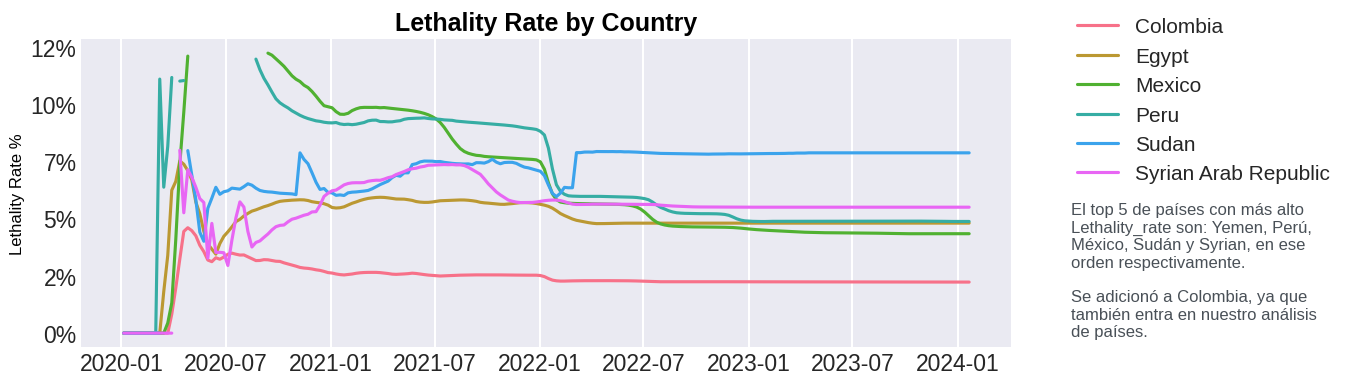

In [ ]:
## Graficando como va modificandose el Lethality_rate en los paises seleccionados a lo largo del tiempo

from matplotlib.ticker import FuncFormatter

# Colores
colors = {
    'Mexico': '#6c757d',
    'Peru': '#fca311',
    'Sudan': '#00b4d8',
    'Syrian': '#00b4d8',
    'United States': '#9a031e'
}

# Tipos de linea
line_styles = {
    'Mexico': '--',
    'Peru': ':',
    'Sudan': ':',
    'Syrian': ':',
    'United States': 'solid'
}

# Tamaños de linea
line_widths = {
    'Mexico': 2.5,
    'Peru': 2.2,
    'Sudan': 1,
    'Syrian': 1,
    'United States': 2.5
}


plt.figure(figsize=(12,4))
x= df_pivot['Date_reported']
y= df_pivot.drop(columns='Date_reported')
plt.plot(x,y)

# Añadir formateo al eje Y con %
def percentage_formatter(x,_):
    return f'{int(x)}%'

plt.title('Lethality Rate by Country', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Lethality Rate %', fontdict={'fontsize': 12, 'color': 'black'})

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Añadir texto de conclusión
conclusion_text = '''
El top 5 de países con más alto
Lethality_rate son: Yemen, Perú,
México, Sudán y Syrian, en ese
orden respectivamente.

Se adicionó a Colombia, ya que
también entra en nuestro análisis
de países.
'''

plt.figtext(0.95, 0.3, conclusion_text, fontsize=12, color='#495057', va='center', ha='left')
plt.grid(axis='x')
# plt.legend(y.columns, fontsize='small')
plt.legend(y.columns, fontsize='small',loc='center left', bbox_to_anchor=(1.05, 0.8))
plt.show()


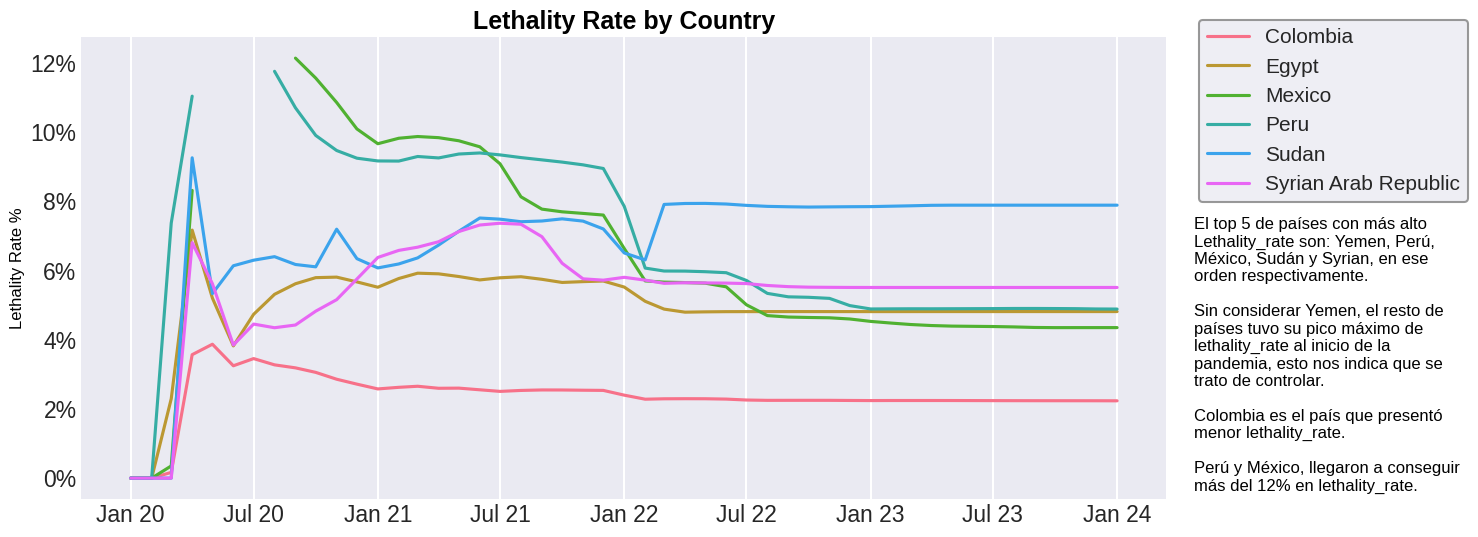

In [ ]:
## Graficando como va modificandose el Lethality_rate en los paises seleccionados a lo largo del tiempo
## Considerando un análisis mensual promedio de los lethality_rate por país

from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.figure(figsize=(14,6))
x= df_pivot_grouped['Date_reported']
y= df_pivot_grouped.drop(columns='Date_reported')
plt.plot(x,y)

# Añadir formateo al eje Y con %
def percentage_formatter(x,_):
    return f'{int(x)}%'

plt.title('Lethality Rate by Country', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Lethality Rate %', fontdict={'fontsize': 12, 'color': 'black'})

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

# Añadir texto de conclusión
conclusion_text = '''
El top 5 de países con más alto
Lethality_rate son: Yemen, Perú,
México, Sudán y Syrian, en ese
orden respectivamente.

Sin considerar Yemen, el resto de
países tuvo su pico máximo de
lethality_rate al inicio de la
pandemia, esto nos indica que se
trato de controlar.

Colombia es el país que presentó
menor lethality_rate.

Perú y México, llegaron a conseguir
más del 12% en lethality_rate.
'''

plt.figtext(0.92, 0.35, conclusion_text, fontsize=12, color='black', va='center', ha='left')
plt.grid(axis='x')
# plt.legend(y.columns, fontsize='small')
plt.legend(y.columns, fontsize='small',loc='center left', bbox_to_anchor=(1.02, 0.84), frameon=True, edgecolor='gray')
plt.show()

# **Pregunta 4**

### **Desde una perspectiva demográfica, ¿cuáles son las características que tuvieron un mayor impacto en el índice de letalidad en México-Perú-Colombia?**

In [ ]:
## Verificamos nuestro dataframe del covid con el cual trabajaremos para esta pregunta
df_covid_limpio.sample(2)

Date_reported Country_code   Country  New_cases  Cumulative_cases  \
30042    2022-04-10           MM   Myanmar        466            612341   
12060    2020-09-13           DJ  Djibouti          7              5394   

       New_deaths  Cumulative_deaths  lethality_rate  
30042           1              19434        3.173722  
12060           1                 61        1.130886

In [ ]:
## Verificamos nuestro dataframe de population con el cual trabajaremos para esta pregunta
df_population_limpio

Country_code  Total_Population  Male_Population Female_Population  \
0             BI        11874838.0        5894278.0         5980560.0   
1             KM          790986.0         397126.0          393860.0   
2             DJ         1073994.0         533626.0          540367.0   
3             ER         3498818.0        1724860.0         1773958.0   
4             ET       114120594.0       57375433.0        56745161.0   
..           ...               ...              ...               ...   
231           WS          211905.0         108147.0          103759.0   
232           TK            1752.0            879.0             874.0   
233           TO          104951.0          51994.0           52956.0   
234           TV           10956.0           5654.0            5301.0   
235           WF           11714.0           5648.0            6066.0   

     Population_Density  Life_Expectancy  
0               457.605           62.351  
1               425.033           64.068  
2                46.333           63.085  
3                28.881           67.300  
4               114.121           65.838  
..                  ...              ...  
231              74.878           72.157  
232             146.000           75.076  
233             161.462           70.871  
234             365.200           64.278  
235              83.671           79.617  

[236 rows x 6 columns]



1. Observamos que ambos dataframe comparten una columna en común, esta columna es el 'Country_code'.
2. Esta columna en común nos ayudará a realizar un análisis en conjunto, realizaremos un inner joint.





FILTRANDO DATAFRAME COVID19

Al analizar nuestros datos, observamos que las variables escogidas de nuestro dataframe Population, tienen un corte al 31/07/2020. En consecuencia, decidimos filtrar hasta esa fecha, con la finalidad de tener datos más congruentes.



In [ ]:
df_filtrado = df_covid_limpio[df_covid_limpio['Date_reported'] <= '2020-07-31']
df_filtrado = df_covid_limpio.groupby(['Country_code','Country']).mean().reset_index()[['Country_code','Country','lethality_rate']]
df_filtrado

<ipython-input-97-3b25a6b99fd9>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Country_code               Country  lethality_rate
0             AD               Andorra        1.158064
1             AE  United Arab Emirates        0.301439
2             AF           Afghanistan        3.666923
3             AG   Antigua and Barbuda        2.438047
4             AI              Anguilla        0.170310
..           ...                   ...             ...
228           YE                 Yemen        0.000000
229           YT               Mayotte        0.660873
230           ZA          South Africa        2.528656
231           ZM                Zambia        1.499067
232           ZW              Zimbabwe        2.566240

[233 rows x 3 columns]

**REALIZANDO EL MERGE ENTRE LOS DOS DATAFRAMES**

In [ ]:
df_final = pd.merge(df_filtrado, df_population_limpio, on='Country_code', how='inner')
df_final

Country_code               Country  lethality_rate  Total_Population  \
0             AD               Andorra        1.158064           76343.0   
1             AE  United Arab Emirates        0.301439         9211657.0   
2             AF           Afghanistan        3.666923        37769499.0   
3             AG   Antigua and Barbuda        2.438047           92117.0   
4             AI              Anguilla        0.170310           15380.0   
..           ...                   ...             ...               ...   
227           YE                 Yemen        0.000000        31546691.0   
228           YT               Mayotte        0.660873          294489.0   
229           ZA          South Africa        2.528656        58087055.0   
230           ZM                Zambia        1.499067        18380477.0   
231           ZW              Zimbabwe        2.566240        15354608.0   

     Male_Population Female_Population  Population_Density  Life_Expectancy  
0            38842.0           37502.0             162.432           83.004  
1          6443813.0         2767844.0             129.698           79.726  
2         19090409.0        18679089.0              58.170           63.565  
3            43961.0           48156.0             209.356           78.691  
4             7551.0            7828.0             174.767           76.882  
..               ...               ...                 ...              ...  
227       15953578.0        15593113.0              59.751           65.092  
228         139735.0          154754.0             785.304           77.153  
229       28207948.0        29879107.0              47.581           66.175  
230        9066397.0         9314079.0              24.725           62.793  
231        7231989.0         8122618.0              39.691           61.292  

[232 rows x 8 columns]

In [ ]:
## Validando presencia de nulos en el nuevo dataframe
df_final.isnull().sum()

Country_code          0
Country               0
lethality_rate        0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [ ]:
## Validando los tipos de datos que se tiene en el nuevo dataframe
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 231
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        232 non-null    object 
 1   Country             232 non-null    object 
 2   lethality_rate      232 non-null    float64
 3   Total_Population    232 non-null    float64
 4   Male_Population     232 non-null    float64
 5   Female_Population   232 non-null    object 
 6   Population_Density  232 non-null    float64
 7   Life_Expectancy     232 non-null    float64
dtypes: float64(5), object(3)
memory usage: 16.3+ KB


**IMPORTANCIA DE CARACTERÍSTICAS DEMOGRÁFICAS**

In [ ]:
selected_columns = ['lethality_rate', 'Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
df_final = df_final[selected_columns]
df_final

lethality_rate  Total_Population  Male_Population Female_Population  \
0          1.158064           76343.0          38842.0           37502.0   
1          0.301439         9211657.0        6443813.0         2767844.0   
2          3.666923        37769499.0       19090409.0        18679089.0   
3          2.438047           92117.0          43961.0           48156.0   
4          0.170310           15380.0           7551.0            7828.0   
..              ...               ...              ...               ...   
227        0.000000        31546691.0       15953578.0        15593113.0   
228        0.660873          294489.0         139735.0          154754.0   
229        2.528656        58087055.0       28207948.0        29879107.0   
230        1.499067        18380477.0        9066397.0         9314079.0   
231        2.566240        15354608.0        7231989.0         8122618.0   

     Population_Density  Life_Expectancy  
0               162.432           83.004  
1               129.698           79.726  
2                58.170           63.565  
3               209.356           78.691  
4               174.767           76.882  
..                  ...              ...  
227              59.751           65.092  
228             785.304           77.153  
229              47.581           66.175  
230              24.725           62.793  
231              39.691           61.292  

[232 rows x 6 columns]

In [ ]:
df_final.dtypes

lethality_rate        float64
Total_Population      float64
Male_Population       float64
Female_Population      object
Population_Density    float64
Life_Expectancy       float64
dtype: object

In [ ]:
problematic_cells = df_final[df_final['Female_Population'].apply(lambda x: not isinstance(x, (int, float)))]['Female_Population']
print(problematic_cells)


217    .................................................
Name: Female_Population, dtype: object


In [ ]:

# Supongamos que tienes una columna 'nombre_columna' en tu DataFrame df_final
df_final['Female_Population'] = pd.to_numeric(df_final['Female_Population'], errors='coerce').fillna(0)


<ipython-input-104-3bd7cd2d17e5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Reemplazar valores nulos por 0 en la columna 'nombre_columna'
columna_a_corregir = 'Female_Population'
df_final[columna_a_corregir] = df_final[columna_a_corregir].fillna(0)


<ipython-input-105-e031ac933888>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
## Utilizando random forest para conseguir la importancia de nuestras variables
from sklearn.ensemble import RandomForestRegressor
X = df_final.drop(columns = 'lethality_rate')
y = df_final['lethality_rate']
model = RandomForestRegressor(random_state=1)
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).reset_index()
feature_importances.columns = ['Variable', '%']
feature_importances.style.background_gradient()

Observamos que las características más importantes y que afectan directamente a la variable 'lethality_rate', son en primer lugar la 'Population_Density', seguido de la Female_Population 'Life_Expectancy'

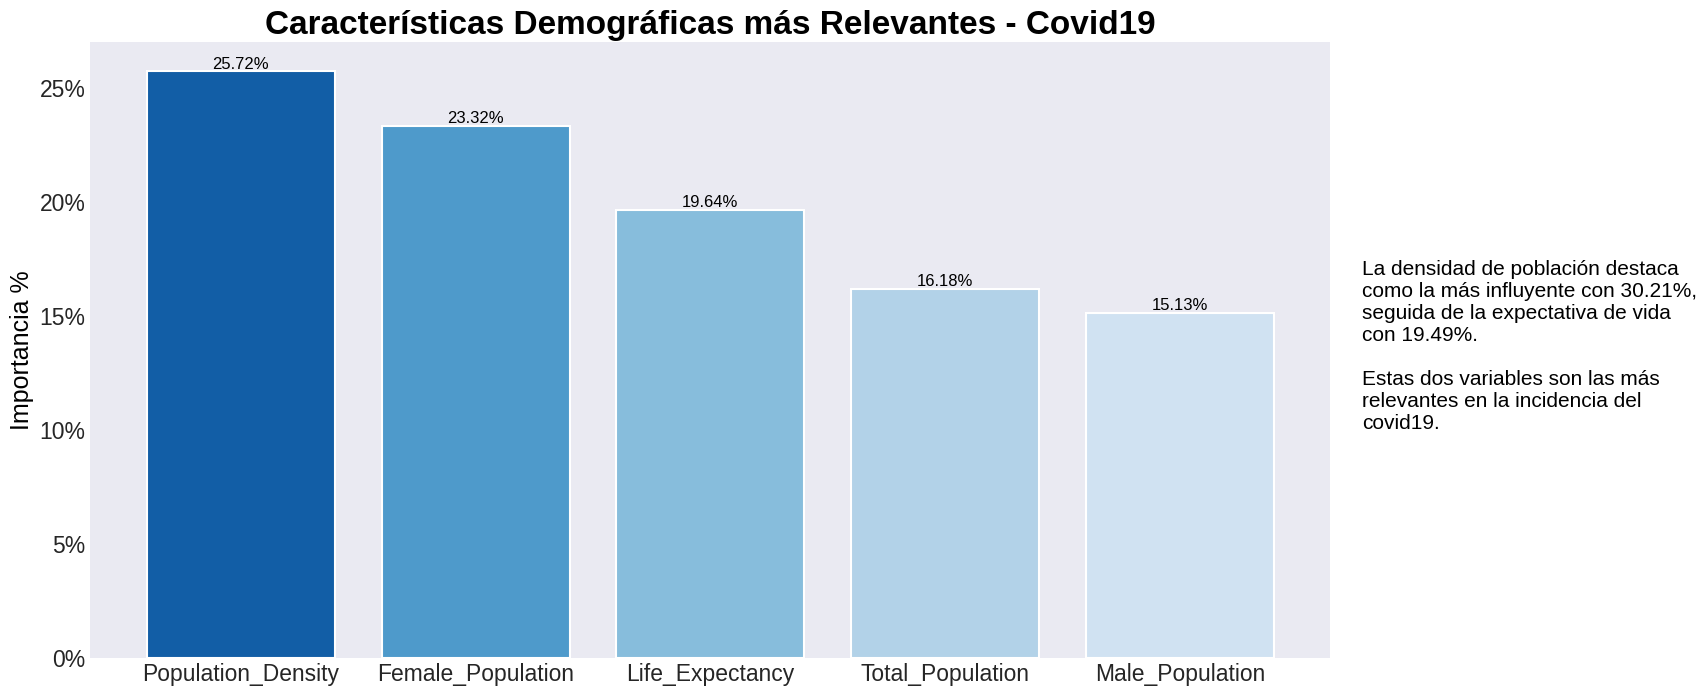

In [ ]:
from matplotlib.ticker import FuncFormatter

# Datos de importancia y colores
data = [210, 150, 110, 80, 50]
colors = plt.cm.Blues(data)

# Crear el gráfico de barras
plt.figure(figsize=(16, 8))
bars = plt.bar(feature_importances['Variable'], feature_importances['%'], color=colors)

# Añadir formateo al eje Y con %
def percentage_formatter(x, _):
    return f'{round(x*100)}%'

# Añadir porcentajes a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom', fontsize=12, color='black')

# Configuración del diseño del gráfico
plt.title('Características Demográficas más Relevantes - Covid19', fontdict={'fontsize': 24, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Importancia %', fontdict={'fontsize': 18, 'color': 'black'})

# Añadir texto de conclusión
conclusion_text = '''
La densidad de población destaca
como la más influyente con 30.21%,
seguida de la expectativa de vida
con 19.49%.

Estas dos variables son las más
relevantes en la incidencia del
covid19.
'''

plt.figtext(0.92, 0.5, conclusion_text, fontsize=15, color='black', va='center', ha='left')

# Formateo del eje Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Eliminar las líneas de


# **Pregunta 5**

### **¿Relación entre el aumento de los nuevos casos diarios y los nuevos decesos diarios para los países México-Perú-Colombia?**

In [ ]:
## Verificando el dataframe que analizaremos para responder esta pregunta
df_covid_limpio.head()

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0    2020-01-05           AF  Afghanistan          0                 0   
1    2020-01-12           AF  Afghanistan          0                 0   
2    2020-01-19           AF  Afghanistan          0                 0   
3    2020-01-26           AF  Afghanistan          0                 0   
4    2020-02-02           AF  Afghanistan          0                 0   

   New_deaths  Cumulative_deaths  lethality_rate  
0           0                  0             0.0  
1           0                  0             0.0  
2           0                  0             0.0  
3           0                  0             0.0  
4           0                  0             0.0

In [ ]:
## Creando un dataframe donde coloquemos solo ciertas variables
df_new = df_covid_limpio[['Date_reported','Country','Cumulative_cases','Cumulative_deaths']]
df_new

Date_reported      Country  Cumulative_cases  Cumulative_deaths
0        2020-01-05  Afghanistan                 0                  0
1        2020-01-12  Afghanistan                 0                  0
2        2020-01-19  Afghanistan                 0                  0
3        2020-01-26  Afghanistan                 0                  0
4        2020-02-02  Afghanistan                 0                  0
...             ...          ...               ...                ...
48897    2023-12-24     Zimbabwe            266048               5731
48898    2023-12-31     Zimbabwe            266071               5731
48899    2024-01-07     Zimbabwe            266117               5734
48900    2024-01-14     Zimbabwe            266202               5737
48901    2024-01-21     Zimbabwe            266257               5737

[48902 rows x 4 columns]

In [ ]:
## Seleccionamos solo información para los países latinoamericanos que venimos analizando México-Perú-Colombia
df_new_mod = df_new[(df_new['Country']=='Mexico')|(df_new['Country']=='Peru')|(df_new['Country']=='Colombia') ]
df_new_mod

Date_reported   Country  Cumulative_cases  Cumulative_deaths
9063     2020-01-05  Colombia                 0                  0
9064     2020-01-12  Colombia                 0                  0
9065     2020-01-19  Colombia                 0                  0
9066     2020-01-26  Colombia                 0                  0
9067     2020-02-02  Colombia                 0                  0
...             ...       ...               ...                ...
34326    2023-12-24      Peru           4536698             221583
34327    2023-12-31      Peru           4536733             221583
34328    2024-01-07      Peru           4536733             221583
34329    2024-01-14      Peru           4536733             221583
34330    2024-01-21      Peru           4536733             221583

[599 rows x 4 columns]

In [ ]:
## Utilizamos la función pivot a fin de acomodar nuestro dataframe, los paises en columnas y los casos acumulativos en cada fila
df_new_pivot_cases = df_new_mod.pivot(index='Date_reported', columns='Country', values='Cumulative_cases').reset_index()
df_new_pivot_cases

Country Date_reported   Colombia     Mexico       Peru
0          2020-01-05        0.0        0.0        0.0
1          2020-01-12        0.0        0.0        0.0
2          2020-01-19        0.0        0.0        0.0
3          2020-01-26        0.0        0.0        0.0
4          2020-02-02        0.0        0.0        0.0
..                ...        ...        ...        ...
207        2023-12-24  6385539.0  7702802.0  4536698.0
208        2023-12-31  6386231.0  7702809.0  4536733.0
209        2024-01-07  6387209.0  7702809.0  4536733.0
210        2024-01-14  6389365.0  7702809.0  4536733.0
211        2024-01-21  6391672.0  7702809.0  4536733.0

[212 rows x 4 columns]

In [ ]:
## Se genera nuevas columnas que representan los casos diarios para los 3 países
df_new_pivot_cases = df_new_pivot_cases.copy()
df_new_pivot_cases['daily_cases_colombia'] = df_new_pivot_cases['Colombia'].diff().fillna(0)
df_new_pivot_cases['daily_cases_mexico'] = df_new_pivot_cases['Mexico'].diff().fillna(0)
df_new_pivot_cases['daily_cases_peru'] = df_new_pivot_cases['Peru'].diff().fillna(0)
df_new_pivot_cases

Country Date_reported   Colombia     Mexico       Peru  daily_cases_colombia  \
0          2020-01-05        0.0        0.0        0.0                   0.0   
1          2020-01-12        0.0        0.0        0.0                   0.0   
2          2020-01-19        0.0        0.0        0.0                   0.0   
3          2020-01-26        0.0        0.0        0.0                   0.0   
4          2020-02-02        0.0        0.0        0.0                   0.0   
..                ...        ...        ...        ...                   ...   
207        2023-12-24  6385539.0  7702802.0  4536698.0                 560.0   
208        2023-12-31  6386231.0  7702809.0  4536733.0                 692.0   
209        2024-01-07  6387209.0  7702809.0  4536733.0                 978.0   
210        2024-01-14  6389365.0  7702809.0  4536733.0                2156.0   
211        2024-01-21  6391672.0  7702809.0  4536733.0                2307.0   

Country  daily_cases_mexico  daily_cases_peru  
0                       0.0               0.0  
1                       0.0               0.0  
2                       0.0               0.0  
3                       0.0               0.0  
4                       0.0               0.0  
..                      ...               ...  
207                    64.0            1333.0  
208                     7.0              35.0  
209                     0.0               0.0  
210                     0.0               0.0  
211                     0.0               0.0  

[212 rows x 7 columns]

In [ ]:
## Utilizamos la función pivot a fin de acomodar nuestro dataframe, los paises en columnas y los decesos acumulativos en cada fila
df_new_pivot_deaths = df_new_mod.pivot(index='Date_reported', columns='Country', values='Cumulative_deaths').reset_index()
df_new_pivot_deaths

Country Date_reported  Colombia    Mexico      Peru
0          2020-01-05       0.0       0.0       0.0
1          2020-01-12       0.0       0.0       0.0
2          2020-01-19       0.0       0.0       0.0
3          2020-01-26       0.0       0.0       0.0
4          2020-02-02       0.0       0.0       0.0
..                ...       ...       ...       ...
207        2023-12-24  142727.0  334955.0  221583.0
208        2023-12-31  142727.0  334958.0  221583.0
209        2024-01-07  142727.0  334958.0  221583.0
210        2024-01-14  142727.0  334958.0  221583.0
211        2024-01-21  142727.0  334958.0  221583.0

[212 rows x 4 columns]

In [ ]:
## Se genera nuevas columnas que representan los decesos diarios para los 3 países
df_new_pivot_deaths = df_new_pivot_deaths.copy()
df_new_pivot_deaths['daily_deaths_colombia'] = df_new_pivot_deaths['Colombia'].diff().fillna(0)
df_new_pivot_deaths['daily_deaths_mexico'] = df_new_pivot_deaths['Mexico'].diff().fillna(0)
df_new_pivot_deaths['daily_deaths_peru'] = df_new_pivot_deaths['Peru'].diff().fillna(0)
df_new_pivot_deaths

Country Date_reported  Colombia    Mexico      Peru  daily_deaths_colombia  \
0          2020-01-05       0.0       0.0       0.0                    0.0   
1          2020-01-12       0.0       0.0       0.0                    0.0   
2          2020-01-19       0.0       0.0       0.0                    0.0   
3          2020-01-26       0.0       0.0       0.0                    0.0   
4          2020-02-02       0.0       0.0       0.0                    0.0   
..                ...       ...       ...       ...                    ...   
207        2023-12-24  142727.0  334955.0  221583.0                    0.0   
208        2023-12-31  142727.0  334958.0  221583.0                    0.0   
209        2024-01-07  142727.0  334958.0  221583.0                    0.0   
210        2024-01-14  142727.0  334958.0  221583.0                    0.0   
211        2024-01-21  142727.0  334958.0  221583.0                    0.0   

Country  daily_deaths_mexico  daily_deaths_peru  
0                        0.0                0.0  
1                        0.0                0.0  
2                        0.0                0.0  
3                        0.0                0.0  
4                        0.0                0.0  
..                       ...                ...  
207                      6.0                8.0  
208                      3.0                0.0  
209                      0.0                0.0  
210                      0.0                0.0  
211                      0.0                0.0  

[212 rows x 7 columns]

**COLOMBIA - RELACIÓN NUEVOS CASOS Y DECESOS DIARIOS**

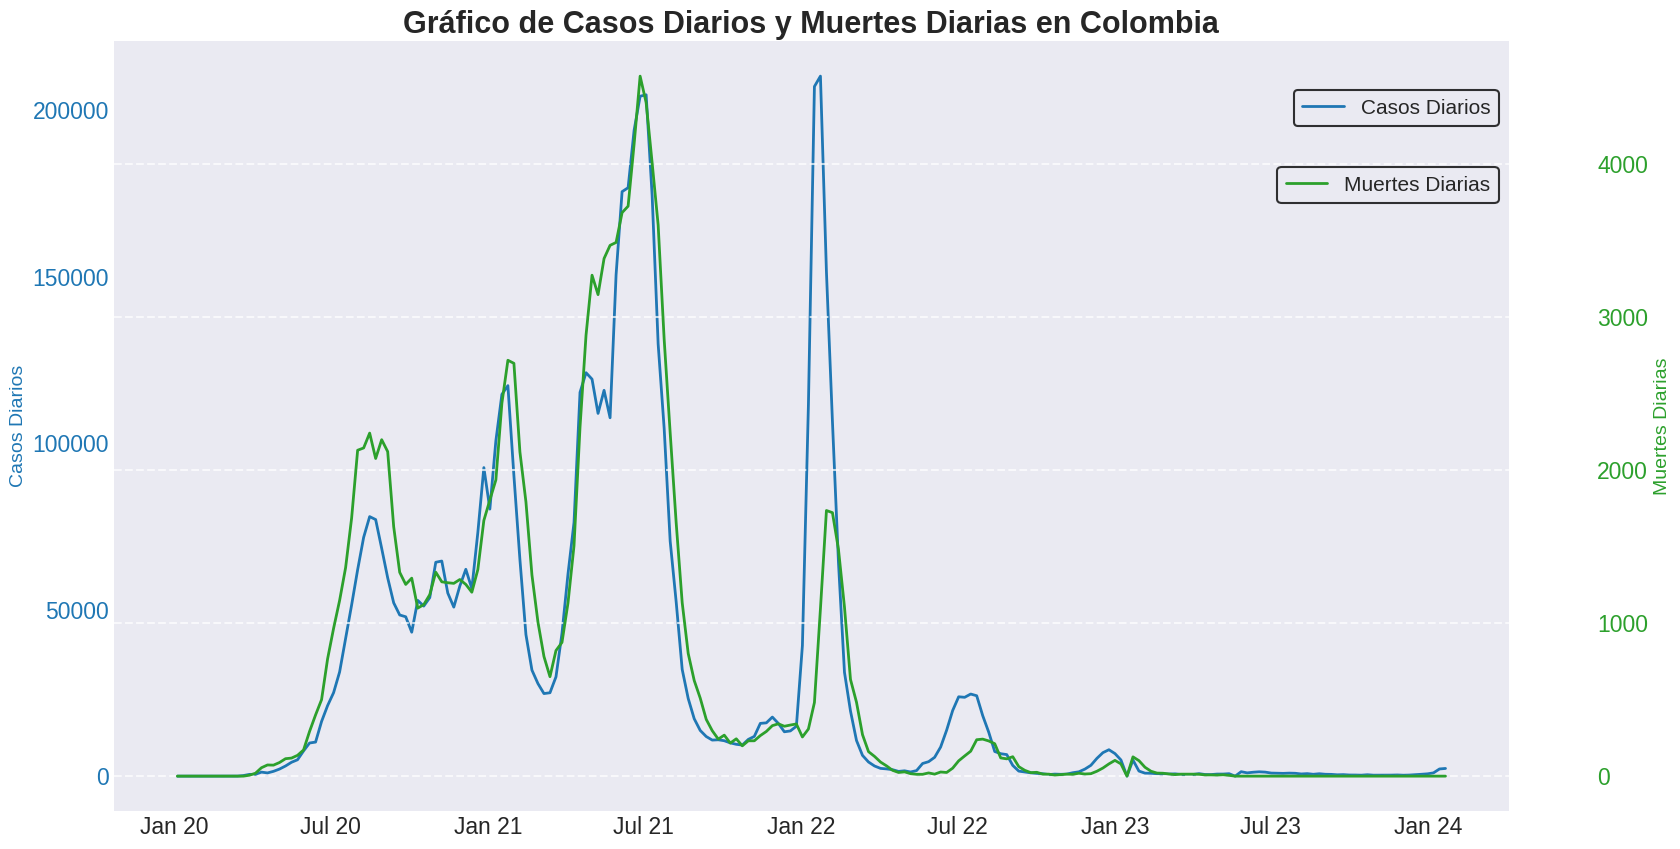

In [ ]:
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter

# Supongamos que tienes un DataFrame llamado df_colombia_mod

fig, ax2 = plt.subplots(figsize=(18, 10))

# Crear un eje secundario para 'Daily_cases' en el eje derecho
color = 'tab:blue'
ax2.set_ylabel('Casos Diarios', color=color, fontsize=14)
ax2.plot(df_new_pivot_cases['Date_reported'], df_new_pivot_cases['daily_cases_colombia'], color=color, label='Casos Diarios', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Crear otro eje secundario para 'Daily_deaths' en el eje derecho
ax3 = ax2.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('Muertes Diarias', color=color, fontsize=14)
ax3.plot(df_new_pivot_deaths['Date_reported'], df_new_pivot_deaths['daily_deaths_colombia'], color=color, label='Muertes Diarias', linewidth=2)
ax3.tick_params(axis='y', labelcolor=color)

# Añadir leyendas con borde solo para 'Casos Diarios' y 'Muertes Diarias'
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines2, labels2, loc='upper right', fontsize=15, bbox_to_anchor=(1.0, 0.95), frameon=True, edgecolor='black')
ax3.legend(lines3, labels3, loc='upper right', fontsize=15, bbox_to_anchor=(1.0, 0.85), frameon=True, edgecolor='black')

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Gráfico de Casos Diarios y Muertes Diarias en Colombia', fontsize=22, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()



----



MÉXICO - RELACIÓN NUEVOS CASOS Y DECESOS DIARIOS
**bold text**

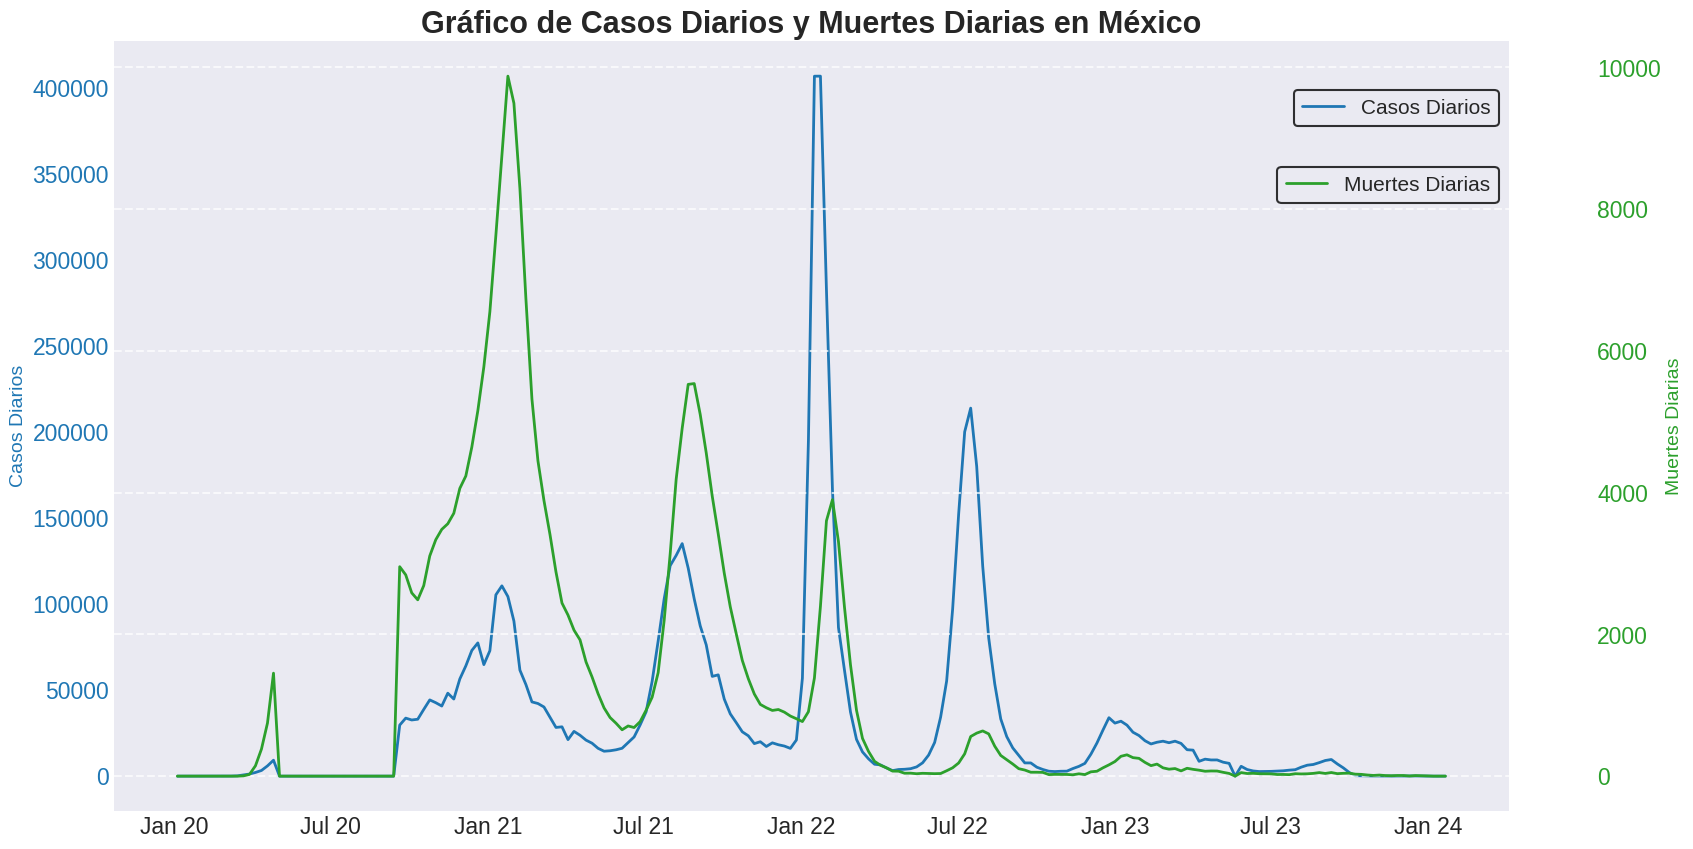

In [ ]:
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter

# Supongamos que tienes un DataFrame llamado df_colombia_mod

fig, ax2 = plt.subplots(figsize=(18, 10))

# Crear un eje secundario para 'Daily_cases' en el eje derecho
color = 'tab:blue'
ax2.set_ylabel('Casos Diarios', color=color, fontsize=14)
ax2.plot(df_new_pivot_cases['Date_reported'], df_new_pivot_cases['daily_cases_mexico'], color=color, label='Casos Diarios', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Crear otro eje secundario para 'Daily_deaths' en el eje derecho
ax3 = ax2.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('Muertes Diarias', color=color, fontsize=14)
ax3.plot(df_new_pivot_deaths['Date_reported'], df_new_pivot_deaths['daily_deaths_mexico'], color=color, label='Muertes Diarias', linewidth=2)
ax3.tick_params(axis='y', labelcolor=color)

# Añadir leyendas con borde solo para 'Casos Diarios' y 'Muertes Diarias'
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines2, labels2, loc='upper right', fontsize=15, bbox_to_anchor=(1.0, 0.95), frameon=True, edgecolor='black')
ax3.legend(lines3, labels3, loc='upper right', fontsize=15, bbox_to_anchor=(1.0, 0.85), frameon=True, edgecolor='black')

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Gráfico de Casos Diarios y Muertes Diarias en México', fontsize=22, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

----


**PERÚ - RELACIÓN NUEVOS CASOS Y DECESOS DIARIOS**

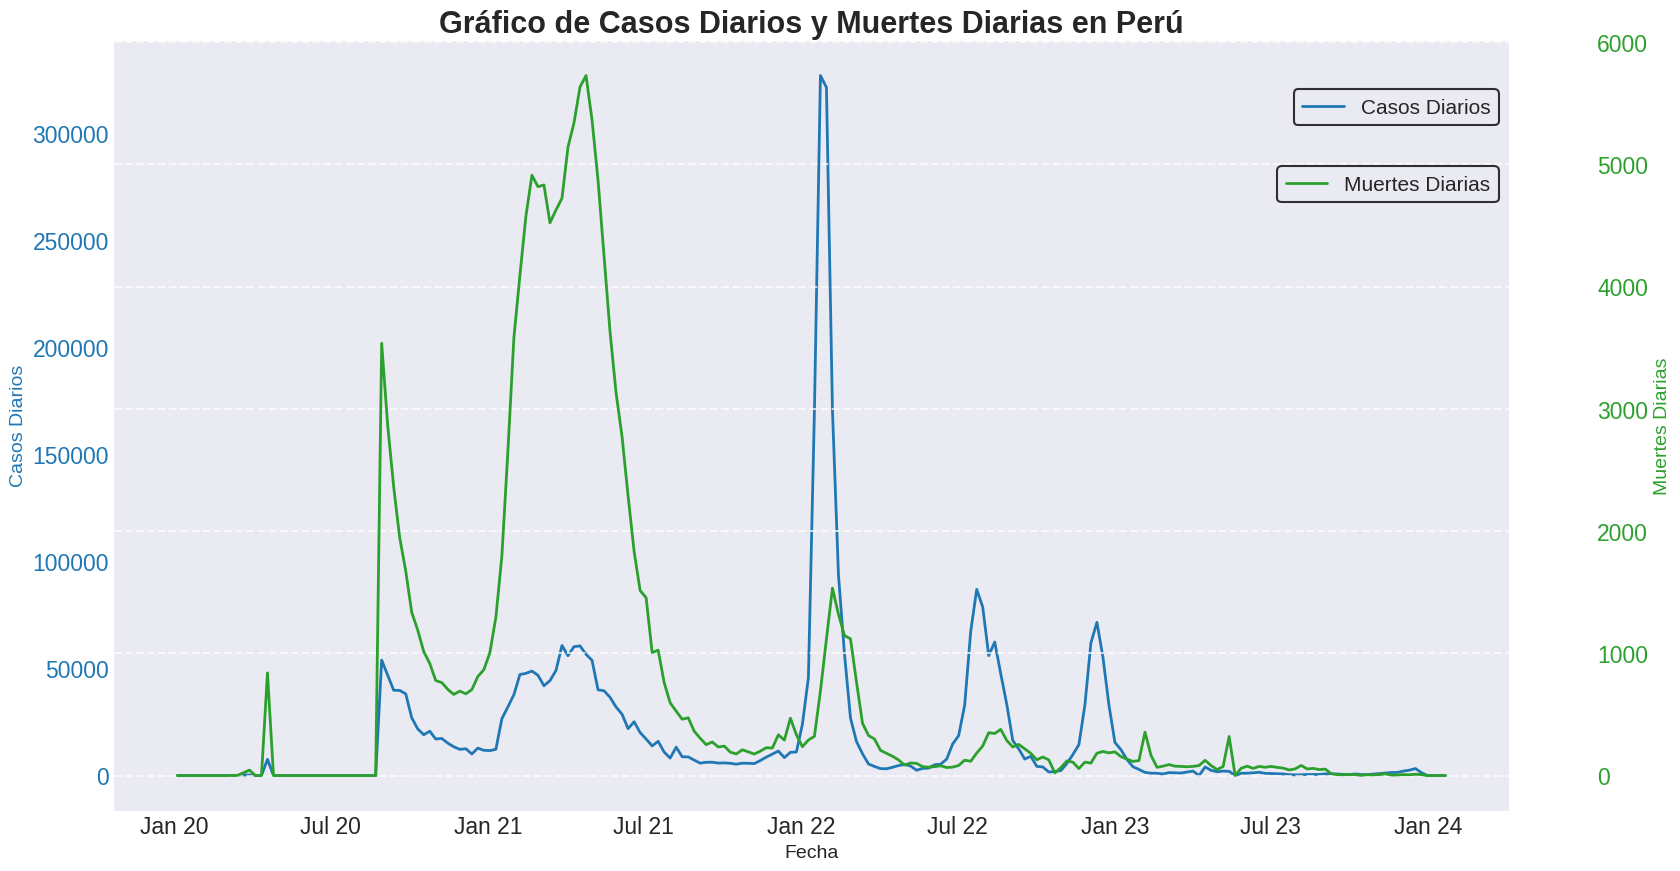

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter

# Supongamos que tienes un DataFrame llamado df_colombia_mod

fig, ax2 = plt.subplots(figsize=(18, 10))

# Crear un eje secundario para 'Daily_cases' en el eje derecho
color = 'tab:blue'
ax2.set_xlabel('Fecha', fontsize=14)
ax2.set_ylabel('Casos Diarios', color=color, fontsize=14)
ax2.plot(df_new_pivot_cases['Date_reported'], df_new_pivot_cases['daily_cases_peru'], color=color, label='Casos Diarios', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Crear otro eje secundario para 'Daily_deaths' en el eje derecho
ax3 = ax2.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('Muertes Diarias', color=color, fontsize=14)
ax3.plot(df_new_pivot_deaths['Date_reported'], df_new_pivot_deaths['daily_deaths_peru'], color=color, label='Muertes Diarias', linewidth=2)
ax3.tick_params(axis='y', labelcolor=color)

# Añadir leyendas con borde solo para 'Casos Diarios' y 'Muertes Diarias'
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines2, labels2, loc='upper right', fontsize=15, bbox_to_anchor=(1.0, 0.95), frameon=True, edgecolor='black')
ax3.legend(lines3, labels3, loc='upper right', fontsize=15, bbox_to_anchor=(1.0, 0.85), frameon=True, edgecolor='black')

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Gráfico de Casos Diarios y Muertes Diarias en Perú', fontsize=22, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

# **Pregunta 6**

### **¿Cuál ha sido la evolución de los nuevos decesos diarios reportados de Covid-19 en México-Perú-Colombia a lo largo del tiempo?**

In [ ]:
## Validamos nuestro dataframe que utilizaremos para analizar esta pregunta
df_covid_limpio

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-01-05           AF  Afghanistan          0                 0   
1        2020-01-12           AF  Afghanistan          0                 0   
2        2020-01-19           AF  Afghanistan          0                 0   
3        2020-01-26           AF  Afghanistan          0                 0   
4        2020-02-02           AF  Afghanistan          0                 0   
...             ...          ...          ...        ...               ...   
48897    2023-12-24           ZW     Zimbabwe         23            266048   
48898    2023-12-31           ZW     Zimbabwe         23            266071   
48899    2024-01-07           ZW     Zimbabwe         46            266117   
48900    2024-01-14           ZW     Zimbabwe         85            266202   
48901    2024-01-21           ZW     Zimbabwe         55            266257   

       New_deaths  Cumulative_deaths  lethality_rate  
0               0                  0        0.000000  
1               0                  0        0.000000  
2               0                  0        0.000000  
3               0                  0        0.000000  
4               0                  0        0.000000  
...           ...                ...             ...  
48897           1               5731        2.154123  
48898           0               5731        2.153936  
48899           3               5734        2.154691  
48900           3               5737        2.155130  
48901           0               5737        2.154685  

[48902 rows x 8 columns]

In [ ]:
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como se iba acumulando los decesos para todos los paises
df_grouped_deaths = df_covid_limpio.pivot(index='Date_reported', columns='Country', values='Cumulative_deaths').reset_index()
df_grouped_deaths

Country Date_reported  Afghanistan  Albania  Algeria  American Samoa  Andorra  \
0          2020-01-05          0.0      0.0      0.0             0.0      0.0   
1          2020-01-12          0.0      0.0      0.0             0.0      0.0   
2          2020-01-19          0.0      0.0      0.0             0.0      0.0   
3          2020-01-26          0.0      0.0      0.0             0.0      0.0   
4          2020-02-02          0.0      0.0      0.0             0.0      0.0   
..                ...          ...      ...      ...             ...      ...   
207        2023-12-24       7970.0   3604.0   6881.0            34.0    159.0   
208        2023-12-31       7973.0   3604.0   6881.0            34.0    159.0   
209        2024-01-07       7973.0   3604.0   6881.0            34.0    159.0   
210        2024-01-14       7975.0   3604.0   6881.0            34.0    159.0   
211        2024-01-21       7975.0   3605.0   6881.0            34.0    159.0   

Country  Angola  Anguilla  Antigua and Barbuda  Argentina  ...  Uruguay  \
0           0.0       0.0                  0.0        0.0  ...      0.0   
1           0.0       0.0                  0.0        0.0  ...      0.0   
2           0.0       0.0                  0.0        0.0  ...      0.0   
3           0.0       0.0                  0.0        0.0  ...      0.0   
4           0.0       0.0                  0.0        0.0  ...      0.0   
..          ...       ...                  ...        ...  ...      ...   
207      1937.0      12.0                146.0   130691.0  ...   7660.0   
208      1937.0      12.0                146.0   130695.0  ...   7660.0   
209      1937.0      12.0                146.0   130697.0  ...   7660.0   
210      1937.0      12.0                146.0   130699.0  ...   7660.0   
211      1937.0      12.0                146.0   130699.0  ...   7660.0   

Country  Uzbekistan  Vanuatu  Venezuela (Bolivarian Republic of)  Viet Nam  \
0               0.0      0.0                                 0.0       0.0   
1               0.0      0.0                                 0.0       0.0   
2               0.0      0.0                                 0.0       0.0   
3               0.0      0.0                                 0.0       0.0   
4               0.0      0.0                                 0.0       0.0   
..              ...      ...                                 ...       ...   
207          1016.0     14.0                              5856.0   43206.0   
208          1016.0     14.0                              5856.0   43206.0   
209          1016.0     14.0                              5856.0   43206.0   
210          1016.0     14.0                              5856.0   43206.0   
211          1016.0     14.0                              5856.0   43206.0   

Country  Wallis and Futuna  Yemen  Zambia  Zimbabwe  \
0                      0.0    0.0     0.0       0.0   
1                      0.0    0.0     0.0       0.0   
2                      0.0    0.0     0.0       0.0   
3                      0.0    0.0     0.0       0.0   
4                      0.0    0.0     0.0       0.0   
..                     ...    ...     ...       ...   
207                    8.0    NaN  4069.0    5731.0   
208                    8.0    NaN  4069.0    5731.0   
209                    8.0    NaN  4069.0    5734.0   
210                    8.0    NaN  4069.0    5737.0   
211                    8.0    NaN  4069.0    5737.0   

Country  occupied Palestinian territory, including east Jerusalem  
0                                                      0.0         
1                                                      0.0         
2                                                      0.0         
3                                                      0.0         
4                                                      0.0         
..                                                     ...         
207                                                 

In [ ]:
## Separamos solo los paises a evaluar: México-Perú-Colombia
df_grouped_to_evaluate = df_grouped_deaths[['Date_reported','Mexico','Peru','Colombia']]
df_grouped_to_evaluate

Country Date_reported    Mexico      Peru  Colombia
0          2020-01-05       0.0       0.0       0.0
1          2020-01-12       0.0       0.0       0.0
2          2020-01-19       0.0       0.0       0.0
3          2020-01-26       0.0       0.0       0.0
4          2020-02-02       0.0       0.0       0.0
..                ...       ...       ...       ...
207        2023-12-24  334955.0  221583.0  142727.0
208        2023-12-31  334958.0  221583.0  142727.0
209        2024-01-07  334958.0  221583.0  142727.0
210        2024-01-14  334958.0  221583.0  142727.0
211        2024-01-21  334958.0  221583.0  142727.0

[212 rows x 4 columns]

OBS: Debido a la presencia de datos negativos en la columna New_deaths, se evaluará los nuevos casos de los países con la resta de los acumulados, de esta manera evitamos cualquier contratiempo para datos futuros.

In [ ]:
## Crearemos nuevas columnas, que representan los decesos diarios para cada uno de los 3 países
df_grouped_to_evaluate = df_grouped_to_evaluate.copy()
df_grouped_to_evaluate['Mexico_daily_deaths'] = df_grouped_to_evaluate['Mexico'].diff().fillna(0)
df_grouped_to_evaluate['Peru_daily_deaths'] = df_grouped_to_evaluate['Peru'].diff().fillna(0)
df_grouped_to_evaluate['Colombia_daily_deaths'] = df_grouped_to_evaluate['Colombia'].diff().fillna(0)
df_grouped_to_evaluate

Country Date_reported    Mexico      Peru  Colombia  Mexico_daily_deaths  \
0          2020-01-05       0.0       0.0       0.0                  0.0   
1          2020-01-12       0.0       0.0       0.0                  0.0   
2          2020-01-19       0.0       0.0       0.0                  0.0   
3          2020-01-26       0.0       0.0       0.0                  0.0   
4          2020-02-02       0.0       0.0       0.0                  0.0   
..                ...       ...       ...       ...                  ...   
207        2023-12-24  334955.0  221583.0  142727.0                  6.0   
208        2023-12-31  334958.0  221583.0  142727.0                  3.0   
209        2024-01-07  334958.0  221583.0  142727.0                  0.0   
210        2024-01-14  334958.0  221583.0  142727.0                  0.0   
211        2024-01-21  334958.0  221583.0  142727.0                  0.0   

Country  Peru_daily_deaths  Colombia_daily_deaths  
0                      0.0                    0.0  
1                      0.0                    0.0  
2                      0.0                    0.0  
3                      0.0                    0.0  
4                      0.0                    0.0  
..                     ...                    ...  
207                    8.0                    0.0  
208                    0.0                    0.0  
209                    0.0                    0.0  
210                    0.0                    0.0  
211                    0.0                    0.0  

[212 rows x 7 columns]

In [ ]:
## Discriminamos los decesos diarios, solo para cuando tengamos valores mayores a cero
daily_deaths_peru = df_grouped_to_evaluate[['Date_reported','Peru_daily_deaths']]
daily_deaths_peru = daily_deaths_peru[daily_deaths_peru['Peru_daily_deaths']>0]
daily_deaths_peru

Country Date_reported  Peru_daily_deaths
9          2020-03-08                1.0
10         2020-03-15                2.0
11         2020-03-22               23.0
12         2020-03-29               45.0
15         2020-04-19              840.0
..                ...                ...
203        2023-11-26                5.0
204        2023-12-03                8.0
205        2023-12-10                7.0
206        2023-12-17               11.0
207        2023-12-24                8.0

[178 rows x 2 columns]

**VISUALIZACIÓN GRÁFICA DE DECESOS DIARIOS - PERÚ**

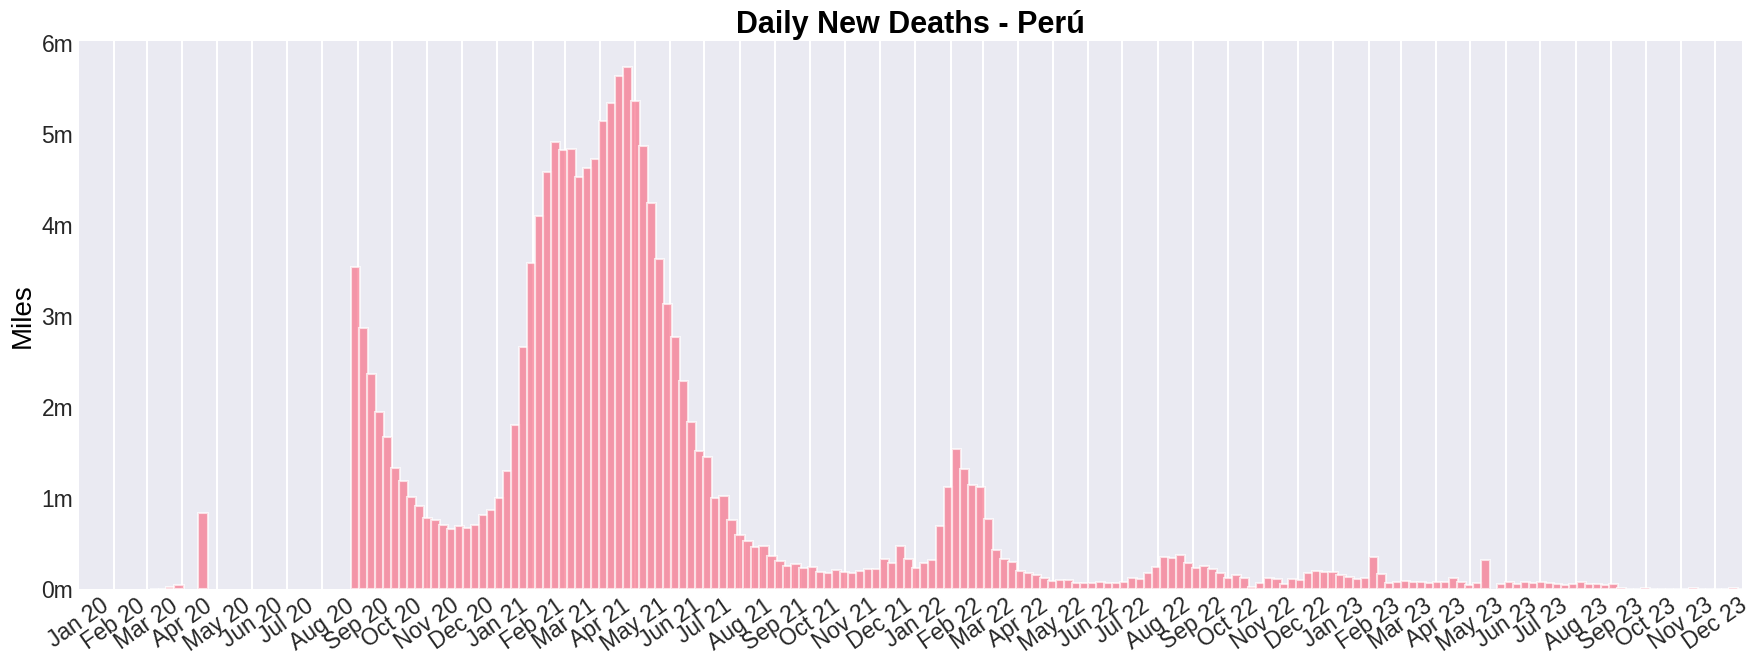

In [ ]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

plt.figure(figsize=(18,7))
plt.bar(daily_deaths_peru['Date_reported'],daily_deaths_peru['Peru_daily_deaths'],alpha=0.7, width=8)
plt.title('Daily New Deaths - Perú', fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Miles', fontdict={'fontsize': 20, 'color': 'black'})

# Ajustar el límite inferior del eje x a enero de 2020
start_date = pd.to_datetime('2020-01-01')
end_date = daily_deaths_peru['Date_reported'].max()

# Añadir formateo al eje Y con números enteros y "M" para millones
def miles_formatter(x, _):
    return f'{round(x/1e3)}m'

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().yaxis.set_major_formatter(FuncFormatter(miles_formatter))

plt.xlim(start_date, end_date) # Establecer los límites del eje x
plt.grid(axis='x')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()



In [ ]:
## Discriminamos los decesos diarios, solo para cuando tengamos valores mayores a cero
daily_deaths_mexico = df_grouped_to_evaluate[['Date_reported','Mexico_daily_deaths']]
daily_deaths_mexico = daily_deaths_mexico[daily_deaths_mexico['Mexico_daily_deaths']>0]
daily_deaths_mexico

Country Date_reported  Mexico_daily_deaths
11         2020-03-22                  4.0
12         2020-03-29                 24.0
13         2020-04-05                146.0
14         2020-04-12                382.0
15         2020-04-19                749.0
..                ...                  ...
204        2023-12-03                  9.0
205        2023-12-10                  2.0
206        2023-12-17                  8.0
207        2023-12-24                  6.0
208        2023-12-31                  3.0

[177 rows x 2 columns]

**VISUALIZACIÓN GRÁFICA DE DECESOS DIARIOS - MÉXICO**

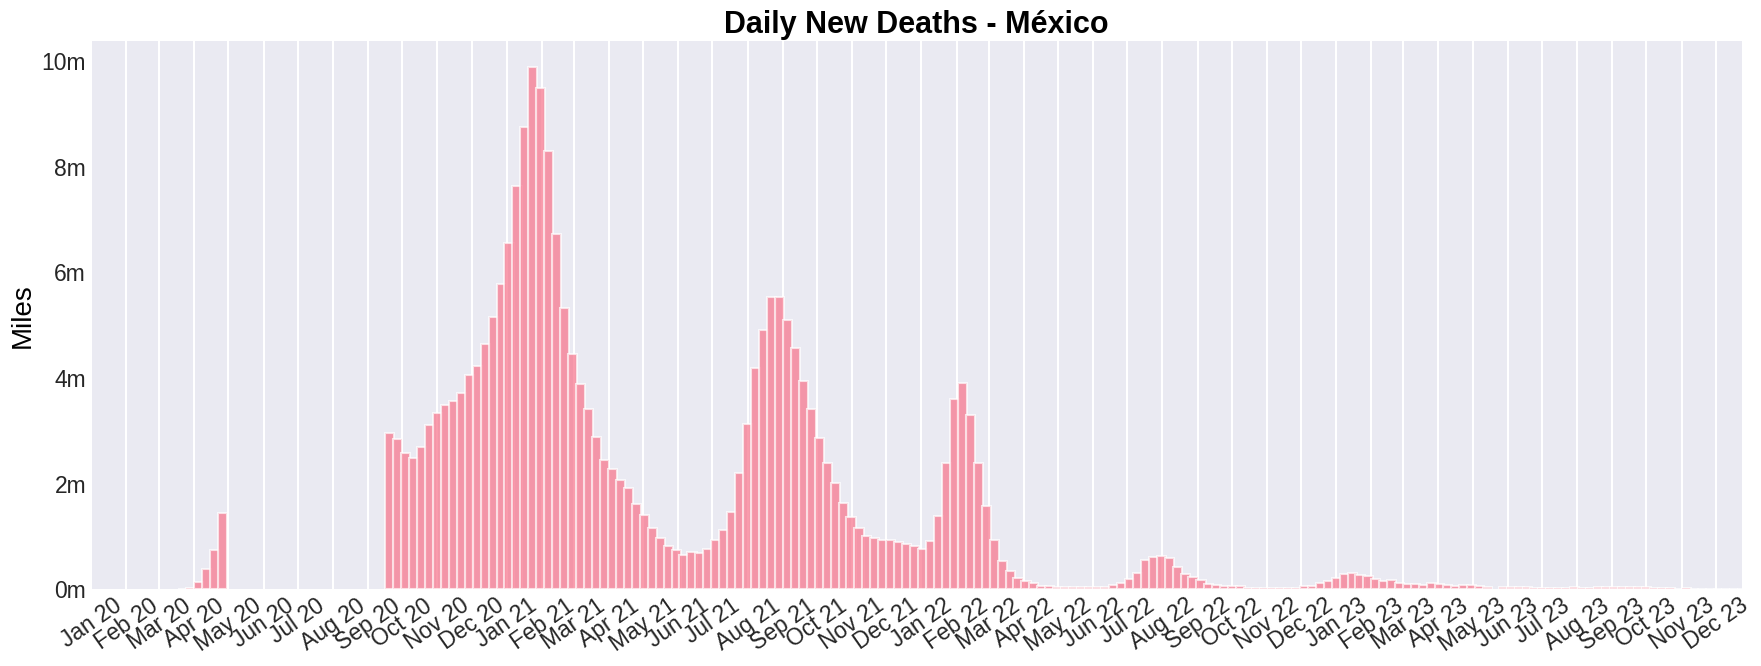

In [ ]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

plt.figure(figsize=(18,7))
plt.bar(daily_deaths_mexico['Date_reported'],daily_deaths_mexico['Mexico_daily_deaths'],alpha=0.7, width=8)
plt.title('Daily New Deaths - México', fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Miles', fontdict={'fontsize': 20, 'color': 'black'})

# Ajustar el límite inferior del eje x a enero de 2020
start_date = pd.to_datetime('2020-01-01')
end_date = daily_deaths_peru['Date_reported'].max()

# Añadir formateo al eje Y con números enteros y "M" para millones
def miles_formatter(x, _):
    return f'{round(x/1e3)}m'

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().yaxis.set_major_formatter(FuncFormatter(miles_formatter))

plt.xlim(start_date, end_date) # Establecer los límites del eje x
plt.grid(axis='x')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()


**3.6.3 Colombia - Análisis Nuevos Decesos**

In [ ]:
## Discriminamos los decesos diarios, solo para cuando tengamos valores mayores a cero
daily_deaths_colombia = df_grouped_to_evaluate[['Date_reported','Colombia_daily_deaths']]
daily_deaths_colombia = daily_deaths_colombia[daily_deaths_colombia['Colombia_daily_deaths']>0]
daily_deaths_colombia

Country Date_reported  Colombia_daily_deaths
12         2020-03-29                    6.0
13         2020-04-05                   19.0
14         2020-04-12                   55.0
15         2020-04-19                   73.0
16         2020-04-26                   72.0
..                ...                    ...
171        2023-04-16                    8.0
172        2023-04-23                    8.0
173        2023-04-30                    7.0
174        2023-05-07                    9.0
175        2023-05-14                    5.0

[163 rows x 2 columns]

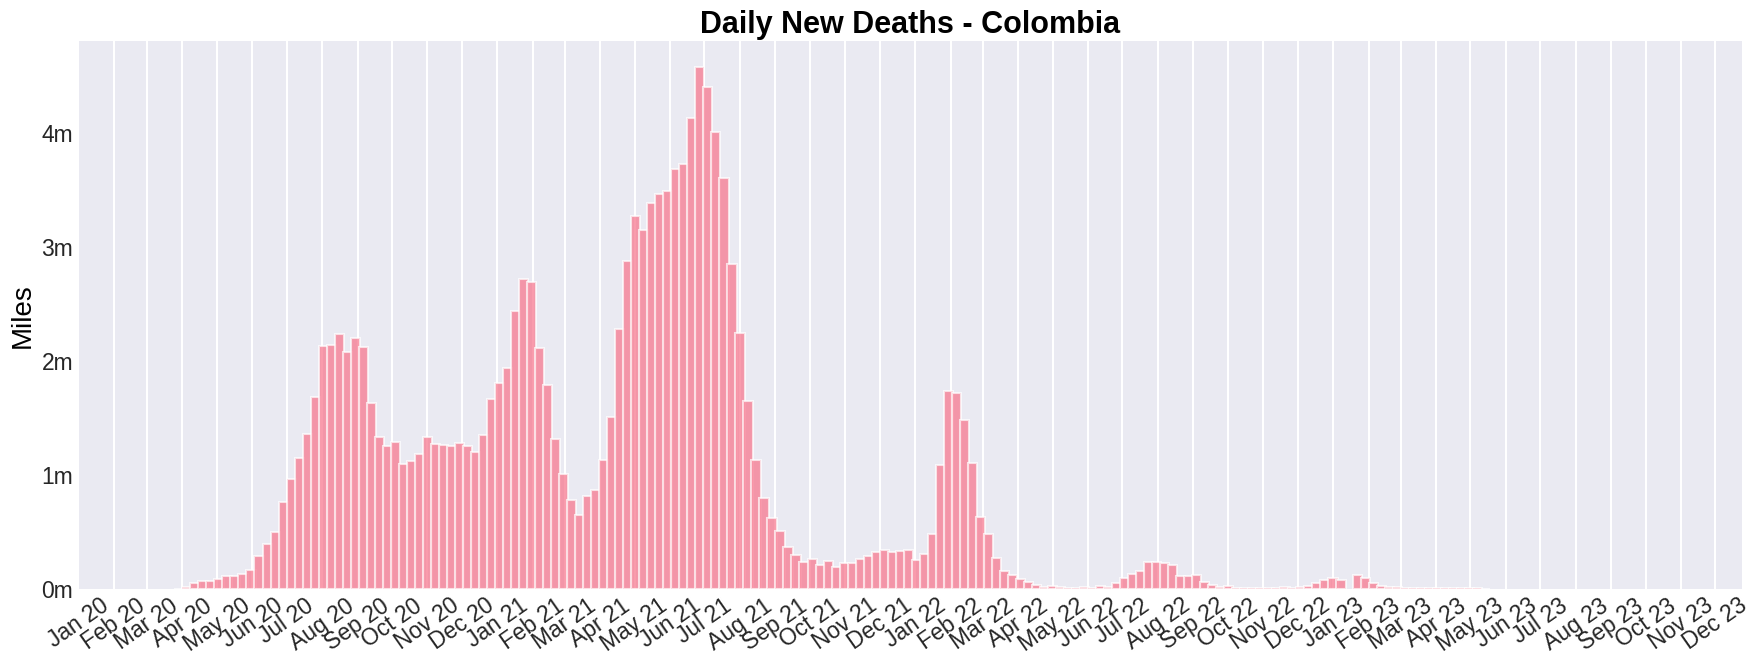

In [ ]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

plt.figure(figsize=(18,7))
plt.bar(daily_deaths_colombia['Date_reported'],daily_deaths_colombia['Colombia_daily_deaths'],alpha=0.7, width=8)
plt.title('Daily New Deaths - Colombia', fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Miles', fontdict={'fontsize': 20, 'color': 'black'})

# Ajustar el límite inferior del eje x a enero de 2020
start_date = pd.to_datetime('2020-01-01')
end_date = daily_deaths_peru['Date_reported'].max()

# Añadir formateo al eje Y con números enteros y "M" para millones
def miles_formatter(x, _):
    return f'{round(x/1e3)}m'

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().yaxis.set_major_formatter(FuncFormatter(miles_formatter))

plt.xlim(start_date, end_date) # Establecer los límites del eje x
plt.grid(axis='x')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

# **Pregunta 7**

### **¿Cómo evolucionan los casos acumulados en todos los países a nivel mundial - Gráfico Coroplético? **

In [ ]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

Trabajaremos con el dataset del medio, ya que se trata de los datos geoespaciales del mundo

In [ ]:
# Creamos la variable que se convertirá en nuestro Geodataframe
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mundo

<ipython-input-129-9d396b7b8023>:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [ ]:
# Podemos ver y modificar el sistema de coordenadas
mundo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Para modificar el sistema de coordenadas utilizaremos la función to_crs con el código EPGS correspondiente para la nueva proyección

In [ ]:
## Reproyectaremos en el sistema de proyección Mercator
world = mundo.to_crs('EPSG:3395')
world.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
df_covid_limpio

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-01-05           AF  Afghanistan          0                 0   
1        2020-01-12           AF  Afghanistan          0                 0   
2        2020-01-19           AF  Afghanistan          0                 0   
3        2020-01-26           AF  Afghanistan          0                 0   
4        2020-02-02           AF  Afghanistan          0                 0   
...             ...          ...          ...        ...               ...   
48897    2023-12-24           ZW     Zimbabwe         23            266048   
48898    2023-12-31           ZW     Zimbabwe         23            266071   
48899    2024-01-07           ZW     Zimbabwe         46            266117   
48900    2024-01-14           ZW     Zimbabwe         85            266202   
48901    2024-01-21           ZW     Zimbabwe         55            266257   

       New_deaths  Cumulative_deaths  lethality_rate  
0               0                  0        0.000000  
1               0                  0        0.000000  
2               0                  0        0.000000  
3               0                  0        0.000000  
4               0                  0        0.000000  
...           ...                ...             ...  
48897           1               5731        2.154123  
48898           0               5731        2.153936  
48899           3               5734        2.154691  
48900           3               5737        2.155130  
48901           0               5737        2.154685  

[48902 rows x 8 columns]

In [ ]:
## Agrupamos el dataframe por país y casos acumulados
df_new = df_covid_limpio[['Country_code','Cumulative_cases']]
df_new = df_new.groupby('Country_code').max().reset_index()
df_new

Country_code  Cumulative_cases
0             AD             48015
1             AE           1067030
2             AF            231063
3             AG              9106
4             AI              3904
..           ...               ...
228           YE                 1
229           YT             42027
230           ZA           4072636
231           ZM            349304
232           ZW            266257

[233 rows x 2 columns]

In [ ]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 40.2 MB/s eta 0:00:00


In [ ]:
## Convertimos codigos de países para poder realizar el merge
import pycountry

# Función para convertir códigos alpha-2 a alpha-3
def convert_alpha2_to_alpha3(alpha2):
    try:
        country = pycountry.countries.get(alpha_2=alpha2)
        return country.alpha_3
    except AttributeError:
        return None

# Aplicar la función a la columna 'iso_a3'
df_new['Country_code'] = df_new['Country_code'].apply(convert_alpha2_to_alpha3)
df_new = df_new.copy()
df_new.rename(columns={'Country_code': 'iso_a3'}, inplace=True)

df_new

iso_a3  Cumulative_cases
0      AND             48015
1      ARE           1067030
2      AFG            231063
3      ATG              9106
4      AIA              3904
..     ...               ...
228    YEM                 1
229    MYT             42027
230    ZAF           4072636
231    ZMB            349304
232    ZWE            266257

[233 rows x 2 columns]

In [ ]:
## Hacemos un merge para combinar dataframes
union = pd.merge(mundo, df_new, on='iso_a3', how='left')
union

pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  Cumulative_cases  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...           69047.0  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...           43223.0  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...               NaN  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...         4771226.0  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...       103436829.0  
..                                                 ...               ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...         2583470.0  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...          251280.0  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...               NaN  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...          191496.0  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...           18819.0  

[177 rows x 7 columns]

In [ ]:
union.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   pop_est           177 non-null    float64 
 1   continent         177 non-null    object  
 2   name              177 non-null    object  
 3   iso_a3            177 non-null    object  
 4   gdp_md_est        177 non-null    int64   
 5   geometry          177 non-null    geometry
 6   Cumulative_cases  169 non-null    float64 
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 11.1+ KB


In [ ]:
union.isnull().sum()

pop_est             0
continent           0
name                0
iso_a3              0
gdp_md_est          0
geometry            0
Cumulative_cases    8
dtype: int64

In [ ]:
union = union.dropna()
union.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 169 entries, 0 to 176
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   pop_est           169 non-null    float64 
 1   continent         169 non-null    object  
 2   name              169 non-null    object  
 3   iso_a3            169 non-null    object  
 4   gdp_md_est        169 non-null    int64   
 5   geometry          169 non-null    geometry
 6   Cumulative_cases  169 non-null    float64 
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 10.6+ KB


In [ ]:
union = union[['iso_a3','Cumulative_cases','geometry','pop_est','name']]
union

iso_a3  Cumulative_cases  \
0      FJI           69047.0   
1      TZA           43223.0   
3      CAN         4771226.0   
4      USA       103436829.0   
5      KAZ         1503205.0   
..     ...               ...   
171    MKD          350244.0   
172    SRB         2583470.0   
173    MNE          251280.0   
175    TTO          191496.0   
176    SSD           18819.0   

                                              geometry      pop_est  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...     889953.0   
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   58005463.0   
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   37589262.0   
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  328239523.0   
5    POLYGON ((87.35997 49.21498, 86.59878 48.54918...   18513930.0   
..                                                 ...          ...   
171  POLYGON ((22.38053 42.32026, 22.88137 41.99930...    2083459.0   
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...    6944975.0   
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...     622137.0   
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...    1394973.0   
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...   11062113.0   

                         name  
0                        Fiji  
1                    Tanzania  
3                      Canada  
4    United States of America  
5                  Kazakhstan  
..                        ...  
171           North Macedonia  
172                    Serbia  
173                Montenegro  
175       Trinidad and Tobago  
176                  S. Sudan  

[169 rows x 5 columns]

In [ ]:
import plotly.express as px

# Crear un DataFrame GeoPandas a partir de tu DataFrame existente
gdf = gpd.GeoDataFrame(union, geometry='geometry')

# Crear el gráfico interactivo con Plotly Express
fig = px.choropleth_mapbox(
    gdf,
    geojson=gdf.geometry.geometry.__geo_interface__,
    locations=gdf.index,
    color='Cumulative_cases',
    hover_name='name',
    mapbox_style="carto-positron",
    center={"lat": gdf.geometry.centroid.y.mean(), "lon": gdf.geometry.centroid.x.mean()},
    zoom=1.5,
)

# Configurar la presentación del gráfico
fig.update_layout(
    title='Casos acumulados por país',
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Mostrar el gráfico interactivo
fig.show()

<ipython-input-141-1d60a18ac6b7>:14: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




# **Pregunta 8**

**¿Cómo ha evolucionado el número de muertes por COVID-19 a lo largo del tiempo?**

In [ ]:
df_covid_limpio.sample(5)

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
44369    2022-08-14           TK      Tokelau          0                 0   
30988    2020-05-03           NZ  New Zealand         15              1136   
38563    2024-01-14           WS        Samoa          0             16962   
21540    2020-09-06           IL       Israel      15508            129054   
30542    2023-09-24           NP        Nepal          7           1003438   

       New_deaths  Cumulative_deaths  lethality_rate  
44369           0                  0        0.000000  
30988           2                 20        1.760563  
38563           0                 31        0.182761  
21540         108               1032        0.799665  
30542           0              12031        1.198978

In [ ]:
!pip install bar_chart_race

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
# Progresión de Casos por País

# Calculamos el total de muertes acumuladas por país y lo ordenamos de forma descendente
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_deaths'].max().sort_values(ascending=False)

# Seleccionamos los 20 países con mayor número de muertes acumuladas
top_20_paises = total_por_pais.nlargest(20)

# Reiniciamos el índice del DataFrame original para evitar problemas en futuras operaciones
df_covid_limpio_reset = df_covid_limpio.reset_index()

# Filtramos los datos para quedarnos solo con las filas correspondientes a los top 20 países
df_top_20 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_20_paises.index)]

# Creamos un DataFrame Pivot para visualizar la progresión temporal de las muertes acumuladas en los top 20 países
total_acumulado_top_20 = df_top_20.pivot(index='Date_reported', columns='Country', values='Cumulative_deaths').fillna(0)

# Mostramos el DataFrame resultante
total_acumulado_top_20


Country        Argentina    Brazil     China  Colombia    France   Germany  \
Date_reported                                                                
2020-01-05           0.0       0.0       0.0       0.0       0.0       0.0   
2020-01-12           0.0       0.0       1.0       0.0       0.0       0.0   
2020-01-19           0.0       0.0       3.0       0.0       0.0       0.0   
2020-01-26           0.0       0.0      56.0       0.0       0.0       0.0   
2020-02-02           0.0       0.0     361.0       0.0       0.0       0.0   
...                  ...       ...       ...       ...       ...       ...   
2023-12-24      130691.0  702116.0  121889.0  142727.0  167985.0  174979.0   
2023-12-31      130695.0  702116.0  121893.0  142727.0  167985.0  174979.0   
2024-01-07      130697.0  702116.0  121908.0  142727.0  167985.0  174979.0   
2024-01-14      130699.0  702116.0  121916.0  142727.0  167985.0  174979.0   
2024-01-21      130699.0  702116.0  121916.0  142727.0  167985.0  174979.0   

Country           India  Indonesia  Iran (Islamic Republic of)     Italy  \
Date_reported                                                              
2020-01-05          0.0        0.0                         0.0       0.0   
2020-01-12          0.0        0.0                         0.0       0.0   
2020-01-19          0.0        0.0                         0.0       0.0   
2020-01-26          0.0        0.0                         0.0       0.0   
2020-02-02          0.0        0.0                         0.0       0.0   
...                 ...        ...                         ...       ...   
2023-12-24     533333.0   161954.0                    146751.0  194950.0   
2023-12-31     533361.0   161972.0                    146757.0  195288.0   
2024-01-07     533392.0   161995.0                    146762.0  195584.0   
2024-01-14     533414.0   162015.0                    146767.0  195775.0   
2024-01-21     533434.0   162033.0                    146777.0  195805.0   

Country          Mexico      Peru    Poland  Russian Federation  South Africa  \
Date_reported                                                                   
2020-01-05          0.0       0.0       0.0                 0.0           0.0   
2020-01-12          0.0       0.0       0.0                 0.0           0.0   
2020-01-19          0.0       0.0       0.0                 0.0           0.0   
2020-01-26          0.0       0.0       0.0                 0.0           0.0   
2020-02-02          0.0       0.0       0.0                 0.0           0.0   
...                 ...       ...       ...                 ...           ...   
2023-12-24     334955.0  221583.0  120159.0            401153.0      102595.0   
2023-12-31     334958.0  221583.0  120238.0            401359.0      102595.0   
2024-01-07     334958.0  221583.0  120429.0            401482.0      102595.0   
2024-01-14     334958.0  221583.0  120497.0            401632.0      102595.0   
2024-01-21     334958.0  221583.0  120550.0            401773.0      102595.0   

Country           Spain   Türkiye   Ukraine  \
Date_reported                                 
2020-01-05          0.0       0.0       0.0   
2020-01-12          0.0       0.0       0.0   
2020-01-19          0.0       0.0       0.0   
2020-01-26          0.0       0.0       0.0   
2020-02-02          0.0       0.0       0.0   
...                 ...       ...       ...   
2023-12-24     121852.0  101419.0  109918.0   
2023-12-31     121852.0  101419.0  109918.0   
2024-01-07     121852.0  101419.0  109918.0   
2024-01-14     121852.0  101419.0  109918.0   
2024-01-21     121852.0  101419.0  109918.0   

Country        United Kingdom of Great Britain and Northern Ireland  \
Date_reported                                                         
2020-01-05                                                   0.0      
2020-01-12                                                   0.0      
2020-01-19                                    

In [ ]:
import bar_chart_race as bcr

# Crear un gráfico de barras animado para visualizar la progresión temporal de las muertes por COVID-19 en los top 20 países
bcr.bar_chart_race(
    df=total_acumulado_top_20,
    title='Progreso de Muertes por COVID-19 - Top 20 Países',
    figsize=(10, 6),
    cmap='dark12',
    bar_label_size=7,
    n_bars=10,
    filter_column_colors=True,
    period_label={'x': 0.99, 'y': 0.25, 'ha': 'right', 'va': 'center'},
    period_fmt='%B %d, %Y',
    period_length=1500,
    steps_per_period=10,
    interpolate_period=True,
    bar_kwargs={'alpha': 0.7},
    #filename='Progreso de Muertes por COVID-19 - Top 20 Países.mp4'  # Nombre del archivo de video

)




/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



# **Conclusiones y Recomendaciones Finales**

1.	Se destaca que Estados Unidos, India y China son los países con los porcentajes más altos acumulados de casos y muertes durante toda la pandemia.
2.	Entre los países evaluados, México muestra el porcentaje más alto, seguido de Colombia.
3.	En cuanto a nuevos casos, Estados Unidos, India y China lideran, siendo México el país evaluado con el porcentaje más alto.
4.	Nuevamente, en este aspecto, México encabeza la lista de los países evaluados.
5.	Sudan, Perú y China son los países con los porcentajes más altos de letalidad.
6.	En los países evaluados, Perú tiene el porcentaje más alto, seguido de México y, en última instancia, Colombia. Se destaca que esta evaluación debe considerarse en relación con la población de cada país.
7.	Estados Unidos, Brasil e India lideran en porcentajes de nuevas muertes por país.
8.	En este caso, México tiene el porcentaje más alto entre los países evaluados, seguido de Perú y, en último lugar, Colombia.
9.	Respecto a los "New Cases", se observa una tendencia ascendente entre 2021 y 2022, seguida de un descenso. A partir de 2023, se evidencia un crecimiento nuevamente, con una disminución significativa para 2024, alcanzando índices muy bajos.
10.	Para "Cumulative_cases" en 2024, el total de casos acumulados supera los 774 millones de personas afectadas por COVID-19.
11.	En "New_deaths", se nota un pico fuerte durante el periodo 2020-2023, con una disminución considerable en 2024.
12.	"Cumulative_deaths" indica que el total de muertes supera los 7 millones desde el inicio de la pandemia.
13.	El "lethality_rate" muestra un índice muy bajo para estas fechas.

En general, la gestión del COVID-19 en Colombia, Perú y México ha sido efectiva en comparación con otros países. Sin embargo, la tasa de evolución en estos tres países es más alta que en los otros diez países analizados, subrayando la necesidad continua de vigilancia y medidas preventivas. La comparación con los países de mayor índice de evolución destaca la importancia de mantener estrategias efectivas de mitigación y respuesta para proteger la salud pública.

**Conclusiones - Perú**
1.	Entre diciembre de 2021 y enero de 2022, Perú experimentó un elevado número de nuevos casos, atribuido a la tercera ola causada por la variante Omicrón, con un reporte de 28,000 casos en un solo día.
2.	En julio de 2022, otro repunte en nuevos casos se relacionó con la variante Delta, registrando hasta 11,000 casos semanales.
3.	A finales de 2022, el aumento de casos se vinculó al fin del estado de emergencia, que concluyó el 26 de octubre de 2022.

**Conclusiones - México**
1.	En junio de 2021, México experimentó un aumento de casos debido a la aparición de la variante Delta.
2.	A principios de 2022, un elevado número de casos y muertes se relacionaron con la variante B117, con 438,166 nuevos casos reportados en un solo mes.
3.	En junio de 2022, otro repunte se vinculó a la variante Delta, aunque el número de decesos se controló gracias al proyecto de vacunación.
4.	En diciembre de 2022, el aumento de casos se atribuyó a la llegada de la variante Omicrón.

**Conclusiones - Colombia**
1.	Entre noviembre y diciembre de 2020, Colombia experimentó la segunda ola de contagios.
2.	De marzo de 2021 a abril de 2022, se inició la tercera ola debido a la variante Delta, con el surgimiento de las variantes P1 y B117.
3.	En enero de 2022, se mantuvo la tercera ola con un repunte de nuevos casos, atribuido a la variante Omicrón, generando más de 30,000 casos diarios.
Estas conclusiones resaltan la importancia de adaptar estrategias continuas para hacer frente a las distintas variantes del virus y la necesidad de mantener medidas preventivas y de respuesta.